In [1]:
import collections
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels
import scipy.stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
%config InlineBackend.figure_format='retina'

# Weight

In [3]:
raw_weight_data = pd.read_csv('data/weight_percentage.csv')
raw_weight_data['Group'] = raw_weight_data['ID'].apply(lambda s: s.split('-')[0])
raw_weight_data['Vaccine'] = raw_weight_data['Vaccine'].replace('BNT', 'Pfizer/BNT')
raw_weight_data

,ID,Vaccine,Cage,Tag-Ear,0,1,2,3,4,5,6,7,15% Loss,20% Loss,Group
0,G1-1,PBS,1,NC,1,1.003058,0.929664,0.868502,0.819572,0.779817,0.755352,0.761468,0.85,0.8,G1
1,G1-2,PBS,1,White,1,1.015060,0.948795,0.888554,0.852410,0.813253,0.777108,0.743976,0.85,0.8,G1
2,G1-3,PBS,1,orange,1,1.015576,0.928349,0.869159,0.831776,0.800623,0.763240,0.757009,0.85,0.8,G1
3,G1-4,PBS,1,Blue,1,1.020513,0.969231,0.905128,0.861538,0.841026,0.787179,0.771795,0.85,0.8,G1
4,G1-5,PBS,1,Green,1,1.012987,0.957792,0.899351,0.850649,0.824675,0.814935,0.837662,0.85,0.8,G1
5,G2-1,MIT,2,NC,1,0.991018,0.928144,0.883234,0.856287,0.826347,0.862275,0.907186,0.85,0.8,G2
6,G2-2,MIT,2,White,1,1.006173,0.966049,0.888889,0.907407,0.925926,0.953704,0.947531,0.85,0.8,G2
7,G2-3,MIT,2,orange,1,1.017065,0.938567,0.890785,0.877133,0.901024,0.931741,0.955631,0.85,0.8,G2
8,G2-4,MIT,2,Blue,1,1.024096,0.954819,0.900602,0.870482,0.855422,0.882530,0.891566,0.85,0.8,G2
9,G2-5,MIT,2,Green,1,0.993939,0.963636,0.893939,0.869697,0.833333,0.839394,0.851515,0.85,0.8,G2


In [4]:
weight_data_processed = []

for _, row in raw_weight_data.iterrows():
    for day in range(8):  # [0, 7]
        weight_data_processed.append({
            'ID': row['ID'],
            'Group': row['Group'],
            'Vaccine': row['Vaccine'],
            'Cage': row['Cage'],
            'Tag-Ear': row['Tag-Ear'],
            'Day': day,
            'Weight': row[str(day)] * 100.,  # Transform to percentage
        })

weight_data_processed = pd.DataFrame(weight_data_processed)
weight_data_processed

,ID,Group,Vaccine,Cage,Tag-Ear,Day,Weight
0,G1-1,G1,PBS,1,NC,0,100.000000
1,G1-1,G1,PBS,1,NC,1,100.305810
2,G1-1,G1,PBS,1,NC,2,92.966361
3,G1-1,G1,PBS,1,NC,3,86.850153
4,G1-1,G1,PBS,1,NC,4,81.957187
...,...,...,...,...,...,...,...
187,G7-4,G7,MIT,7,Blue,3,0.000000
188,G7-4,G7,MIT,7,Blue,4,0.000000
189,G7-4,G7,MIT,7,Blue,5,0.000000
190,G7-4,G7,MIT,7,Blue,6,0.000000


In [5]:
# Plot data for G1-G3.
weight_data_to_plot = weight_data_processed.loc[weight_data_processed['Group'].isin(['G1', 'G2', 'G3'])].copy()
weight_data_to_plot['Weight Reduction'] = 100 - weight_data_to_plot['Weight']
weight_data_to_plot

,ID,Group,Vaccine,Cage,Tag-Ear,Day,Weight,Weight Reduction
0,G1-1,G1,PBS,1,NC,0,100.000000,0.000000
1,G1-1,G1,PBS,1,NC,1,100.305810,-0.305810
2,G1-1,G1,PBS,1,NC,2,92.966361,7.033639
3,G1-1,G1,PBS,1,NC,3,86.850153,13.149847
4,G1-1,G1,PBS,1,NC,4,81.957187,18.042813
...,...,...,...,...,...,...,...,...
115,G3-5,G3,Pfizer/BNT,3,Green,3,97.101449,2.898551
116,G3-5,G3,Pfizer/BNT,3,Green,4,98.188406,1.811594
117,G3-5,G3,Pfizer/BNT,3,Green,5,96.376812,3.623188
118,G3-5,G3,Pfizer/BNT,3,Green,6,96.739130,3.260870


In [6]:
# Compute mean/standard deviation of each group.
weight_data_to_plot.groupby(['Day', 'Vaccine']).agg(['count', 'mean', 'median', 'std'])[['Weight', 'Weight Reduction']]

Weight                                   Weight Reduction  \
                count        mean      median       std            count   
Day Vaccine                                                                
0   MIT             5  100.000000  100.000000  0.000000                5   
    PBS             5  100.000000  100.000000  0.000000                5   
    Pfizer/BNT      5  100.000000  100.000000  0.000000                5   
1   MIT             5  100.645829  100.617284  1.430742                5   
    PBS             5  101.343890  101.506024  0.642656                5   
    Pfizer/BNT      5   96.976187   98.039216  2.057835                5   
2   MIT             5   95.024306   95.481928  1.639271                5   
    PBS             5   94.676614   94.879518  1.776261                5   
    Pfizer/BNT      5   97.786814   98.039216  1.711765                5   
3   MIT             5   89.148984   89.078498  0.641225                5   
    PBS             5   88.613870   88.855422  1.688472                5   
    Pfizer/BNT      5   97.085726   97.101449  1.135466                5   
4   MIT             5   87.620137   87.048193  1.901492                5   
    PBS             5   84.318900   85.064935  1.706907                5   
    Pfizer/BNT      5   97.858344   98.188406  1.559052                5   
5   MIT             5   86.841043   85.542169  4.341684                5   
    PBS             5   81.187871   81.325301  2.329088                5   
    Pfizer/BNT      5   96.615282   96.405229  1.725298                5   
6   MIT             5   89.392877   88.253012  4.771972                5   
    PBS             5   77.956291   77.710843  2.328009                5   
    Pfizer/BNT      5   96.309833   96.739130  1.802662                5   
7   MIT             5   91.068586   90.718563  4.259295                5   
    PBS             5   77.438207   76.146789  3.675666                5   
    Pfizer/BNT      5   97.453628   97.463768  2.058426                5   

                                                
                     mean     median       std  
Day Vaccine                                     
0   MIT          0.000000   0.000000  0.000000  
    PBS          0.000000   0.000000  0.000000  
    Pfizer/BNT   0.000000   0.000000  0.000000  
1   MIT         -0.645829  -0.617284  1.430742  
    PBS         -1.343890  -1.506024  0.642656  
    Pfizer/BNT   3.023813   1.960784  2.057835  
2   MIT          4.975694   4.518072  1.639271  
    PBS          5.323386   5.120482  1.776261  
    Pfizer/BNT   2.213186   1.960784  1.711765  
3   MIT         10.851016  10.921502  0.641225  
    PBS         11.386130  11.144578  1.688472  
    Pfizer/BNT   2.914274   2.898551  1.135466  
4   MIT         12.379863  12.951807  1.901492  
    PBS         15.681100  14.935065  1.706907  
    Pfizer/BNT   2.141656   1.811594  1.559052  
5   MIT         13.158957  14.457831  4.341684  
    PBS         18.812129  18.674699  2.329088  
    Pfizer/BNT   3.384718   3.594771  1.725298  
6   MIT         10.607123  11.746988  4.771972  
    PBS         22.043709  22.289157  2.328009  
    Pfizer/BNT   3.690167   3.260870  1.802662  
7   MIT          8.931414   9.281437  4.259295  
    PBS         22.561793  23.853211  3.675666  
    Pfizer/BNT   2.546372   2.536232  2.058426

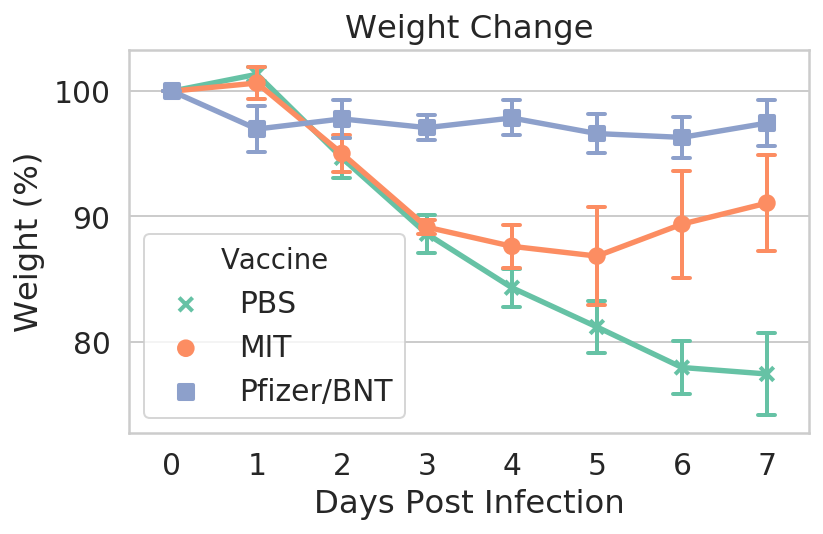

In [8]:
sns.set(font_scale=1.35, style='whitegrid')
ax = sns.pointplot(
    data=weight_data_to_plot,
    x='Day',
    y='Weight',
    hue='Vaccine',
    markers=['x', 'o', 's'],
    ci='sd',
    capsize=0.2,
    errwidth=2,
    palette=sns.color_palette('Set2'),
)
ax.set_xlabel('Days Post Infection')
ax.set_ylabel('Weight (%)')
ax.set_title('Weight Change')
plt.tight_layout()
plt.savefig('figures/weight_change.pdf')
plt.show()

In [9]:
# Run one-way ANOVA of weight change (Day 6).

weight_data_day6_PBS = weight_data_to_plot.loc[
    (weight_data_to_plot['Day'] == 6) & (weight_data_to_plot['Vaccine'] == 'PBS')]['Weight'].values.tolist()
weight_data_day6_MIT = weight_data_to_plot.loc[
    (weight_data_to_plot['Day'] == 6) & (weight_data_to_plot['Vaccine'] == 'MIT')]['Weight'].values.tolist()
weight_data_day6_BNT = weight_data_to_plot.loc[
    (weight_data_to_plot['Day'] == 6) & (weight_data_to_plot['Vaccine'] == 'Pfizer/BNT')]['Weight'].values.tolist()
print('Day 6, PBS: ', weight_data_day6_PBS)
print('Day 6, MIT: ', weight_data_day6_MIT)
print('Day 6, Pfizer/BNT: ', weight_data_day6_BNT)
print()

print(f_oneway(weight_data_day6_PBS, weight_data_day6_MIT, weight_data_day6_BNT))

Day 6, PBS:  [75.5351682, 77.7108434, 76.3239875, 78.71794870000001, 81.4935065]
Day 6, MIT:  [86.22754490000001, 95.3703704, 93.17406140000001, 88.253012, 83.9393939]
Day 6, Pfizer/BNT:  [93.65079370000001, 95.42483659999999, 98.1012658, 97.6331361, 96.73913040000001]

F_onewayResult(statistic=40.988935877032084, pvalue=4.334448451185654e-06)


In [10]:
# Run Tukey's test to identify which groups had a significant difference (Day 6).

weight_data_day6 = weight_data_to_plot.loc[weight_data_to_plot['Day'] == 6]
print(len(weight_data_day6))
print()

tukey_result = pairwise_tukeyhsd(
    endog=weight_data_day6['Weight'],
    groups=weight_data_day6['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

15

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj  lower    upper  reject
--------------------------------------------------------
   MIT        PBS -11.4366 0.001 -16.8963 -5.9769   True
   MIT Pfizer/BNT    6.917 0.014   1.4573 12.3766   True
   PBS Pfizer/BNT  18.3535 0.001  12.8939 23.8132   True
--------------------------------------------------------


In [11]:
# Run one-way ANOVA of weight change (Day 7).

weight_data_day7_PBS = weight_data_to_plot.loc[
    (weight_data_to_plot['Day'] == 7) & (weight_data_to_plot['Vaccine'] == 'PBS')]['Weight'].values.tolist()
weight_data_day7_MIT = weight_data_to_plot.loc[
    (weight_data_to_plot['Day'] == 7) & (weight_data_to_plot['Vaccine'] == 'MIT')]['Weight'].values.tolist()
weight_data_day7_BNT = weight_data_to_plot.loc[
    (weight_data_to_plot['Day'] == 7) & (weight_data_to_plot['Vaccine'] == 'Pfizer/BNT')]['Weight'].values.tolist()
print('Day 7, PBS: ', weight_data_day7_PBS)
print('Day 7, MIT: ', weight_data_day7_MIT)
print('Day 7, Pfizer/BNT: ', weight_data_day7_BNT)
print()

print(f_oneway(weight_data_day7_PBS, weight_data_day7_MIT, weight_data_day7_BNT))

Day 7, PBS:  [76.146789, 74.3975904, 75.7009346, 77.17948720000001, 83.7662338]
Day 7, MIT:  [90.71856290000001, 94.75308640000002, 95.56313990000001, 89.1566265, 85.1515152]
Day 7, Pfizer/BNT:  [94.60317459999999, 96.4052288, 99.6835443, 99.112426, 97.4637681]

F_onewayResult(statistic=43.68810673153638, pvalue=3.100222098486039e-06)


In [12]:
# Run Tukey's test to identify which groups had a significant difference (Day 7).

weight_data_day7 = weight_data_to_plot.loc[weight_data_to_plot['Day'] == 7]
print(len(weight_data_day7))
print()

tukey_result = pairwise_tukeyhsd(
    endog=weight_data_day7['Weight'],
    groups=weight_data_day7['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

15

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   MIT        PBS -13.6304  0.001 -19.4635 -7.7973   True
   MIT Pfizer/BNT    6.385 0.0319   0.5519 12.2182   True
   PBS Pfizer/BNT  20.0154  0.001  14.1823 25.8485   True
---------------------------------------------------------


In [14]:
# Compute statistics for all days.
for day in range(8):
    print('Day: ', day)
    weight_data_day = weight_data_to_plot.loc[weight_data_to_plot['Day'] == day]
    print('Total data points (all groups): ', len(weight_data_day))

    # One-way ANOVA
    weight_data_day_PBS = weight_data_day.loc[weight_data_day['Vaccine'] == 'PBS']['Weight'].values.tolist()
    weight_data_day_MIT = weight_data_day.loc[weight_data_day['Vaccine'] == 'MIT']['Weight'].values.tolist()
    weight_data_day_BNT = weight_data_day.loc[weight_data_day['Vaccine'] == 'Pfizer/BNT']['Weight'].values.tolist()
    print('Data PBS: ', weight_data_day_PBS)
    print('Data MIT: ', weight_data_day_MIT)
    print('Data Pfizer/BNT: ', weight_data_day_BNT)
    print(f_oneway(weight_data_day_PBS, weight_data_day_MIT, weight_data_day_BNT))

    # Tukey HSD
    print(pairwise_tukeyhsd(
        endog=weight_data_day['Weight'],
        groups=weight_data_day['Vaccine'],
        alpha=0.05,
    ))
    
    print()
    print()

Day:  0
Total data points (all groups):  15
Data PBS:  [100.0, 100.0, 100.0, 100.0, 100.0]
Data MIT:  [100.0, 100.0, 100.0, 100.0, 100.0]
Data Pfizer/BNT:  [100.0, 100.0, 100.0, 100.0, 100.0]
F_onewayResult(statistic=nan, pvalue=nan)

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1   group2   meandiff p-adj  lower upper reject
----------------------------------------------------
   MIT        PBS      0.0 0.5566   0.0   0.0  False
   MIT Pfizer/BNT      0.0 0.5566   0.0   0.0  False
   PBS Pfizer/BNT      0.0 0.5566   0.0   0.0  False
----------------------------------------------------


Day:  1
Total data points (all groups):  15
Data PBS:  [100.3058104, 101.5060241, 101.5576324, 102.05128209999998, 101.2987013]
Data MIT:  [99.10179640000001, 100.61728400000001, 101.7064846, 102.40963859999998, 99.39393940000001]
Data Pfizer/BNT:  [94.9206349, 98.0392157, 94.62025320000001, 

# Survival Curve

In [78]:
# Survival curve
survival_data_to_plot = weight_data_to_plot.copy()
# Compute survival as weight >= 80%
survival_data_to_plot['is_alive'] = (survival_data_to_plot['Weight'] >= 80)
survival_data_to_plot

,ID,Group,Vaccine,Cage,Tag-Ear,Day,Weight,is_alive
0,G1-1,G1,PBS,1,NC,0,100.000000,True
1,G1-1,G1,PBS,1,NC,1,100.305810,True
2,G1-1,G1,PBS,1,NC,2,92.966361,True
3,G1-1,G1,PBS,1,NC,3,86.850153,True
4,G1-1,G1,PBS,1,NC,4,81.957187,True
...,...,...,...,...,...,...,...,...
115,G3-5,G3,Pfizer/BNT,3,Green,3,97.101449,True
116,G3-5,G3,Pfizer/BNT,3,Green,4,98.188406,True
117,G3-5,G3,Pfizer/BNT,3,Green,5,96.376812,True
118,G3-5,G3,Pfizer/BNT,3,Green,6,96.739130,True


In [103]:
# Compute survival curve by grouping by vaccine/day and summing is_alive.
# Assumes that no animal's weight dropped below 80 and then returned above 80 later (which is the case for these data).
survival_curve = survival_data_to_plot.groupby(['Group', 'Vaccine', 'Day']).agg(sum)[['is_alive']] / 5. * 100.
survival_curve.reset_index(inplace=True)
survival_curve

,Group,Vaccine,Day,is_alive
0,G1,PBS,0,100.0
1,G1,PBS,1,100.0
2,G1,PBS,2,100.0
3,G1,PBS,3,100.0
4,G1,PBS,4,100.0
5,G1,PBS,5,80.0
6,G1,PBS,6,20.0
7,G1,PBS,7,20.0
8,G2,MIT,0,100.0
9,G2,MIT,1,100.0


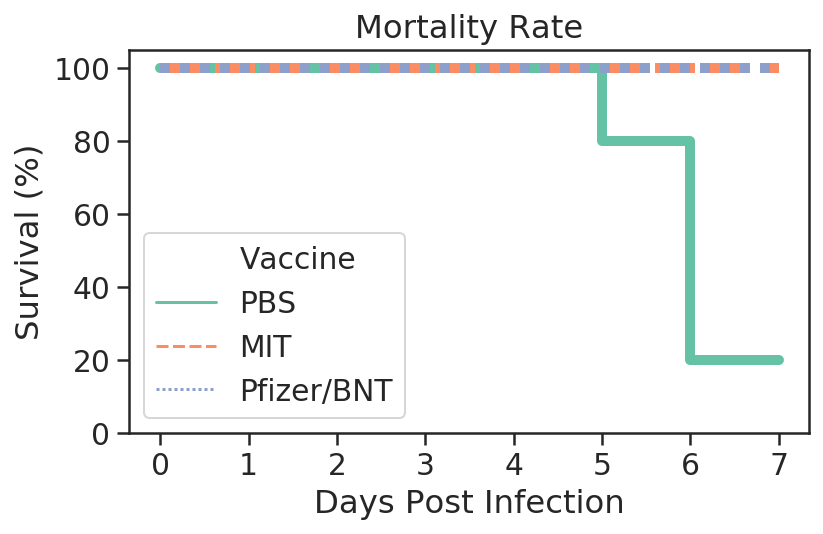

In [574]:
sns.set(font_scale=1.35, style='ticks')
ax = sns.lineplot(
    data=survival_curve,
    x='Day',
    y='is_alive',
    hue='Vaccine',
    style='Vaccine',
    ci=None,
    drawstyle='steps-post',
    linewidth=5,
    palette=sns.color_palette('Set2')[:3],
)
ax.set(ylim=(0, 105))
ax.set_xticks(list(range(0, 8))) # [0,7]
ax.set_xlabel('Days Post Infection')
ax.set_ylabel('Survival (%)')
ax.set_title('Mortality Rate')
plt.tight_layout()
plt.savefig('figures/survival.pdf')
plt.show()

# Lung Viral Titer

In [38]:
raw_lung_titer_data = pd.read_csv('data/lung_viral_titer.csv')
raw_lung_titer_data['Vaccine'] = raw_lung_titer_data['Vaccine'].replace('BNT', 'Pfizer/BNT')
raw_lung_titer_data

,ID,Vaccine,Day,TCID50/ g tissue,TCID50/ g tissue (log 10)
0,PBS1,PBS,2,7.246377e+06,6.860121
1,PBS2,PBS,2,2.155172e+07,7.333482
2,PBS3,PBS,2,3.816794e+07,7.581699
3,PBS1,PBS,7,0.000000e+00,0.000000
4,PBS2,PBS,7,0.000000e+00,0.000000
5,PBS3,PBS,7,2.262443e+02,2.354578
6,PBS4,PBS,7,0.000000e+00,0.000000
7,PBS5,PBS,7,0.000000e+00,0.000000
8,M1,MIT,2,4.491018e+06,6.652345
9,M2,MIT,2,6.211180e+06,6.793174


In [16]:
# Compute mean/standard deviation of each group.
raw_lung_titer_data.groupby(['Day', 'Vaccine']).agg(['count', 'mean', 'median', 'std'])

TCID50/ g tissue                                            \
                          count          mean        median           std   
Day Vaccine                                                                 
2   MIT                       3  5.139726e+06  4.716981e+06  9.347591e+05   
    PBS                       3  2.232201e+07  2.155172e+07  1.547517e+07   
    Pfizer/BNT                3  0.000000e+00  0.000000e+00  0.000000e+00   
7   MIT                       5  6.097561e+01  0.000000e+00  1.363456e+02   
    PBS                       5  4.524887e+01  0.000000e+00  1.011795e+02   
    Pfizer/BNT                5  0.000000e+00  0.000000e+00  0.000000e+00   

               TCID50/ g tissue (log 10)                                
                                   count      mean    median       std  
Day Vaccine                                                             
2   MIT                                3  6.706394  6.673664  0.075906  
    PBS                                3  7.258434  7.333482  0.366596  
    Pfizer/BNT                         3  0.000000  0.000000  0.000000  
7   MIT                                5  0.496825  0.000000  1.110935  
    PBS                                5  0.470916  0.000000  1.052999  
    Pfizer/BNT                         5  0.000000  0.000000  0.000000

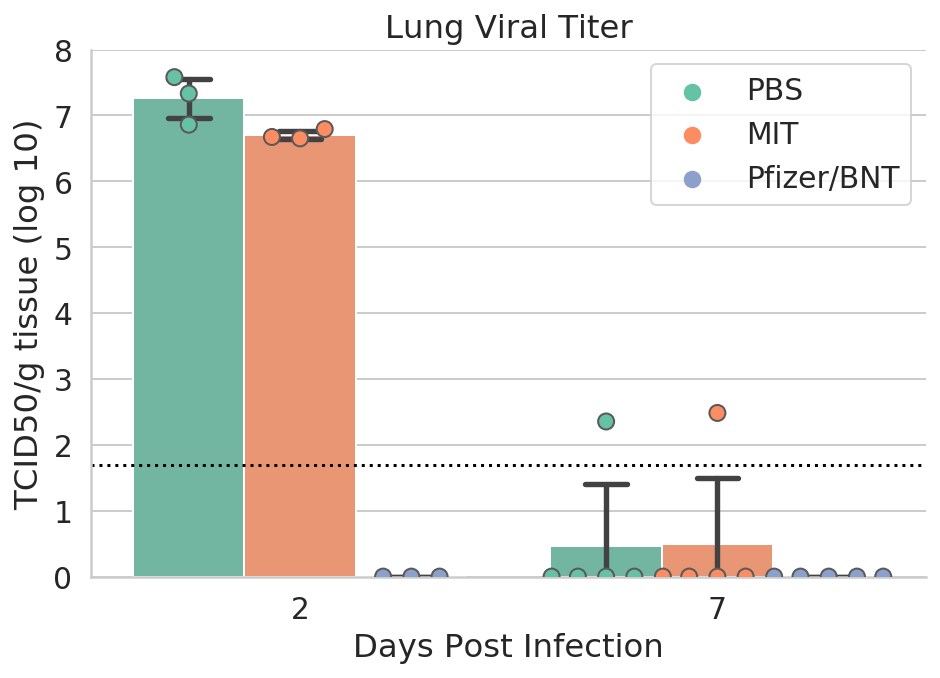

In [39]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.catplot(
    data=raw_lung_titer_data,
    x='Day',
    y='TCID50/ g tissue (log 10)',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=raw_lung_titer_data,
    x='Day',
    y='TCID50/ g tissue (log 10)',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
plt.axhline(y=1.699, linestyle='dotted', c='black', alpha=1.0, linewidth=1.5)  # Limit of detection (log10(50) = 1.699)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([0, 8])
ax2.set_xlabel('Days Post Infection')
ax2.set_ylabel('TCID50/g tissue (log 10)')
ax2.set_title('Lung Viral Titer')
plt.tight_layout()
plt.savefig('figures/lung_viral_titer.pdf')
plt.show()

In [19]:
# Run one-way ANOVA of lung viral titer (Day 2).

lung_titer_data_day2_PBS = raw_lung_titer_data.loc[
    (raw_lung_titer_data['Day'] == 2) & (raw_lung_titer_data['Vaccine'] == 'PBS')]['TCID50/ g tissue (log 10)'].values.tolist()
lung_titer_data_day2_MIT = raw_lung_titer_data.loc[
    (raw_lung_titer_data['Day'] == 2) & (raw_lung_titer_data['Vaccine'] == 'MIT')]['TCID50/ g tissue (log 10)'].values.tolist()
lung_titer_data_day2_BNT = raw_lung_titer_data.loc[
    (raw_lung_titer_data['Day'] == 2) & (raw_lung_titer_data['Vaccine'] == 'Pfizer/BNT')]['TCID50/ g tissue (log 10)'].values.tolist()
print('Day 2, PBS: ', lung_titer_data_day2_PBS)
print('Day 2, MIT: ', lung_titer_data_day2_MIT)
print('Day 2, Pfizer/BNT: ', lung_titer_data_day2_BNT)
print()

print(f_oneway(lung_titer_data_day2_PBS, lung_titer_data_day2_MIT, lung_titer_data_day2_BNT))

Day 2, PBS:  [6.8601209139999995, 7.333482019, 7.581698708999999]
Day 2, MIT:  [6.652344792, 6.793174124, 6.6736641389999996]
Day 2, Pfizer/BNT:  [0.0, 0.0, 0.0]

F_onewayResult(statistic=1048.4717443728332, pvalue=2.322581402971727e-08)


In [21]:
# Run Tukey's test to identify which groups had a significant difference (Day 2).

lung_titer_data_day2 = raw_lung_titer_data.loc[raw_lung_titer_data['Day'] == 2]
print(len(lung_titer_data_day2))
print()

tukey_result = pairwise_tukeyhsd(
    endog=lung_titer_data_day2['TCID50/ g tissue (log 10)'],
    groups=lung_titer_data_day2['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

9

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   MIT        PBS    0.552 0.0462  0.0112  1.0929   True
   MIT Pfizer/BNT  -6.7064  0.001 -7.2473 -6.1655   True
   PBS Pfizer/BNT  -7.2584  0.001 -7.7993 -6.7176   True
--------------------------------------------------------


In [22]:
# Run one-way ANOVA of lung viral titer (Day 7).

lung_titer_data_day7_PBS = raw_lung_titer_data.loc[
    (raw_lung_titer_data['Day'] == 7) & (raw_lung_titer_data['Vaccine'] == 'PBS')]['TCID50/ g tissue (log 10)'].values.tolist()
lung_titer_data_day7_MIT = raw_lung_titer_data.loc[
    (raw_lung_titer_data['Day'] == 7) & (raw_lung_titer_data['Vaccine'] == 'MIT')]['TCID50/ g tissue (log 10)'].values.tolist()
lung_titer_data_day7_BNT = raw_lung_titer_data.loc[
    (raw_lung_titer_data['Day'] == 7) & (raw_lung_titer_data['Vaccine'] == 'Pfizer/BNT')]['TCID50/ g tissue (log 10)'].values.tolist()
print('Day 7, PBS: ', lung_titer_data_day7_PBS)
print('Day 7, MIT: ', lung_titer_data_day7_MIT)
print('Day 7, Pfizer/BNT: ', lung_titer_data_day7_BNT)
print()

print(f_oneway(lung_titer_data_day7_PBS, lung_titer_data_day7_MIT, lung_titer_data_day7_BNT))

Day 7, PBS:  [0.0, 0.0, 2.354577731, 0.0, 0.0]
Day 7, MIT:  [0.0, 2.484126156, 0.0, 0.0, 0.0]
Day 7, Pfizer/BNT:  [0.0, 0.0, 0.0, 0.0, 0.0]

F_onewayResult(statistic=0.5007163000592664, pvalue=0.6182159742580118)


In [23]:
# Run Tukey's test to identify which groups had a significant difference (Day 7).

lung_titer_data_day7 = raw_lung_titer_data.loc[raw_lung_titer_data['Day'] == 7]
print(len(lung_titer_data_day7))
print()

tukey_result = pairwise_tukeyhsd(
    endog=lung_titer_data_day7['TCID50/ g tissue (log 10)'],
    groups=lung_titer_data_day7['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

15

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj  lower  upper  reject
------------------------------------------------------
   MIT        PBS  -0.0259   0.9 -1.5163 1.4645  False
   MIT Pfizer/BNT  -0.4968 0.651 -1.9872 0.9936  False
   PBS Pfizer/BNT  -0.4709 0.677 -1.9613 1.0195  False
------------------------------------------------------


# Clinical Scores

In [503]:
raw_clinical_scores_data = pd.read_csv('data/clinical_scores.csv')
raw_clinical_scores_data['Group'] = raw_clinical_scores_data['ID'].apply(lambda s: s.split('-')[0])
raw_clinical_scores_data['Vaccine'] = raw_clinical_scores_data['Vaccine'].replace('BNT', 'Pfizer/BNT')
raw_clinical_scores_data

,ID,Vaccine,Cage,Tag-Ear,0,1,2,3,4,5,6,7,Group
0,G1-1,PBS,1,NC,1,1,2,2.0,3.0,4.0,4.0,4.0,G1
1,G1-2,PBS,1,White,1,1,2,2.0,2.0,3.0,4.0,4.0,G1
2,G1-3,PBS,1,orange,1,1,2,2.0,3.0,3.0,4.0,4.0,G1
3,G1-4,PBS,1,Blue,1,1,2,2.0,2.0,3.0,4.0,4.0,G1
4,G1-5,PBS,1,Green,1,1,2,2.0,2.0,3.0,3.0,3.0,G1
5,G2-1,MIT,2,NC,1,1,2,2.0,2.0,3.0,2.0,1.0,G2
6,G2-2,MIT,2,White,1,1,2,2.0,2.0,2.0,2.0,1.0,G2
7,G2-3,MIT,2,orange,1,1,2,2.0,2.0,2.0,2.0,1.0,G2
8,G2-4,MIT,2,Blue,1,1,2,2.0,2.0,2.0,2.0,2.0,G2
9,G2-5,MIT,2,Green,1,1,2,2.0,2.0,3.0,3.0,2.0,G2


In [504]:
clinical_scores_data_processed = []

for _, row in raw_clinical_scores_data.iterrows():
    for day in range(8):  # [0, 7]
        clinical_scores_data_processed.append({
            'ID': row['ID'],
            'Group': row['Group'],
            'Vaccine': row['Vaccine'],
            'Cage': row['Cage'],
            'Tag-Ear': row['Tag-Ear'],
            'Day': day,
            'Clinical Score': row[str(day)],
        })

clinical_scores_data_processed = pd.DataFrame(clinical_scores_data_processed)
clinical_scores_data_processed

,ID,Group,Vaccine,Cage,Tag-Ear,Day,Clinical Score
0,G1-1,G1,PBS,1,NC,0,1.0
1,G1-1,G1,PBS,1,NC,1,1.0
2,G1-1,G1,PBS,1,NC,2,2.0
3,G1-1,G1,PBS,1,NC,3,2.0
4,G1-1,G1,PBS,1,NC,4,3.0
...,...,...,...,...,...,...,...
187,G7-4,G7,MIT,7,Blue,3,NaN
188,G7-4,G7,MIT,7,Blue,4,NaN
189,G7-4,G7,MIT,7,Blue,5,NaN
190,G7-4,G7,MIT,7,Blue,6,NaN


In [505]:
# Plot data for G1-G3.
clinical_scores_data_to_plot = clinical_scores_data_processed.loc[clinical_scores_data_processed['Group'].isin(['G1', 'G2', 'G3'])]
clinical_scores_data_to_plot

,ID,Group,Vaccine,Cage,Tag-Ear,Day,Clinical Score
0,G1-1,G1,PBS,1,NC,0,1.0
1,G1-1,G1,PBS,1,NC,1,1.0
2,G1-1,G1,PBS,1,NC,2,2.0
3,G1-1,G1,PBS,1,NC,3,2.0
4,G1-1,G1,PBS,1,NC,4,3.0
...,...,...,...,...,...,...,...
115,G3-5,G3,Pfizer/BNT,3,Green,3,1.0
116,G3-5,G3,Pfizer/BNT,3,Green,4,1.0
117,G3-5,G3,Pfizer/BNT,3,Green,5,2.0
118,G3-5,G3,Pfizer/BNT,3,Green,6,1.0


In [506]:
# Compute mean/standard deviation of each group.
clinical_scores_data_to_plot.groupby(['Day', 'Vaccine']).agg(['count', 'mean', 'median', 'std'])[['Clinical Score']]

Clinical Score                      
                        count mean median       std
Day Vaccine                                        
0   MIT                     5  1.0    1.0  0.000000
    PBS                     5  1.0    1.0  0.000000
    Pfizer/BNT              5  1.0    1.0  0.000000
1   MIT                     5  1.0    1.0  0.000000
    PBS                     5  1.0    1.0  0.000000
    Pfizer/BNT              5  1.0    1.0  0.000000
2   MIT                     5  2.0    2.0  0.000000
    PBS                     5  2.0    2.0  0.000000
    Pfizer/BNT              5  1.0    1.0  0.000000
3   MIT                     5  2.0    2.0  0.000000
    PBS                     5  2.0    2.0  0.000000
    Pfizer/BNT              5  1.0    1.0  0.000000
4   MIT                     5  2.0    2.0  0.000000
    PBS                     5  2.4    2.0  0.547723
    Pfizer/BNT              5  1.0    1.0  0.000000
5   MIT                     5  2.4    2.0  0.547723
    PBS                     5  3.2    3.0  0.447214
    Pfizer/BNT              5  1.6    2.0  0.547723
6   MIT                     5  2.2    2.0  0.447214
    PBS                     5  3.8    4.0  0.447214
    Pfizer/BNT              5  1.0    1.0  0.000000
7   MIT                     5  1.4    1.0  0.547723
    PBS                     5  3.8    4.0  0.447214
    Pfizer/BNT              5  1.0    1.0  0.000000

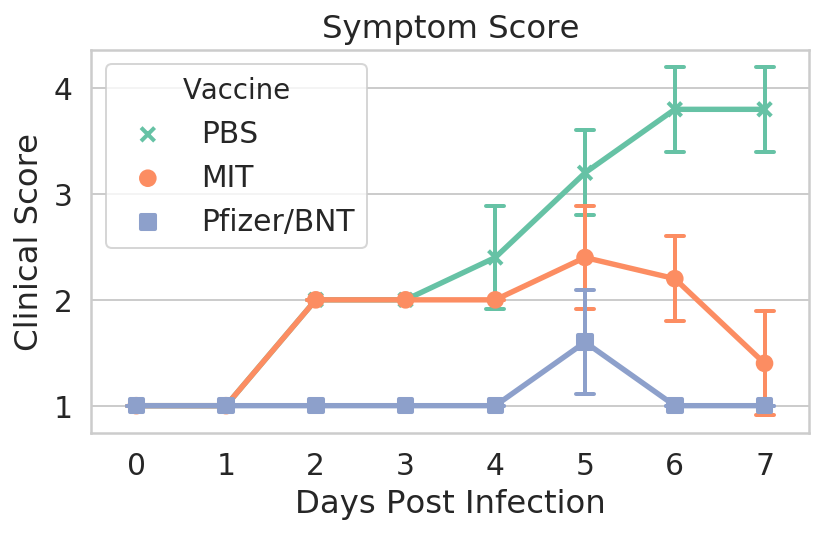

In [557]:
sns.set(font_scale=1.35, style='whitegrid')
ax = sns.pointplot(
    data=clinical_scores_data_to_plot,
    x='Day',
    y='Clinical Score',
    hue='Vaccine',
    markers=['x', 'o', 's'],
    ci='sd',
    capsize=0.2,
    errwidth=2,
    palette=sns.color_palette('Set2'),
)
ax.set_xlabel('Days Post Infection')
ax.set_ylabel('Clinical Score')
ax.set_title('Symptom Score')
plt.tight_layout()
plt.savefig('figures/clinical_scores.pdf')
plt.show()

In [509]:
# Compute statistics for all days.
for day in range(8):
    print('Day: ', day)
    clinical_scores_day = clinical_scores_data_to_plot.loc[clinical_scores_data_to_plot['Day'] == day]
    print('Total data points (all groups): ', len(clinical_scores_day))

    # One-way ANOVA
    clinical_scores_day_PBS = clinical_scores_day.loc[clinical_scores_day['Vaccine'] == 'PBS']['Clinical Score'].values.tolist()
    clinical_scores_day_MIT = clinical_scores_day.loc[clinical_scores_day['Vaccine'] == 'MIT']['Clinical Score'].values.tolist()
    clinical_scores_day_BNT = clinical_scores_day.loc[clinical_scores_day['Vaccine'] == 'Pfizer/BNT']['Clinical Score'].values.tolist()
    print('Data PBS: ', clinical_scores_day_PBS)
    print('Data MIT: ', clinical_scores_day_MIT)
    print('Data Pfizer/BNT: ', clinical_scores_day_BNT)
    print(f_oneway(clinical_scores_day_PBS, clinical_scores_day_MIT, clinical_scores_day_BNT))

    # Tukey HSD
    print(pairwise_tukeyhsd(
        endog=clinical_scores_day['Clinical Score'],
        groups=clinical_scores_day['Vaccine'],
        alpha=0.05,
    ))
    
    print()
    print()

Day:  0
Total data points (all groups):  15
Data PBS:  [1.0, 1.0, 1.0, 1.0, 1.0]
Data MIT:  [1.0, 1.0, 1.0, 1.0, 1.0]
Data Pfizer/BNT:  [1.0, 1.0, 1.0, 1.0, 1.0]
F_onewayResult(statistic=nan, pvalue=nan)

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1   group2   meandiff p-adj  lower upper reject
----------------------------------------------------
   MIT        PBS      0.0 0.5566   0.0   0.0  False
   MIT Pfizer/BNT      0.0 0.5566   0.0   0.0  False
   PBS Pfizer/BNT      0.0 0.5566   0.0   0.0  False
----------------------------------------------------


Day:  1
Total data points (all groups):  15
Data PBS:  [1.0, 1.0, 1.0, 1.0, 1.0]
Data MIT:  [1.0, 1.0, 1.0, 1.0, 1.0]
Data Pfizer/BNT:  [1.0, 1.0, 1.0, 1.0, 1.0]
F_onewayResult(statistic=nan, pvalue=nan)

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
Multiple Comparison

# Treg counts

Based on data in "Dropbox/UTMB/MIT vaccine Treg-07202022-Batch_Analysis.pdf"

In [285]:
treg_counts = pd.read_csv('data/Treg Counts.csv')
treg_counts['% Total'] = treg_counts['Fraction Total'] * 100.
treg_counts['% CD4 Cells'] = treg_counts['Fraction CD4 Cells'] * 100.
treg_counts['% Live Cells'] = treg_counts['Fraction Live Cells'] * 100.
treg_counts

,ID,Vaccine,Fraction Total,# Treg Events,# CD4 Events,# Live Events,Fraction CD4 Cells,Fraction Live Cells,% Total,% CD4 Cells,% Live Cells
0,PBS_001,PBS,0.01281,1281,13675,70120,0.093675,0.018269,1.281,9.367459,1.826868
1,PBS_002,PBS,0.01301,1301,13584,71039,0.095774,0.018314,1.301,9.577444,1.831388
2,PBS_003,PBS,0.01322,1322,14198,74278,0.093112,0.017798,1.322,9.311171,1.779800
3,BNT_001,Pfizer/BNT,0.01301,1301,18757,75748,0.069361,0.017175,1.301,6.936077,1.717537
4,BNT_002,Pfizer/BNT,0.01299,1299,13463,66786,0.096487,0.019450,1.299,9.648667,1.945018
5,BNT_003,Pfizer/BNT,0.01403,1403,17535,67319,0.080011,0.020841,1.403,8.001141,2.084107
6,MIT_001,MIT,0.01833,1833,17901,65883,0.102397,0.027822,1.833,10.239651,2.782205
7,MIT_002,MIT,0.00903,903,10555,60180,0.085552,0.015005,0.903,8.555187,1.500498
8,MIT_003,MIT,0.01100,1100,13469,65589,0.081669,0.016771,1.100,8.166902,1.677111


In [475]:
# Compute mean/standard deviation of each group.
treg_counts.groupby(['Vaccine']).agg(['count', 'mean', 'median', 'std'])[['% Total', '% CD4 Cells', '% Live Cells']]

% Total                            % CD4 Cells                      \
             count      mean median       std       count      mean    median   
Vaccine                                                                         
MIT              3  1.278667  1.100  0.490068           3  8.987247  8.555187   
PBS              3  1.301333  1.301  0.020502           3  9.418691  9.367459   
Pfizer/BNT       3  1.334333  1.301  0.059475           3  8.195295  8.001141   

                     % Live Cells                                
                 std        count      mean    median       std  
Vaccine                                                          
MIT         1.101853            3  1.986605  1.677111  0.694646  
PBS         0.140335            3  1.812686  1.826868  0.028569  
Pfizer/BNT  1.366677            3  1.915554  1.945018  0.185053

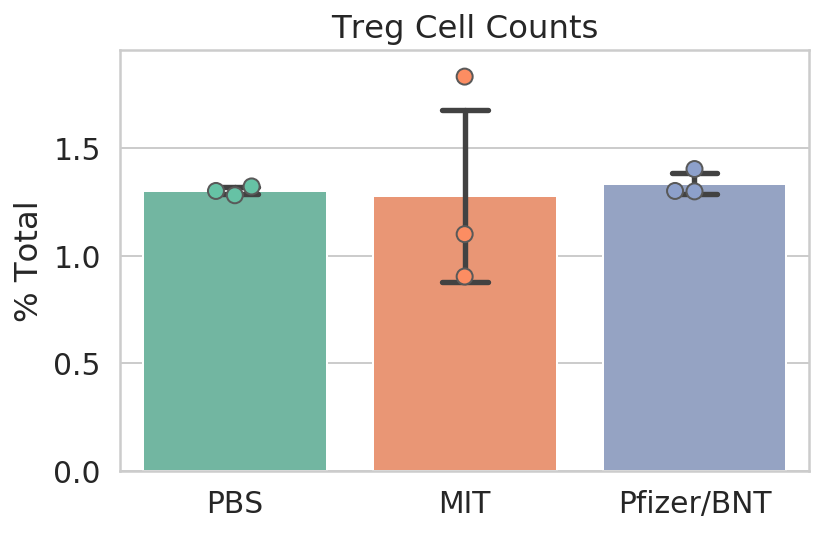

In [300]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.barplot(
    data=treg_counts,
    x='Vaccine',
    y='% Total',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    ci='sd',
    capsize=0.2,
    palette=sns.color_palette('Set2'),
)
ax2 = sns.swarmplot(
    data=treg_counts,
    x='Vaccine',
    y='% Total',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.set_xlabel(None)
ax2.set_ylabel('% Total')
ax2.set_title('Treg Cell Counts')
plt.tight_layout()
plt.show()

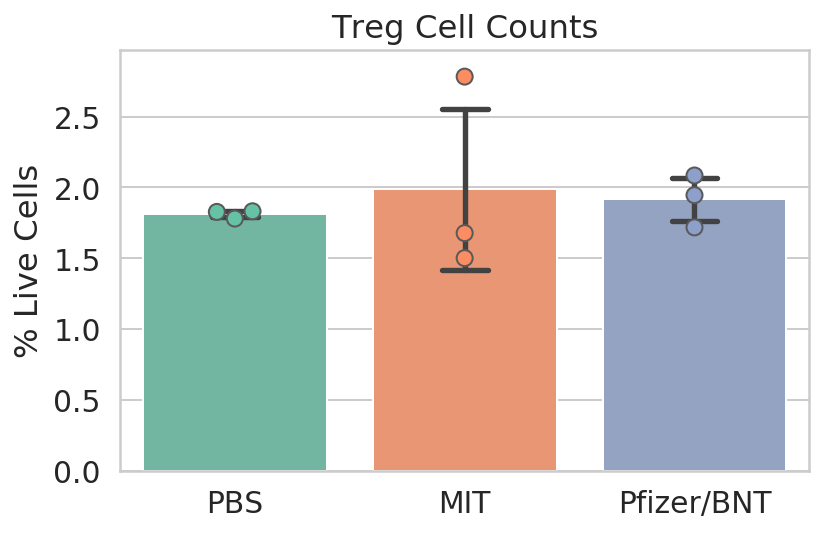

In [298]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.barplot(
    data=treg_counts,
    x='Vaccine',
    y='% Live Cells',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    ci='sd',
    capsize=0.2,
    palette=sns.color_palette('Set2'),
)
ax2 = sns.swarmplot(
    data=treg_counts,
    x='Vaccine',
    y='% Live Cells',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.set_xlabel(None)
ax2.set_ylabel('% Live Cells')
ax2.set_title('Treg Cell Counts')
plt.tight_layout()
plt.show()

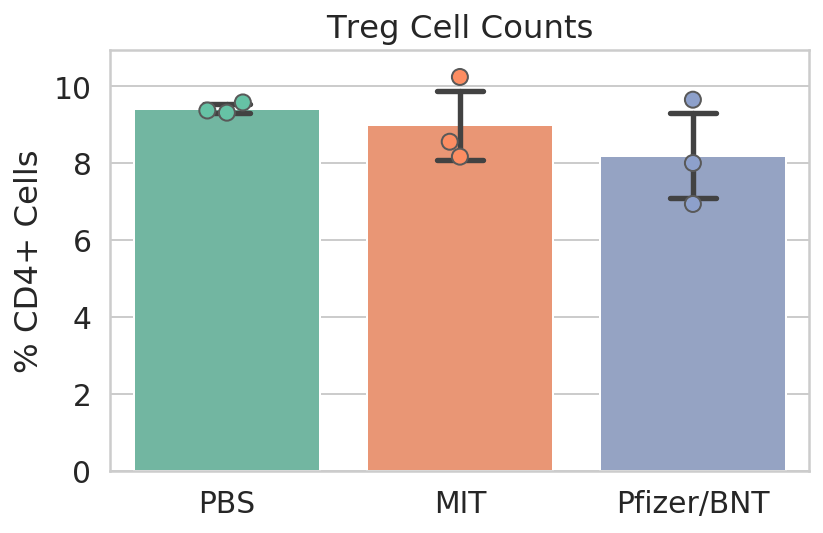

In [558]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.barplot(
    data=treg_counts,
    x='Vaccine',
    y='% CD4 Cells',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    ci='sd',
    capsize=0.2,
    palette=sns.color_palette('Set2'),
)
ax2 = sns.swarmplot(
    data=treg_counts,
    x='Vaccine',
    y='% CD4 Cells',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.set_xlabel(None)
ax2.set_ylabel('% CD4+ Cells')
ax2.set_title('Treg Cell Counts')
plt.tight_layout()
plt.savefig('figures/treg_cell_counts.pdf')
plt.show()

In [424]:
# Run one-way ANOVA of Treg cell counts (as % of CD4+ Cells).

treg_counts_PBS = treg_counts.loc[treg_counts['Vaccine'] == 'PBS']['% CD4 Cells'].values.tolist()
treg_counts_MIT = treg_counts.loc[treg_counts['Vaccine'] == 'MIT']['% CD4 Cells'].values.tolist()
treg_counts_BNT = treg_counts.loc[treg_counts['Vaccine'] == 'Pfizer/BNT']['% CD4 Cells'].values.tolist()
print('Data, PBS: ', treg_counts_PBS)
print('Data, MIT: ', treg_counts_MIT)
print('Data, Pfizer/BNT: ', treg_counts_BNT)
print()

print(f_oneway(treg_counts_PBS, treg_counts_MIT, treg_counts_BNT))

Data, PBS:  [9.3674589, 9.577444100000001, 9.3111706]
Data, MIT:  [10.239651400000001, 8.5551871, 8.1669018]
Data, Pfizer/BNT:  [6.9360772, 9.6486667, 8.0011406]

F_onewayResult(statistic=1.11718719876396, pvalue=0.3868672111932221)


In [425]:
# Run one-way ANOVA of Treg cell counts (as % of Live Cells).

treg_counts_PBS = treg_counts.loc[treg_counts['Vaccine'] == 'PBS']['% Live Cells'].values.tolist()
treg_counts_MIT = treg_counts.loc[treg_counts['Vaccine'] == 'MIT']['% Live Cells'].values.tolist()
treg_counts_BNT = treg_counts.loc[treg_counts['Vaccine'] == 'Pfizer/BNT']['% Live Cells'].values.tolist()
print('Data, PBS: ', treg_counts_PBS)
print('Data, MIT: ', treg_counts_MIT)
print('Data, Pfizer/BNT: ', treg_counts_BNT)
print()

print(f_oneway(treg_counts_PBS, treg_counts_MIT, treg_counts_BNT))

Data, PBS:  [1.8268681999999998, 1.8313883999999998, 1.7798002]
Data, MIT:  [2.7822047999999997, 1.5004985, 1.6771105000000002]
Data, Pfizer/BNT:  [1.7175371000000001, 1.9450184, 2.084107]

F_onewayResult(statistic=0.13295550008099757, pvalue=0.8780132812397072)


In [426]:
# Run Tukey's test of Treg cell counts (as % of CD4 Cells).

tukey_result = pairwise_tukeyhsd(
    endog=treg_counts['% CD4 Cells'],
    groups=treg_counts['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS   0.4314 0.8545 -2.1129 2.9758  False
   MIT Pfizer/BNT   -0.792 0.6256 -3.3363 1.7524  False
   PBS Pfizer/BNT  -1.2234 0.3668 -3.7677 1.3209  False
-------------------------------------------------------


In [427]:
# Run Tukey's test of Treg cell counts (as % of Live Cells).

tukey_result = pairwise_tukeyhsd(
    endog=treg_counts['% Live Cells'],
    groups=treg_counts['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS  -0.1739 0.8581 -1.2133 0.8655  False
   MIT Pfizer/BNT  -0.0711    0.9 -1.1104 0.9683  False
   PBS Pfizer/BNT   0.1029    0.9 -0.9365 1.1423  False
-------------------------------------------------------


# Immunogenicity

### CD4+ IFNr

In [7]:
CD4_COLS = ['CD4-1', 'CD4-2', 'SARS-CoV CD4 pool', 'Iab(+)']

immunogenicity_CD4_IFNr_data = pd.read_csv('data/immunogenicity/immunogenicity_CD4_IFNr.csv')
immunogenicity_CD4_IFNr_data = immunogenicity_CD4_IFNr_data.rename(columns={'Unnamed: 0': 'ID'})

print(immunogenicity_CD4_IFNr_data.columns.values.tolist())

# Only retain columns relevant to CD4 peptides.
immunogenicity_CD4_IFNr_data = immunogenicity_CD4_IFNr_data.loc[:, ['ID']+CD4_COLS]

# Clip any values < 0.
for col in CD4_COLS:
    immunogenicity_CD4_IFNr_data[col] = immunogenicity_CD4_IFNr_data[col].clip(lower=0)

immunogenicity_CD4_IFNr_data

['ID', 'W/O PEP', 'CD8-6', 'CD8-7', 'Iab(+)', 'CD8(-)-1', 'CD8-2', 'CD8-1', 'CD8(-)-2', 'CD8 (+)', 'CD8-3', 'CD8-4', 'CD8-8', 'CD4-2', 'CD8-5', 'CD4-1', 'pooled pep', 'PMA/Ionomycin', 'SARS-CoV CD8 pool', 'SARS-CoV CD4 pool']


,ID,CD4-1,CD4-2,SARS-CoV CD4 pool,Iab(+)
0,PBS1,0.000000,0.000000,0.000300,0.000000
1,PBS2,0.000000,0.000000,0.000400,0.000200
2,PBS3,0.000000,0.000300,0.000000,0.000000
3,MIT1,0.000000,0.000177,0.000347,0.000000
4,MIT2,0.000337,0.000317,0.000157,0.000067
5,MIT3,0.000000,0.000667,0.000467,0.000257
6,BNT1,0.000060,0.000000,0.000330,0.000000
7,BNT2,0.000000,0.000280,0.000280,0.000140
8,BNT3,0.000570,0.000000,0.000000,0.000000


In [8]:
immunogenicity_CD4_IFNr_df = pd.melt(
    immunogenicity_CD4_IFNr_data,
    id_vars='ID',
    value_vars=CD4_COLS,
)
immunogenicity_CD4_IFNr_df['value %'] = immunogenicity_CD4_IFNr_df['value'] * 100.

immunogenicity_CD4_IFNr_df['Vaccine'] = immunogenicity_CD4_IFNr_df['ID'].apply(lambda s: s[:3])
immunogenicity_CD4_IFNr_df['Vaccine'] = immunogenicity_CD4_IFNr_df['Vaccine'].replace('BNT', 'Pfizer/BNT')

immunogenicity_CD4_IFNr_df.replace(to_replace={'SARS-CoV CD4 pool': 'CD4 pool', 'Iab(+)': 'IAb (+)'}, inplace=True)

immunogenicity_CD4_IFNr_df

,ID,variable,value,value %,Vaccine
0,PBS1,CD4-1,0.000000,0.000000,PBS
1,PBS2,CD4-1,0.000000,0.000000,PBS
2,PBS3,CD4-1,0.000000,0.000000,PBS
3,MIT1,CD4-1,0.000000,0.000000,MIT
4,MIT2,CD4-1,0.000337,0.033667,MIT
5,MIT3,CD4-1,0.000000,0.000000,MIT
6,BNT1,CD4-1,0.000060,0.006000,Pfizer/BNT
7,BNT2,CD4-1,0.000000,0.000000,Pfizer/BNT
8,BNT3,CD4-1,0.000570,0.057000,Pfizer/BNT
9,PBS1,CD4-2,0.000000,0.000000,PBS


In [9]:
# Compute mean/standard deviation of each group.
immunogenicity_CD4_IFNr_df.groupby(['Vaccine', 'variable']).agg(['count', 'mean', 'median', 'std'])[['value %']]

value %                              
                      count      mean    median       std
Vaccine    variable                                      
MIT        CD4 pool       3  0.032333  0.034667  0.015631
           CD4-1          3  0.011222  0.000000  0.019437
           CD4-2          3  0.038667  0.031667  0.025239
           IAb (+)        3  0.010778  0.006667  0.013318
PBS        CD4 pool       3  0.023333  0.030000  0.020817
           CD4-1          3  0.000000  0.000000  0.000000
           CD4-2          3  0.010000  0.000000  0.017321
           IAb (+)        3  0.006667  0.000000  0.011547
Pfizer/BNT CD4 pool       3  0.020333  0.028000  0.017786
           CD4-1          3  0.021000  0.006000  0.031321
           CD4-2          3  0.009333  0.000000  0.016166
           IAb (+)        3  0.004667  0.000000  0.008083

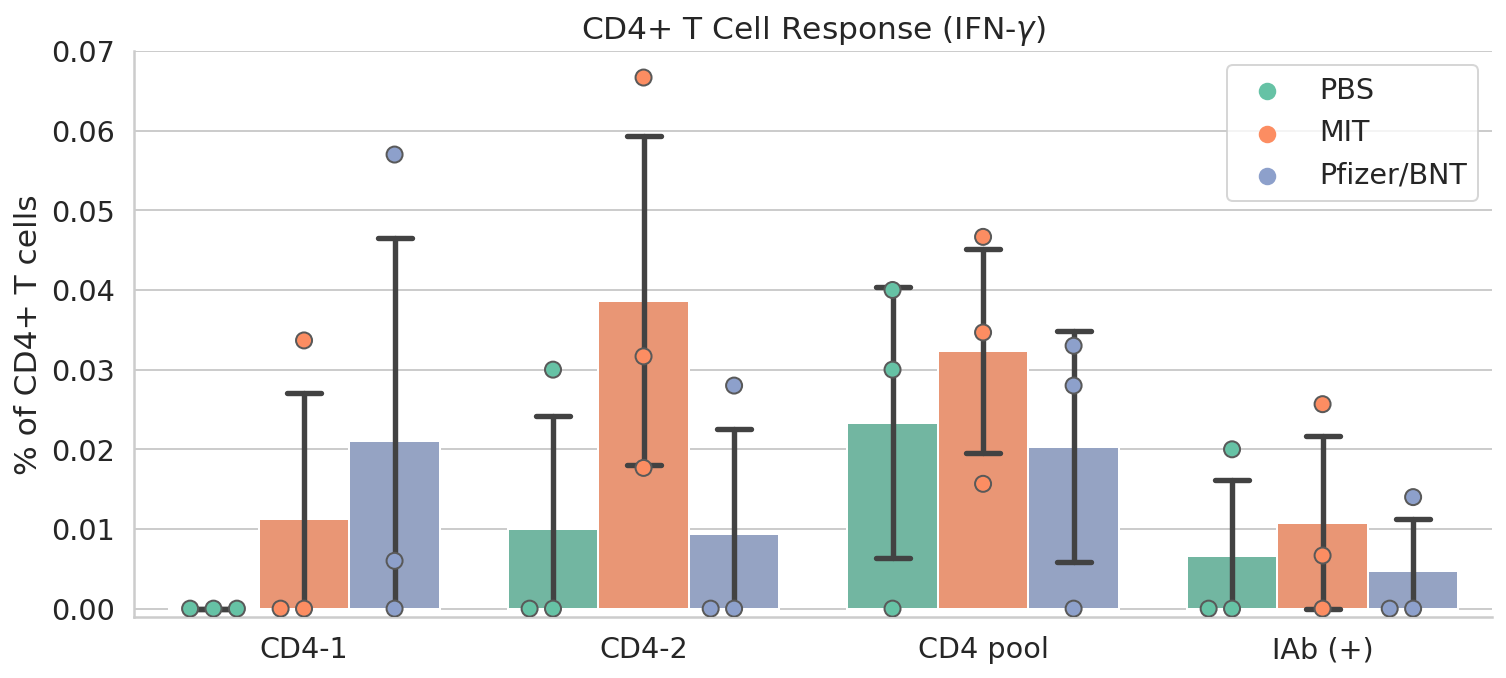

In [348]:
sns.set(font_scale=1.3, style='whitegrid')
ax1 = sns.catplot(
    data=immunogenicity_CD4_IFNr_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    aspect=1.8,
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=immunogenicity_CD4_IFNr_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([-0.001, 0.07])
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('% of CD4+ T cells')
ax2.set_title(r'CD4+ T Cell Response (IFN-$\gamma$)')
plt.tight_layout()
plt.savefig('figures/immunogenicity_CD4_IFNr.pdf')
plt.show()

In [10]:
# Compute statistics CD4+ / IFNr:

immunogenicity_data = immunogenicity_CD4_IFNr_df

for query in immunogenicity_data['variable'].drop_duplicates().values.tolist():
    print('Statistics for query peptide: ', query)
    data_query = immunogenicity_data.loc[immunogenicity_data['variable'] == query]
    print('Total data points (all groups): ', len(data_query))

    # One-way ANOVA
    data_query_PBS = data_query.loc[data_query['Vaccine'] == 'PBS']['value %'].values.tolist()
    data_query_MIT = data_query.loc[data_query['Vaccine'] == 'MIT']['value %'].values.tolist()
    data_query_BNT = data_query.loc[data_query['Vaccine'] == 'Pfizer/BNT']['value %'].values.tolist()
    print('Data PBS: ', data_query_PBS)
    print('Data MIT: ', data_query_MIT)
    print('Data Pfizer/BNT: ', data_query_BNT)
    print(f_oneway(data_query_PBS, data_query_MIT, data_query_BNT))

    # Tukey HSD
    print(pairwise_tukeyhsd(
        endog=data_query['value %'],
        groups=data_query['Vaccine'],
        alpha=0.05,
    ))

    print()
    print()

Statistics for query peptide:  CD4-1
Total data points (all groups):  9
Data PBS:  [0.0, 0.0, 0.0]
Data MIT:  [0.0, 0.033666699999999994, 0.0]
Data Pfizer/BNT:  [0.005999999999999999, 0.0, 0.056999999999999995]
F_onewayResult(statistic=0.7313831913994283, pvalue=0.5197017887297539)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS  -0.0112  0.788 -0.0645  0.042  False
   MIT Pfizer/BNT   0.0098 0.8318 -0.0435  0.063  False
   PBS Pfizer/BNT    0.021 0.4918 -0.0323 0.0743  False
-------------------------------------------------------


Statistics for query peptide:  CD4-2
Total data points (all groups):  9
Data PBS:  [0.0, 0.0, 0.03]
Data MIT:  [0.0176667, 0.0316667, 0.0666667]
Data Pfizer/BNT:  [0.0, 0.027999999999999997, 0.0]
F_onewayResult(statistic=2.106263532687066, pvalue=0.202793527485913)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
g

### CD4+ TNFa

In [350]:
CD4_COLS = ['CD4-1', 'CD4-2', 'SARS-CoV CD4 pool', 'Iab(+)']

immunogenicity_CD4_TNFa_data = pd.read_csv('data/immunogenicity/immunogenicity_CD4_TNFa.csv')
immunogenicity_CD4_TNFa_data = immunogenicity_CD4_TNFa_data.rename(columns={'Unnamed: 0': 'ID'})

print(immunogenicity_CD4_TNFa_data.columns.values.tolist())

# Only retain columns relevant to CD4 peptides.
immunogenicity_CD4_TNFa_data = immunogenicity_CD4_TNFa_data.loc[:, ['ID']+CD4_COLS]

# Clip any values < 0.
for col in CD4_COLS:
    immunogenicity_CD4_TNFa_data[col] = immunogenicity_CD4_TNFa_data[col].clip(lower=0)

immunogenicity_CD4_TNFa_data

['ID', 'W/O PEP', 'CD8-6', 'CD8-7', 'Iab(+)', 'CD8(-)-1', 'CD8-2', 'CD8-1', 'CD8(-)-2', 'CD8 (+)', 'CD8-3', 'CD8-4', 'CD8-8', 'CD4-2', 'CD8-5', 'CD4-1', 'pooled pep', 'PMA/Ionomycin', 'SARS-CoV CD8 pool', 'SARS-CoV CD4 pool']


,ID,CD4-1,CD4-2,SARS-CoV CD4 pool,Iab(+)
0,PBS1,0.000600,0.000000,0.000000,0.000000
1,PBS2,0.000000,0.000440,0.000210,0.000220
2,PBS3,0.000190,0.000390,0.000000,0.000000
3,MIT1,0.000320,0.001100,0.000740,0.000660
4,MIT2,0.000407,0.000627,0.000757,0.000257
5,MIT3,0.000407,0.000627,0.000757,0.000257
6,BNT1,0.000260,0.000040,0.000000,0.000120
7,BNT2,0.000040,0.000000,0.000000,0.000000
8,BNT3,0.000000,0.000000,0.000000,0.000000


In [351]:
immunogenicity_CD4_TNFa_df = pd.melt(
    immunogenicity_CD4_TNFa_data,
    id_vars='ID',
    value_vars=CD4_COLS,
)
immunogenicity_CD4_TNFa_df['value %'] = immunogenicity_CD4_TNFa_df['value'] * 100.

immunogenicity_CD4_TNFa_df['Vaccine'] = immunogenicity_CD4_TNFa_df['ID'].apply(lambda s: s[:3])
immunogenicity_CD4_TNFa_df['Vaccine'] = immunogenicity_CD4_TNFa_df['Vaccine'].replace('BNT', 'Pfizer/BNT')

immunogenicity_CD4_TNFa_df.replace(to_replace={'SARS-CoV CD4 pool': 'CD4 pool', 'Iab(+)': 'IAb (+)'}, inplace=True)

immunogenicity_CD4_TNFa_df

,ID,variable,value,value %,Vaccine
0,PBS1,CD4-1,0.000600,0.060000,PBS
1,PBS2,CD4-1,0.000000,0.000000,PBS
2,PBS3,CD4-1,0.000190,0.019000,PBS
3,MIT1,CD4-1,0.000320,0.032000,MIT
4,MIT2,CD4-1,0.000407,0.040667,MIT
5,MIT3,CD4-1,0.000407,0.040667,MIT
6,BNT1,CD4-1,0.000260,0.026000,Pfizer/BNT
7,BNT2,CD4-1,0.000040,0.004000,Pfizer/BNT
8,BNT3,CD4-1,0.000000,0.000000,Pfizer/BNT
9,PBS1,CD4-2,0.000000,0.000000,PBS


In [352]:
# Compute mean/standard deviation of each group.
immunogenicity_CD4_TNFa_df.groupby(['Vaccine', 'variable']).agg(['count', 'mean', 'median', 'std'])[['value %']]

value %                              
                      count      mean    median       std
Vaccine    variable                                      
MIT        CD4 pool       3  0.075111  0.075667  0.000962
           CD4-1          3  0.037778  0.040667  0.005004
           CD4-2          3  0.078444  0.062667  0.027328
           IAb (+)        3  0.039111  0.025667  0.023286
PBS        CD4 pool       3  0.007000  0.000000  0.012124
           CD4-1          3  0.026333  0.019000  0.030665
           CD4-2          3  0.027667  0.039000  0.024090
           IAb (+)        3  0.007333  0.000000  0.012702
Pfizer/BNT CD4 pool       3  0.000000  0.000000  0.000000
           CD4-1          3  0.010000  0.004000  0.014000
           CD4-2          3  0.001333  0.000000  0.002309
           IAb (+)        3  0.004000  0.000000  0.006928

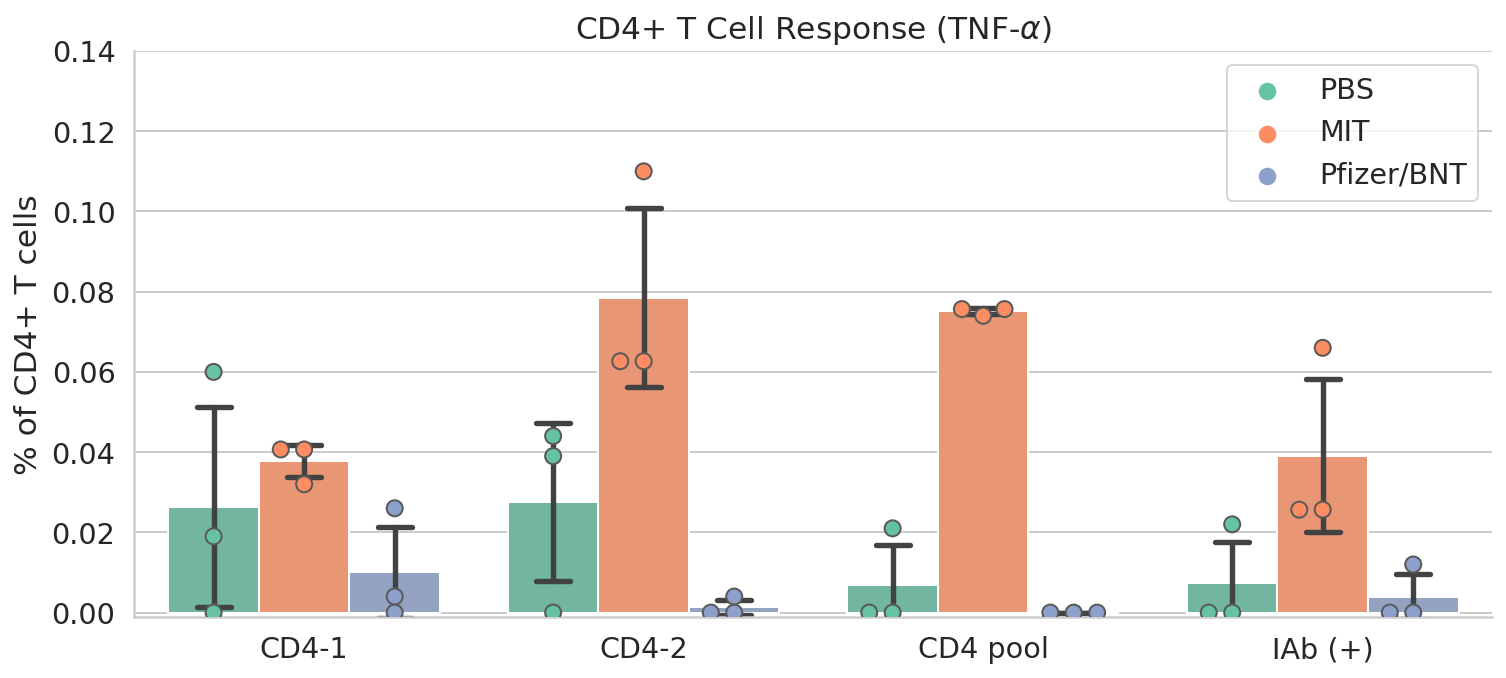

In [358]:
sns.set(font_scale=1.3, style='whitegrid')
ax1 = sns.catplot(
    data=immunogenicity_CD4_TNFa_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    aspect=1.8,
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=immunogenicity_CD4_TNFa_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([-0.001, 0.14])
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('% of CD4+ T cells')
ax2.set_title(r'CD4+ T Cell Response (TNF-$\alpha$)')
plt.tight_layout()
plt.savefig('figures/immunogenicity_CD4_TNFa.pdf')
plt.show()

In [359]:
# Compute statistics CD4+ / TNFa:

immunogenicity_data = immunogenicity_CD4_TNFa_df

for query in immunogenicity_data['variable'].drop_duplicates().values.tolist():
    print('Statistics for query peptide: ', query)
    data_query = immunogenicity_data.loc[immunogenicity_data['variable'] == query]
    print('Total data points (all groups): ', len(data_query))

    # One-way ANOVA
    data_query_PBS = data_query.loc[data_query['Vaccine'] == 'PBS']['value %'].values.tolist()
    data_query_MIT = data_query.loc[data_query['Vaccine'] == 'MIT']['value %'].values.tolist()
    data_query_BNT = data_query.loc[data_query['Vaccine'] == 'Pfizer/BNT']['value %'].values.tolist()
    print('Data PBS: ', data_query_PBS)
    print('Data MIT: ', data_query_MIT)
    print('Data Pfizer/BNT: ', data_query_BNT)
    print(f_oneway(data_query_PBS, data_query_MIT, data_query_BNT))

    # Tukey HSD
    print(pairwise_tukeyhsd(
        endog=data_query['value %'],
        groups=data_query['Vaccine'],
        alpha=0.05,
    ))

    print()
    print()

Statistics for query peptide:  CD4-1
Total data points (all groups):  9
Data PBS:  [0.06, 0.0, 0.019]
Data MIT:  [0.032, 0.0406667, 0.0406667]
Data Pfizer/BNT:  [0.026000000000000002, 0.004, 0.0]
F_onewayResult(statistic=1.5103186767346288, pvalue=0.294267351169274)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS  -0.0114 0.7529 -0.0607 0.0378  False
   MIT Pfizer/BNT  -0.0278   0.27  -0.077 0.0215  False
   PBS Pfizer/BNT  -0.0163 0.5925 -0.0656 0.0329  False
-------------------------------------------------------


Statistics for query peptide:  CD4-2
Total data points (all groups):  9
Data PBS:  [0.0, 0.044000000000000004, 0.039]
Data MIT:  [0.11, 0.0626667, 0.0626667]
Data Pfizer/BNT:  [0.004, 0.0, 0.0]
F_onewayResult(statistic=10.376838671989178, pvalue=0.011279849260798152)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group

### CD8+ IFNr

In [361]:
CD8_COLS = ['CD8-1', 'CD8-2', 'CD8-3', 'CD8-4', 'CD8-5', 'CD8-6', 'CD8-7', 'CD8-8', 'CD8(-)-1', 'CD8(-)-2', 'CD4-2', 'SARS-CoV CD8 pool', 'pooled pep', 'CD8 (+)']

immunogenicity_CD8_IFNr_data = pd.read_csv('data/immunogenicity/immunogenicity_CD8_IFNr.csv')
immunogenicity_CD8_IFNr_data = immunogenicity_CD8_IFNr_data.rename(columns={'Unnamed: 0': 'ID'})

print(immunogenicity_CD8_IFNr_data.columns.values.tolist())

# Only retain columns relevant to CD8 peptides.
immunogenicity_CD8_IFNr_data = immunogenicity_CD8_IFNr_data.loc[:, ['ID']+CD8_COLS]

# Clip any values < 0.
for col in CD8_COLS:
    immunogenicity_CD8_IFNr_data[col] = immunogenicity_CD8_IFNr_data[col].clip(lower=0)

immunogenicity_CD8_IFNr_data

['ID', 'W/O PEP', 'CD8-6', 'CD8-7', 'Iab(+)', 'CD8(-)-1', 'CD8-2', 'CD8-1', 'CD8(-)-2', 'CD8 (+)', 'CD8-3', 'CD8-4', 'CD8-8', 'CD4-2', 'CD8-5', 'CD4-1', 'pooled pep', 'PMA/Ionomycin', 'SARS-CoV CD8 pool', 'SARS-CoV CD4 pool']


,ID,CD8-1,CD8-2,CD8-3,CD8-4,CD8-5,CD8-6,CD8-7,CD8-8,CD8(-)-1,CD8(-)-2,CD4-2,SARS-CoV CD8 pool,pooled pep,CD8 (+)
0,PBS1,0.000267,0.000297,0.000287,0.000567,0.001127,0.000000,0.000257,0.000927,0.001327,0.000277,0.001127,0.000827,0.001127,0.000277
1,PBS2,0.000677,0.002127,0.000057,0.000317,0.001227,0.000677,0.001027,0.000307,0.000697,0.000047,0.001027,0.001927,0.002227,0.000367
2,PBS3,0.000267,0.000000,0.000827,0.000487,0.000217,0.000000,0.000527,0.000297,0.000000,0.001427,0.000497,0.000000,0.000497,0.000000
3,MIT1,0.000113,0.000033,0.000963,0.010463,0.000033,0.000000,0.000000,0.006163,0.000000,0.000143,0.002163,0.014863,0.014763,0.000000
4,MIT2,0.000033,0.000463,0.000000,0.019263,0.000083,0.000233,0.000000,0.006063,0.000000,0.000000,0.001963,0.025263,0.030663,0.000000
5,MIT3,0.000000,0.000063,0.000000,0.009763,0.000193,0.000363,0.000363,0.005763,0.000063,0.000000,0.001063,0.008063,0.012263,0.000000
6,BNT1,0.000357,0.000177,0.000257,0.005357,0.000000,0.000167,0.000000,0.000757,0.000457,0.000557,0.000247,0.006557,0.004357,0.000000
7,BNT2,0.000067,0.000457,0.000000,0.007757,0.000757,0.000657,0.000000,0.000000,0.000000,0.000257,0.001557,0.008657,0.009157,0.000657
8,BNT3,0.000000,0.000000,0.000017,0.002757,0.000087,0.000000,0.000000,0.000000,0.000000,0.000167,0.000037,0.003457,0.001957,0.000000


In [362]:
immunogenicity_CD8_IFNr_df = pd.melt(
    immunogenicity_CD8_IFNr_data,
    id_vars='ID',
    value_vars=CD8_COLS,
)
immunogenicity_CD8_IFNr_df['value %'] = immunogenicity_CD8_IFNr_df['value'] * 100.

immunogenicity_CD8_IFNr_df['Vaccine'] = immunogenicity_CD8_IFNr_df['ID'].apply(lambda s: s[:3])
immunogenicity_CD8_IFNr_df['Vaccine'] = immunogenicity_CD8_IFNr_df['Vaccine'].replace('BNT', 'Pfizer/BNT')

immunogenicity_CD8_IFNr_df.replace(to_replace={'SARS-CoV CD8 pool': 'CD8 pool', 'pooled pep': 'Pep pool', 'CD8 (+)': 'A0201 (+)'}, inplace=True)

immunogenicity_CD8_IFNr_df

,ID,variable,value,value %,Vaccine
0,PBS1,CD8-1,0.000267,0.026667,PBS
1,PBS2,CD8-1,0.000677,0.067667,PBS
2,PBS3,CD8-1,0.000267,0.026667,PBS
3,MIT1,CD8-1,0.000113,0.011333,MIT
4,MIT2,CD8-1,0.000033,0.003333,MIT
...,...,...,...,...,...
121,MIT2,A0201 (+),0.000000,0.000000,MIT
122,MIT3,A0201 (+),0.000000,0.000000,MIT
123,BNT1,A0201 (+),0.000000,0.000000,Pfizer/BNT
124,BNT2,A0201 (+),0.000657,0.065667,Pfizer/BNT


In [363]:
# Compute mean/standard deviation of each group.
immunogenicity_CD8_IFNr_df.groupby(['Vaccine', 'variable']).agg(['count', 'mean', 'median', 'std'])[['value %']]

value %                              
                       count      mean    median       std
Vaccine    variable                                       
MIT        A0201 (+)       3  0.000000  0.000000  0.000000
           CD4-2           3  0.173000  0.196333  0.058595
           CD8 pool        3  1.606333  1.486333  0.866256
           CD8(-)-1        3  0.002111  0.000000  0.003657
           CD8(-)-2        3  0.004778  0.000000  0.008275
           CD8-1           3  0.004889  0.003333  0.005825
           CD8-2           3  0.018667  0.006333  0.024007
           CD8-3           3  0.032111  0.000000  0.055618
           CD8-4           3  1.316333  1.046333  0.529434
           CD8-5           3  0.010333  0.008333  0.008185
           CD8-6           3  0.019889  0.023333  0.018410
           CD8-7           3  0.012111  0.000000  0.020977
           CD8-8           3  0.599667  0.606333  0.020817
           Pep pool        3  1.923000  1.476333  0.998015
PBS        A0201 (+)       3  0.021444  0.027667  0.019109
           CD4-2           3  0.088333  0.102667  0.033858
           CD8 pool        3  0.091778  0.082667  0.096656
           CD8(-)-1        3  0.067444  0.069667  0.066361
           CD8(-)-2        3  0.058333  0.027667  0.073935
           CD8-1           3  0.040333  0.026667  0.023671
           CD8-2           3  0.080778  0.029667  0.115178
           CD8-3           3  0.039000  0.028667  0.039526
           CD8-4           3  0.045667  0.048667  0.012767
           CD8-5           3  0.085667  0.112667  0.055651
           CD8-6           3  0.022556  0.000000  0.039067
           CD8-7           3  0.060333  0.052667  0.039068
           CD8-8           3  0.051000  0.030667  0.036088
           Pep pool        3  0.128333  0.112667  0.087558
Pfizer/BNT A0201 (+)       3  0.021889  0.000000  0.037913
           CD4-2           3  0.061333  0.024667  0.082367
           CD8 pool        3  0.622333  0.655667  0.261598
           CD8(-)-1        3  0.015222  0.000000  0.026366
           CD8(-)-2        3  0.032667  0.025667  0.020421
           CD8-1           3  0.014111  0.006667  0.018963
           CD8-2           3  0.021111  0.017667  0.023027
           CD8-3           3  0.009111  0.001667  0.014362
           CD8-4           3  0.529000  0.535667  0.250067
           CD8-5           3  0.028111  0.008667  0.041412
           CD8-6           3  0.027444  0.016667  0.034134
           CD8-7           3  0.000000  0.000000  0.000000
           CD8-8           3  0.025222  0.000000  0.043686
           Pep pool        3  0.515667  0.435667  0.366606

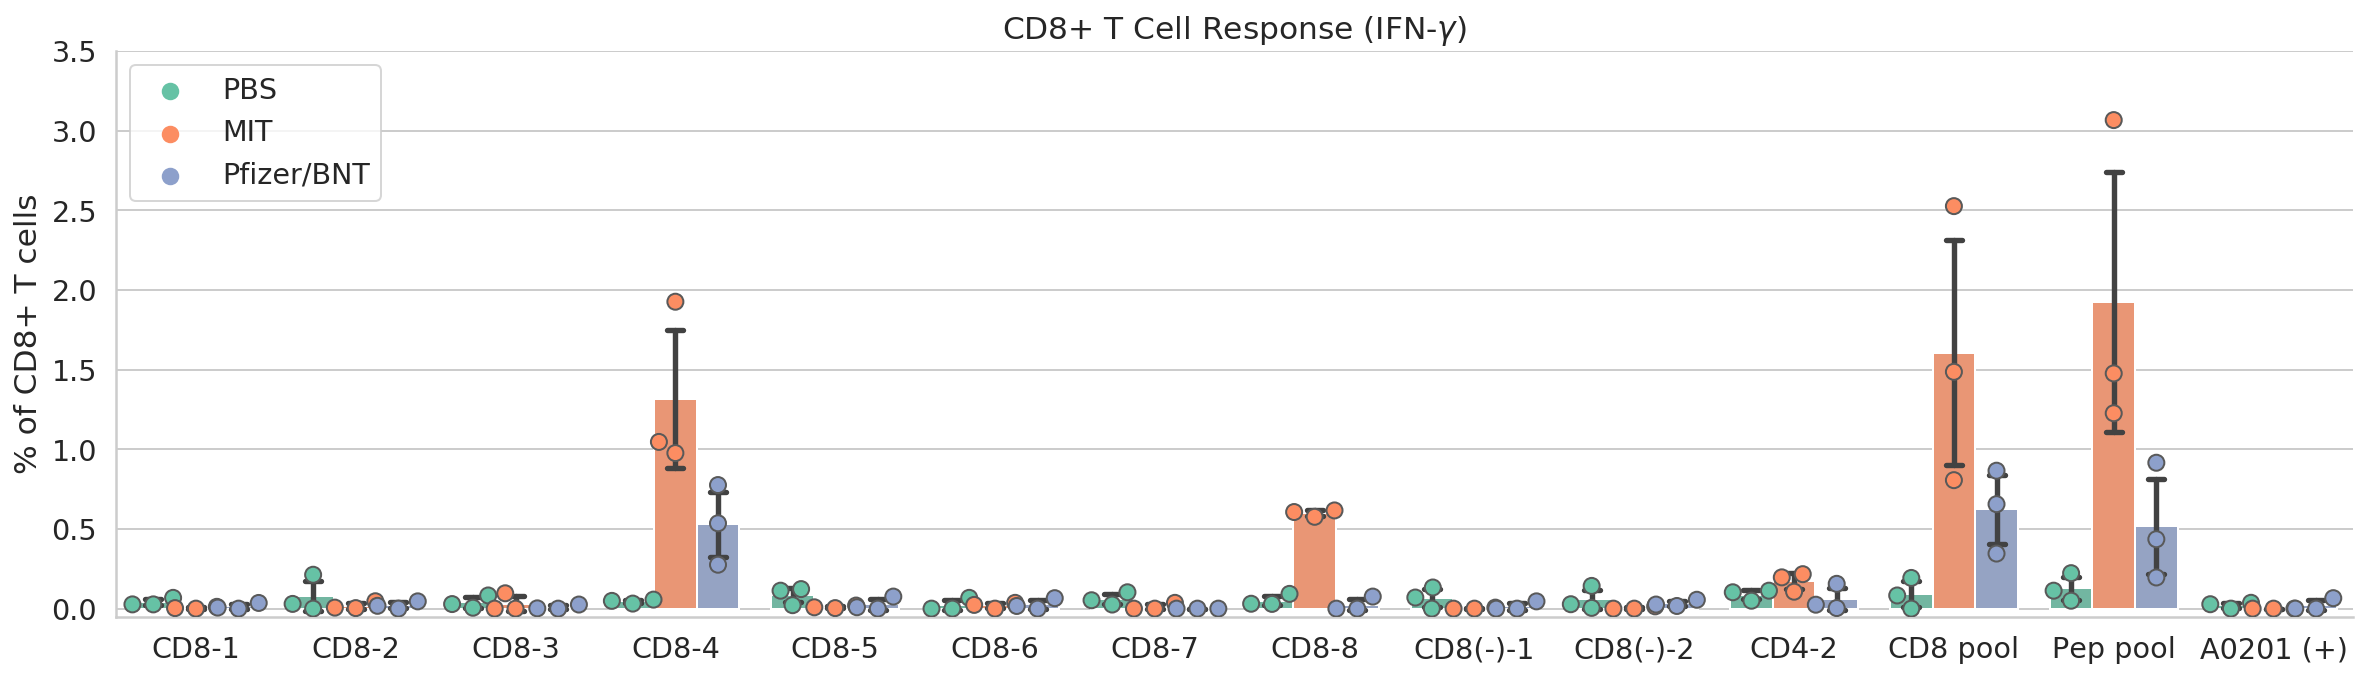

In [366]:
sns.set(font_scale=1.3, style='whitegrid')
ax1 = sns.catplot(
    data=immunogenicity_CD8_IFNr_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    aspect=3,
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=immunogenicity_CD8_IFNr_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([-0.05, 3.5])
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('% of CD8+ T cells')
ax2.set_title(r'CD8+ T Cell Response (IFN-$\gamma$)')
plt.tight_layout()
plt.savefig('figures/immunogenicity_CD8_IFNr.pdf')
plt.show()

In [367]:
# Compute statistics CD8+ / IFNr:

immunogenicity_data = immunogenicity_CD8_IFNr_df

for query in immunogenicity_data['variable'].drop_duplicates().values.tolist():
    print('Statistics for query peptide: ', query)
    data_query = immunogenicity_data.loc[immunogenicity_data['variable'] == query]
    print('Total data points (all groups): ', len(data_query))

    # One-way ANOVA
    data_query_PBS = data_query.loc[data_query['Vaccine'] == 'PBS']['value %'].values.tolist()
    data_query_MIT = data_query.loc[data_query['Vaccine'] == 'MIT']['value %'].values.tolist()
    data_query_BNT = data_query.loc[data_query['Vaccine'] == 'Pfizer/BNT']['value %'].values.tolist()
    print('Data PBS: ', data_query_PBS)
    print('Data MIT: ', data_query_MIT)
    print('Data Pfizer/BNT: ', data_query_BNT)
    print(f_oneway(data_query_PBS, data_query_MIT, data_query_BNT))

    # Tukey HSD
    print(pairwise_tukeyhsd(
        endog=data_query['value %'],
        groups=data_query['Vaccine'],
        alpha=0.05,
    ))

    print()
    print()

Statistics for query peptide:  CD8-1
Total data points (all groups):  9
Data PBS:  [0.0266667, 0.0676667, 0.0266667]
Data MIT:  [0.0113333, 0.0033333300000000002, 0.0]
Data Pfizer/BNT:  [0.035666699999999996, 0.0066666699999999995, 0.0]
F_onewayResult(statistic=3.1906947343204197, pvalue=0.11380087367532143)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS   0.0354 0.1106 -0.0092 0.0801  False
   MIT Pfizer/BNT   0.0092 0.7945 -0.0354 0.0538  False
   PBS Pfizer/BNT  -0.0262  0.247 -0.0708 0.0184  False
-------------------------------------------------------


Statistics for query peptide:  CD8-2
Total data points (all groups):  9
Data PBS:  [0.029666700000000004, 0.21266670000000001, 0.0]
Data MIT:  [0.0033333300000000002, 0.0463333, 0.006333330000000001]
Data Pfizer/BNT:  [0.0176667, 0.0456667, 0.0]
F_onewayResult(statistic=0.774793478949548, pvalue

### CD8+ TNFa

In [368]:
CD8_COLS = ['CD8-1', 'CD8-2', 'CD8-3', 'CD8-4', 'CD8-5', 'CD8-6', 'CD8-7', 'CD8-8', 'CD8(-)-1', 'CD8(-)-2', 'CD4-2', 'SARS-CoV CD8 pool', 'pooled pep', 'CD8 (+)']

immunogenicity_CD8_TNFa_data = pd.read_csv('data/immunogenicity/immunogenicity_CD8_TNFa.csv')
immunogenicity_CD8_TNFa_data = immunogenicity_CD8_TNFa_data.rename(columns={'Unnamed: 0': 'ID'})

print(immunogenicity_CD8_TNFa_data.columns.values.tolist())

# Only retain columns relevant to CD8 peptides.
immunogenicity_CD8_TNFa_data = immunogenicity_CD8_TNFa_data.loc[:, ['ID']+CD8_COLS]

# Clip any values < 0.
for col in CD8_COLS:
    immunogenicity_CD8_TNFa_data[col] = immunogenicity_CD8_TNFa_data[col].clip(lower=0)

immunogenicity_CD8_TNFa_data

['ID', 'W/O PEP', 'CD8-6', 'CD8-7', 'Iab(+)', 'CD8(-)-1', 'CD8-2', 'CD8-1', 'CD8(-)-2', 'CD8 (+)', 'CD8-3', 'CD8-4', 'CD8-8', 'CD4-2', 'CD8-5', 'CD4-1', 'pooled pep', 'PMA/Ionomycin', 'SARS-CoV CD8 pool', 'SARS-CoV CD4 pool']


,ID,CD8-1,CD8-2,CD8-3,CD8-4,CD8-5,CD8-6,CD8-7,CD8-8,CD8(-)-1,CD8(-)-2,CD4-2,SARS-CoV CD8 pool,pooled pep,CD8 (+)
0,PBS1,0.000333,0.000083,0.000000,0.000073,0.000000,0.000000,0.000063,0.000083,0.000053,0.000893,0.000000,0.000343,0.000623,0.000343
1,PBS2,0.000000,0.000793,0.000443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000113,0.000000,0.000000,0.000113,0.000000,0.000433
2,PBS3,0.000603,0.000343,0.000063,0.002093,0.001293,0.000033,0.000063,0.000083,0.000553,0.000073,0.000313,0.000053,0.000053,0.000303
3,MIT1,0.000796,0.000296,0.001396,0.003296,0.000000,0.000136,0.000086,0.003896,0.000626,0.000706,0.001796,0.002196,0.004596,0.002296
4,MIT2,0.000086,0.000206,0.000000,0.004796,0.000026,0.000076,0.000000,0.002096,0.000000,0.000216,0.001396,0.004596,0.008696,0.000146
5,MIT3,0.000676,0.000316,0.000796,0.003296,0.000586,0.000996,0.000646,0.001496,0.000536,0.001196,0.000556,0.000896,0.004296,0.000000
6,BNT1,0.002567,0.001367,0.000067,0.001367,0.000237,0.000167,0.000157,0.000307,0.000547,0.000277,0.000167,0.001067,0.001167,0.000167
7,BNT2,0.000967,0.000597,0.000000,0.000177,0.000067,0.000000,0.000000,0.000000,0.000167,0.000000,0.000277,0.000277,0.000687,0.000277
8,BNT3,0.000067,0.000167,0.000000,0.000587,0.000177,0.000087,0.000067,0.000287,0.000060,0.000067,0.000000,0.000837,0.000277,0.000000


In [369]:
immunogenicity_CD8_TNFa_df = pd.melt(
    immunogenicity_CD8_TNFa_data,
    id_vars='ID',
    value_vars=CD8_COLS,
)
immunogenicity_CD8_TNFa_df['value %'] = immunogenicity_CD8_TNFa_df['value'] * 100.

immunogenicity_CD8_TNFa_df['Vaccine'] = immunogenicity_CD8_TNFa_df['ID'].apply(lambda s: s[:3])
immunogenicity_CD8_TNFa_df['Vaccine'] = immunogenicity_CD8_TNFa_df['Vaccine'].replace('BNT', 'Pfizer/BNT')

immunogenicity_CD8_TNFa_df.replace(to_replace={'SARS-CoV CD8 pool': 'CD8 pool', 'pooled pep': 'Pep pool', 'CD8 (+)': 'A0201 (+)'}, inplace=True)

immunogenicity_CD8_TNFa_df

,ID,variable,value,value %,Vaccine
0,PBS1,CD8-1,0.000333,0.033333,PBS
1,PBS2,CD8-1,0.000000,0.000000,PBS
2,PBS3,CD8-1,0.000603,0.060333,PBS
3,MIT1,CD8-1,0.000796,0.079607,MIT
4,MIT2,CD8-1,0.000086,0.008607,MIT
...,...,...,...,...,...
121,MIT2,A0201 (+),0.000146,0.014607,MIT
122,MIT3,A0201 (+),0.000000,0.000000,MIT
123,BNT1,A0201 (+),0.000167,0.016667,Pfizer/BNT
124,BNT2,A0201 (+),0.000277,0.027667,Pfizer/BNT


In [370]:
# Compute mean/standard deviation of each group.
immunogenicity_CD8_TNFa_df.groupby(['Vaccine', 'variable']).agg(['count', 'mean', 'median', 'std'])[['value %']].round(decimals=5)

value %                           
                       count     mean   median      std
Vaccine    variable                                    
MIT        A0201 (+)       3  0.08140  0.01461  0.12855
           CD4-2           3  0.12494  0.13961  0.06329
           CD8 pool        3  0.25627  0.21961  0.18771
           CD8(-)-1        3  0.03874  0.05361  0.03385
           CD8(-)-2        3  0.07061  0.07061  0.04900
           CD8-1           3  0.05194  0.06761  0.03800
           CD8-2           3  0.02727  0.02961  0.00586
           CD8-3           3  0.07307  0.07961  0.07003
           CD8-4           3  0.37961  0.32961  0.08660
           CD8-5           3  0.02040  0.00261  0.03311
           CD8-6           3  0.04027  0.01361  0.05147
           CD8-7           3  0.02440  0.00861  0.03508
           CD8-8           3  0.24961  0.20961  0.12490
           Pep pool        3  0.58627  0.45961  0.24583
PBS        A0201 (+)       3  0.03600  0.03433  0.00666
           CD4-2           3  0.01044  0.00000  0.01809
           CD8 pool        3  0.01700  0.01133  0.01531
           CD8(-)-1        3  0.02400  0.01133  0.02730
           CD8(-)-2        3  0.03222  0.00733  0.04960
           CD8-1           3  0.03122  0.03333  0.03022
           CD8-2           3  0.04067  0.03433  0.03592
           CD8-3           3  0.01689  0.00633  0.02398
           CD8-4           3  0.07222  0.00733  0.11880
           CD8-5           3  0.04311  0.00000  0.07467
           CD8-6           3  0.00111  0.00000  0.00192
           CD8-7           3  0.00422  0.00633  0.00366
           CD8-8           3  0.00556  0.00833  0.00481
           Pep pool        3  0.02256  0.00533  0.03455
Pfizer/BNT A0201 (+)       3  0.01478  0.01667  0.01393
           CD4-2           3  0.01478  0.01667  0.01393
           CD8 pool        3  0.07267  0.08367  0.04063
           CD8(-)-1        3  0.02579  0.01667  0.02556
           CD8(-)-2        3  0.01144  0.00667  0.01444
           CD8-1           3  0.12000  0.09667  0.12662
           CD8-2           3  0.07100  0.05967  0.06080
           CD8-3           3  0.00222  0.00000  0.00385
           CD8-4           3  0.07100  0.05867  0.06045
           CD8-5           3  0.01600  0.01767  0.00862
           CD8-6           3  0.00844  0.00867  0.00834
           CD8-7           3  0.00744  0.00667  0.00786
           CD8-8           3  0.01978  0.02867  0.01716
           Pep pool        3  0.07100  0.06867  0.04455

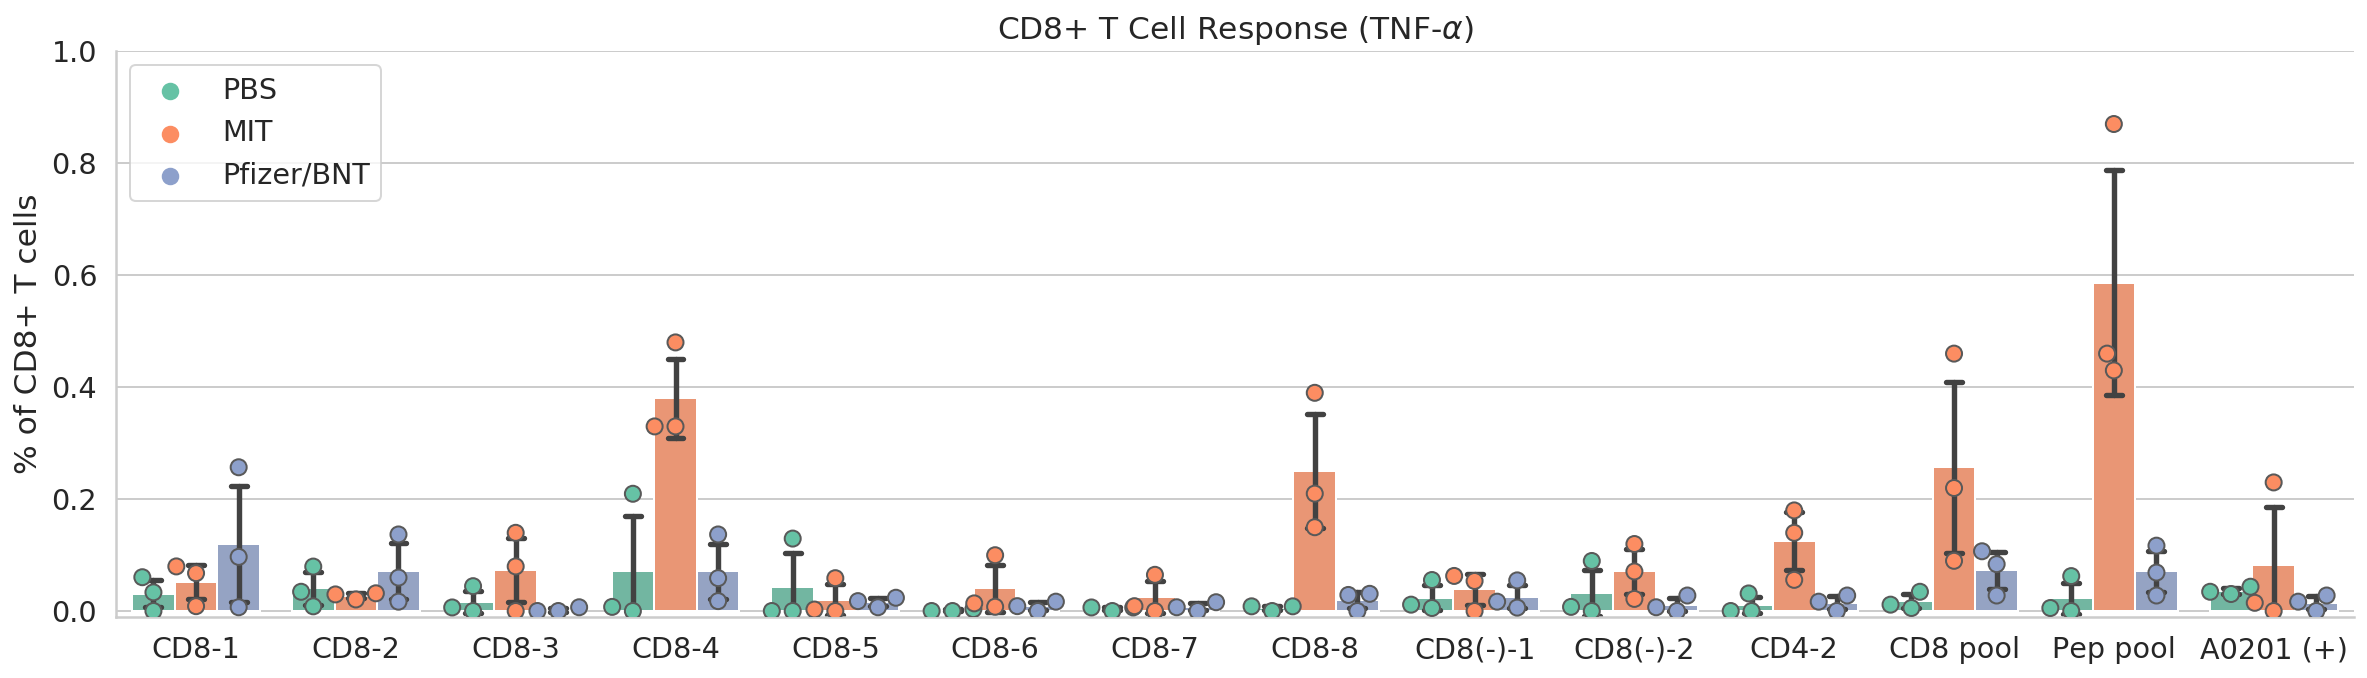

In [372]:
sns.set(font_scale=1.3, style='whitegrid')
ax1 = sns.catplot(
    data=immunogenicity_CD8_TNFa_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    aspect=3,
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=immunogenicity_CD8_TNFa_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([-0.01, 1.0])
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('% of CD8+ T cells')
ax2.set_title(r'CD8+ T Cell Response (TNF-$\alpha$)')
plt.tight_layout()
plt.savefig('figures/immunogenicity_CD8_TNFa.pdf')
plt.show()

In [373]:
# Compute statistics CD8+ / TNFa:

immunogenicity_data = immunogenicity_CD8_TNFa_df

for query in immunogenicity_data['variable'].drop_duplicates().values.tolist():
    print('Statistics for query peptide: ', query)
    data_query = immunogenicity_data.loc[immunogenicity_data['variable'] == query]
    print('Total data points (all groups): ', len(data_query))

    # One-way ANOVA
    data_query_PBS = data_query.loc[data_query['Vaccine'] == 'PBS']['value %'].values.tolist()
    data_query_MIT = data_query.loc[data_query['Vaccine'] == 'MIT']['value %'].values.tolist()
    data_query_BNT = data_query.loc[data_query['Vaccine'] == 'Pfizer/BNT']['value %'].values.tolist()
    print('Data PBS: ', data_query_PBS)
    print('Data MIT: ', data_query_MIT)
    print('Data Pfizer/BNT: ', data_query_BNT)
    print(f_oneway(data_query_PBS, data_query_MIT, data_query_BNT))

    # Tukey HSD
    print(pairwise_tukeyhsd(
        endog=data_query['value %'],
        groups=data_query['Vaccine'],
        alpha=0.05,
    ))

    print()
    print()

Statistics for query peptide:  CD8-1
Total data points (all groups):  9
Data PBS:  [0.0333333, 0.0, 0.060333300000000006]
Data MIT:  [0.0796067, 0.00860667, 0.06760669999999999]
Data Pfizer/BNT:  [0.25666669999999997, 0.0966667, 0.0066666699999999995]
F_onewayResult(statistic=1.055641216819361, pvalue=0.40474843664596943)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS  -0.0207    0.9 -0.2166 0.1752  False
   MIT Pfizer/BNT   0.0681 0.5673 -0.1279  0.264  False
   PBS Pfizer/BNT   0.0888 0.4045 -0.1071 0.2847  False
-------------------------------------------------------


Statistics for query peptide:  CD8-2
Total data points (all groups):  9
Data PBS:  [0.00833333, 0.0793333, 0.034333300000000004]
Data MIT:  [0.0296067, 0.020606700000000002, 0.0316067]
Data Pfizer/BNT:  [0.1366667, 0.059666699999999996, 0.0166667]
F_onewayResult(statistic=0.8996762

### CD4+ IL-2

In [11]:
CD4_COLS = ['CD4-1', 'CD4-2', 'SARS-CoV CD4 pool', 'Iab(+)']

immunogenicity_CD4_IL2_data = pd.read_csv('data/immunogenicity/immunogenicity_CD4_IL2.csv')
immunogenicity_CD4_IL2_data = immunogenicity_CD4_IL2_data.rename(columns={'Unnamed: 0': 'ID'})

print(immunogenicity_CD4_IL2_data.columns.values.tolist())

# Only retain columns relevant to CD4 peptides.
immunogenicity_CD4_IL2_data = immunogenicity_CD4_IL2_data.loc[:, ['ID']+CD4_COLS]

# Clip any values < 0.
for col in CD4_COLS:
    immunogenicity_CD4_IL2_data[col] = immunogenicity_CD4_IL2_data[col].clip(lower=0)

immunogenicity_CD4_IL2_data

['ID', 'W/O PEP', 'CD8-6', 'CD8-7', 'Iab(+)', 'CD8(-)-1', 'CD8-2', 'CD8-1', 'CD8(-)-2', 'CD8 (+)', 'CD8-3', 'CD8-4', 'CD8-8', 'CD4-2', 'CD8-5', 'CD4-1', 'pooled pep', 'PMA/Ionomycin', 'SARS-CoV CD8 pool', 'SARS-CoV CD4 pool']


,ID,CD4-1,CD4-2,SARS-CoV CD4 pool,Iab(+)
0,PBS1,0.000060,0.00006,0.000260,0.000000e+00
1,PBS2,0.000750,0.00052,0.000070,0.000000e+00
2,PBS3,0.000240,0.00006,0.000000,0.000000e+00
3,MIT1,0.000120,0.00033,0.002460,3.666670e-07
4,MIT2,0.000860,0.00096,0.002960,5.703670e-04
5,MIT3,0.000200,0.00041,0.001560,5.036670e-05
6,BNT1,0.000033,0.00000,0.000123,1.130330e-04
7,BNT2,0.000013,0.00000,0.000000,0.000000e+00
8,BNT3,0.000103,0.00000,0.000003,1.303330e-05


In [12]:
immunogenicity_CD4_IL2_df = pd.melt(
    immunogenicity_CD4_IL2_data,
    id_vars='ID',
    value_vars=CD4_COLS,
)
immunogenicity_CD4_IL2_df['value %'] = immunogenicity_CD4_IL2_df['value'] * 100.

immunogenicity_CD4_IL2_df['Vaccine'] = immunogenicity_CD4_IL2_df['ID'].apply(lambda s: s[:3])
immunogenicity_CD4_IL2_df['Vaccine'] = immunogenicity_CD4_IL2_df['Vaccine'].replace('BNT', 'Pfizer/BNT')

immunogenicity_CD4_IL2_df.replace(to_replace={'SARS-CoV CD4 pool': 'CD4 pool', 'Iab(+)': 'IAb (+)'}, inplace=True)

immunogenicity_CD4_IL2_df

,ID,variable,value,value %,Vaccine
0,PBS1,CD4-1,6.000000e-05,0.006000,PBS
1,PBS2,CD4-1,7.500000e-04,0.075000,PBS
2,PBS3,CD4-1,2.400000e-04,0.024000,PBS
3,MIT1,CD4-1,1.203670e-04,0.012037,MIT
4,MIT2,CD4-1,8.603670e-04,0.086037,MIT
5,MIT3,CD4-1,2.003670e-04,0.020037,MIT
6,BNT1,CD4-1,3.303330e-05,0.003303,Pfizer/BNT
7,BNT2,CD4-1,1.303330e-05,0.001303,Pfizer/BNT
8,BNT3,CD4-1,1.030330e-04,0.010303,Pfizer/BNT
9,PBS1,CD4-2,6.000000e-05,0.006000,PBS


In [13]:
# Compute mean/standard deviation of each group.
immunogenicity_CD4_IL2_df.groupby(['Vaccine', 'variable']).agg(['count', 'mean', 'median', 'std'])[['value %']]

value %                              
                      count      mean    median       std
Vaccine    variable                                      
MIT        CD4 pool       3  0.232703  0.246037  0.070946
           CD4-1          3  0.039370  0.020037  0.040612
           CD4-2          3  0.056703  0.041037  0.034298
           IAb (+)        3  0.020703  0.005037  0.031565
PBS        CD4 pool       3  0.011000  0.007000  0.013454
           CD4-1          3  0.035000  0.024000  0.035791
           CD4-2          3  0.021333  0.006000  0.026558
           IAb (+)        3  0.000000  0.000000  0.000000
Pfizer/BNT CD4 pool       3  0.004202  0.000303  0.007017
           CD4-1          3  0.004970  0.003303  0.004726
           CD4-2          3  0.000000  0.000000  0.000000
           IAb (+)        3  0.004202  0.001303  0.006184

/data/gl/g3/bcarter/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  # This is added back by InteractiveShellApp.init_path()
/data/gl/g3/bcarter/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.


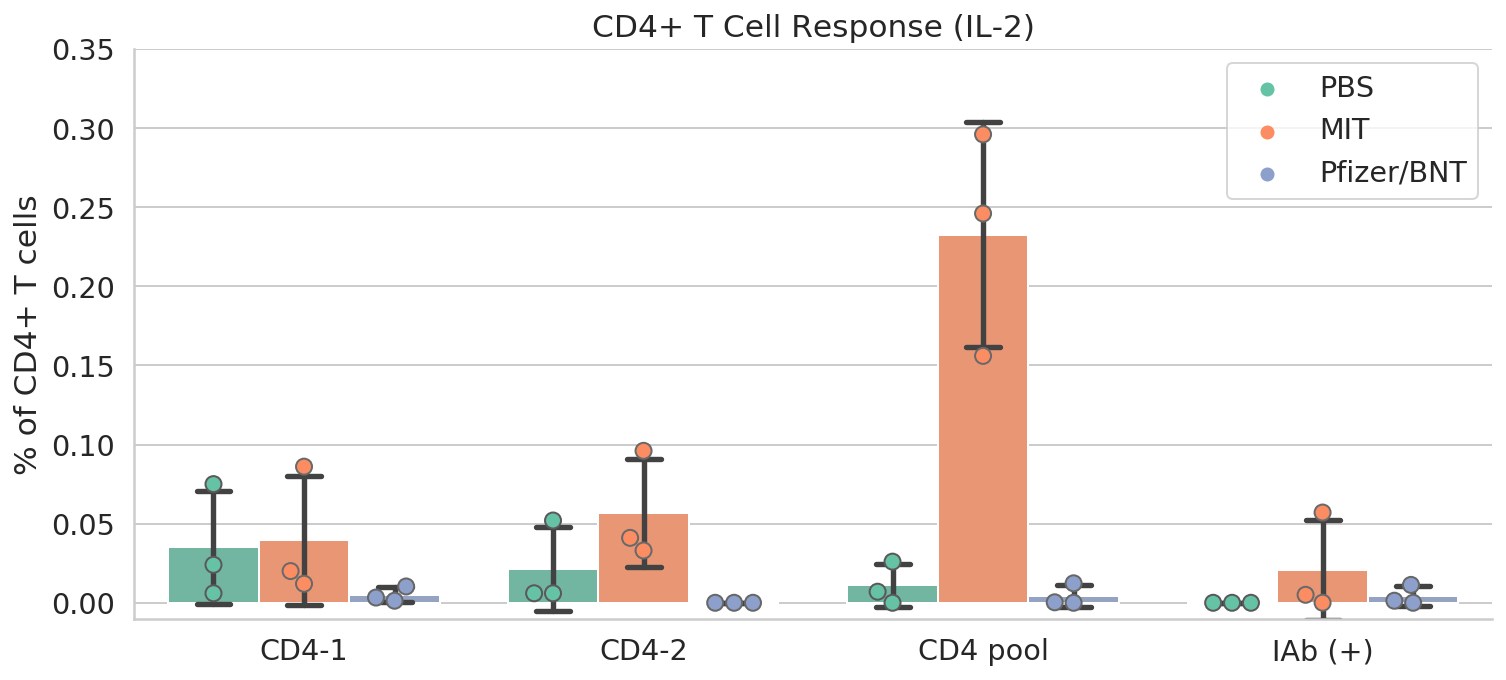

In [25]:
sns.set(font_scale=1.3, style='whitegrid')
ax1 = sns.catplot(
    data=immunogenicity_CD4_IL2_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    aspect=1.8,
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=immunogenicity_CD4_IL2_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([-0.01, 0.35])
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('% of CD4+ T cells')
ax2.set_title(r'CD4+ T Cell Response (IL-2)')
plt.tight_layout()
plt.savefig('figures/immunogenicity_CD4_IL2.pdf')
plt.show()

In [18]:
# Compute statistics CD4+ / IL2:

immunogenicity_data = immunogenicity_CD4_IL2_df

for query in immunogenicity_data['variable'].drop_duplicates().values.tolist():
    print('Statistics for query peptide: ', query)
    data_query = immunogenicity_data.loc[immunogenicity_data['variable'] == query]
    print('Total data points (all groups): ', len(data_query))

    # One-way ANOVA
    data_query_PBS = data_query.loc[data_query['Vaccine'] == 'PBS']['value %'].values.tolist()
    data_query_MIT = data_query.loc[data_query['Vaccine'] == 'MIT']['value %'].values.tolist()
    data_query_BNT = data_query.loc[data_query['Vaccine'] == 'Pfizer/BNT']['value %'].values.tolist()
    print('Data PBS: ', data_query_PBS)
    print('Data MIT: ', data_query_MIT)
    print('Data Pfizer/BNT: ', data_query_BNT)
    print(f_oneway(data_query_PBS, data_query_MIT, data_query_BNT))

    # Tukey HSD
    print(pairwise_tukeyhsd(
        endog=data_query['value %'],
        groups=data_query['Vaccine'],
        alpha=0.05,
    ))

    print()
    print()

Statistics for query peptide:  CD4-1
Total data points (all groups):  9
Data PBS:  [0.005999999999999999, 0.075, 0.023999999999999997]
Data MIT:  [0.012036700000000001, 0.08603670000000001, 0.0200367]
Data Pfizer/BNT:  [0.00330333, 0.00130333, 0.010303299999999998]
F_onewayResult(statistic=1.0689975136298766, pvalue=0.4007758009529593)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS  -0.0044    0.9 -0.0829 0.0741  False
   MIT Pfizer/BNT  -0.0344 0.4258 -0.1129 0.0441  False
   PBS Pfizer/BNT    -0.03 0.5105 -0.1085 0.0485  False
-------------------------------------------------------


Statistics for query peptide:  CD4-2
Total data points (all groups):  9
Data PBS:  [0.005999999999999999, 0.052000000000000005, 0.005999999999999999]
Data MIT:  [0.033036699999999995, 0.09603669999999999, 0.041036699999999995]
Data Pfizer/BNT:  [0.0, 0.0, 0.0]
F_onewa

### CD8+ IL-2

In [19]:
CD8_COLS = ['CD8-1', 'CD8-2', 'CD8-3', 'CD8-4', 'CD8-5', 'CD8-6', 'CD8-7', 'CD8-8', 'CD8(-)-1', 'CD8(-)-2', 'CD4-2', 'SARS-CoV CD8 pool', 'pooled pep', 'CD8 (+)']

immunogenicity_CD8_IL2_data = pd.read_csv('data/immunogenicity/immunogenicity_CD8_IL2.csv')
immunogenicity_CD8_IL2_data = immunogenicity_CD8_IL2_data.rename(columns={'Unnamed: 0': 'ID'})

print(immunogenicity_CD8_IL2_data.columns.values.tolist())

# Only retain columns relevant to CD8 peptides.
immunogenicity_CD8_IL2_data = immunogenicity_CD8_IL2_data.loc[:, ['ID']+CD8_COLS]

# Clip any values < 0.
for col in CD8_COLS:
    immunogenicity_CD8_IL2_data[col] = immunogenicity_CD8_IL2_data[col].clip(lower=0)

immunogenicity_CD8_IL2_data

['ID', 'W/O PEP', 'CD8-6', 'CD8-7', 'Iab(+)', 'CD8(-)-1', 'CD8-2', 'CD8-1', 'CD8(-)-2', 'CD8 (+)', 'CD8-3', 'CD8-4', 'CD8-8', 'CD4-2', 'CD8-5', 'CD4-1', 'pooled pep', 'PMA/Ionomycin', 'SARS-CoV CD8 pool', 'SARS-CoV CD4 pool']


,ID,CD8-1,CD8-2,CD8-3,CD8-4,CD8-5,CD8-6,CD8-7,CD8-8,CD8(-)-1,CD8(-)-2,CD4-2,SARS-CoV CD8 pool,pooled pep,CD8 (+)
0,PBS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,PBS2,0.000320,0.000340,0.000000,0.001800,0.000000,0.000320,0.000000,0.002600,0.000000,0.000000,0.000310,0.000000,0.000310,0.000000
2,PBS3,0.000270,0.001100,0.000000,0.000000,0.000000,0.000000,0.000530,0.000000,0.000000,0.000280,0.000000,0.000000,0.000000,0.000000
3,MIT1,0.000521,0.000401,0.000111,0.000651,0.000011,0.000191,0.000011,0.000461,0.000011,0.000251,0.000171,0.000841,0.000981,0.000051
4,MIT2,0.000000,0.000321,0.000000,0.001181,0.000181,0.000081,0.000001,0.000631,0.000051,0.000021,0.000491,0.001181,0.002281,0.000001
5,MIT3,0.000000,0.000000,0.000000,0.000021,0.000041,0.000000,0.000000,0.000251,0.000051,0.000000,0.000000,0.000181,0.000211,0.000000
6,BNT1,0.000763,0.000000,0.000033,0.000033,0.000025,0.000033,0.000000,0.000000,0.000030,0.000033,0.000032,0.000223,0.000313,0.000000
7,BNT2,0.000000,0.000000,0.000000,0.000143,0.000033,0.000031,0.000031,0.000043,0.000000,0.000033,0.000033,0.000133,0.000033,0.000033
8,BNT3,0.000133,0.000000,0.000000,0.000243,0.000000,0.000000,0.000000,0.000043,0.000000,0.000033,0.000043,0.000043,0.000033,0.000000


In [20]:
immunogenicity_CD8_IL2_df = pd.melt(
    immunogenicity_CD8_IL2_data,
    id_vars='ID',
    value_vars=CD8_COLS,
)
immunogenicity_CD8_IL2_df['value %'] = immunogenicity_CD8_IL2_df['value'] * 100.

immunogenicity_CD8_IL2_df['Vaccine'] = immunogenicity_CD8_IL2_df['ID'].apply(lambda s: s[:3])
immunogenicity_CD8_IL2_df['Vaccine'] = immunogenicity_CD8_IL2_df['Vaccine'].replace('BNT', 'Pfizer/BNT')

immunogenicity_CD8_IL2_df.replace(to_replace={'SARS-CoV CD8 pool': 'CD8 pool', 'pooled pep': 'Pep pool', 'CD8 (+)': 'A0201 (+)'}, inplace=True)

immunogenicity_CD8_IL2_df

,ID,variable,value,value %,Vaccine
0,PBS1,CD8-1,0.000000,0.000000,PBS
1,PBS2,CD8-1,0.000320,0.032000,PBS
2,PBS3,CD8-1,0.000270,0.027000,PBS
3,MIT1,CD8-1,0.000521,0.052147,MIT
4,MIT2,CD8-1,0.000000,0.000000,MIT
...,...,...,...,...,...
121,MIT2,A0201 (+),0.000001,0.000147,MIT
122,MIT3,A0201 (+),0.000000,0.000000,MIT
123,BNT1,A0201 (+),0.000000,0.000000,Pfizer/BNT
124,BNT2,A0201 (+),0.000033,0.003333,Pfizer/BNT


In [21]:
# Compute mean/standard deviation of each group.
immunogenicity_CD8_IL2_df.groupby(['Vaccine', 'variable']).agg(['count', 'mean', 'median', 'std'])[['value %']].round(decimals=5)

value %                           
                       count     mean   median      std
Vaccine    variable                                    
MIT        A0201 (+)       3  0.00176  0.00015  0.00293
           CD4-2           3  0.02210  0.01715  0.02494
           CD8 pool        3  0.07348  0.08415  0.05085
           CD8(-)-1        3  0.00381  0.00515  0.00231
           CD8(-)-2        3  0.00910  0.00215  0.01394
           CD8-1           3  0.01738  0.00000  0.03011
           CD8-2           3  0.02410  0.03215  0.02125
           CD8-3           3  0.00372  0.00000  0.00644
           CD8-4           3  0.06181  0.06515  0.05807
           CD8-5           3  0.00781  0.00415  0.00907
           CD8-6           3  0.00910  0.00815  0.00961
           CD8-7           3  0.00043  0.00015  0.00062
           CD8-8           3  0.04481  0.04615  0.01904
           Pep pool        3  0.11581  0.09815  0.10462
PBS        A0201 (+)       3  0.00000  0.00000  0.00000
           CD4-2           3  0.01033  0.00000  0.01790
           CD8 pool        3  0.00000  0.00000  0.00000
           CD8(-)-1        3  0.00000  0.00000  0.00000
           CD8(-)-2        3  0.00933  0.00000  0.01617
           CD8-1           3  0.01967  0.02700  0.01721
           CD8-2           3  0.04800  0.03400  0.05632
           CD8-3           3  0.00000  0.00000  0.00000
           CD8-4           3  0.06000  0.00000  0.10392
           CD8-5           3  0.00000  0.00000  0.00000
           CD8-6           3  0.01067  0.00000  0.01848
           CD8-7           3  0.01767  0.00000  0.03060
           CD8-8           3  0.08667  0.00000  0.15011
           Pep pool        3  0.01033  0.00000  0.01790
Pfizer/BNT A0201 (+)       3  0.00111  0.00000  0.00192
           CD4-2           3  0.00363  0.00333  0.00061
           CD8 pool        3  0.01333  0.01333  0.00900
           CD8(-)-1        3  0.00100  0.00000  0.00173
           CD8(-)-2        3  0.00333  0.00333  0.00000
           CD8-1           3  0.02989  0.01333  0.04077
           CD8-2           3  0.00000  0.00000  0.00000
           CD8-3           3  0.00111  0.00000  0.00192
           CD8-4           3  0.01400  0.01433  0.01050
           CD8-5           3  0.00194  0.00248  0.00173
           CD8-6           3  0.00216  0.00314  0.00187
           CD8-7           3  0.00103  0.00000  0.00179
           CD8-8           3  0.00289  0.00433  0.00250
           Pep pool        3  0.01267  0.00333  0.01617

/data/gl/g3/bcarter/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  # This is added back by InteractiveShellApp.init_path()
/data/gl/g3/bcarter/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.


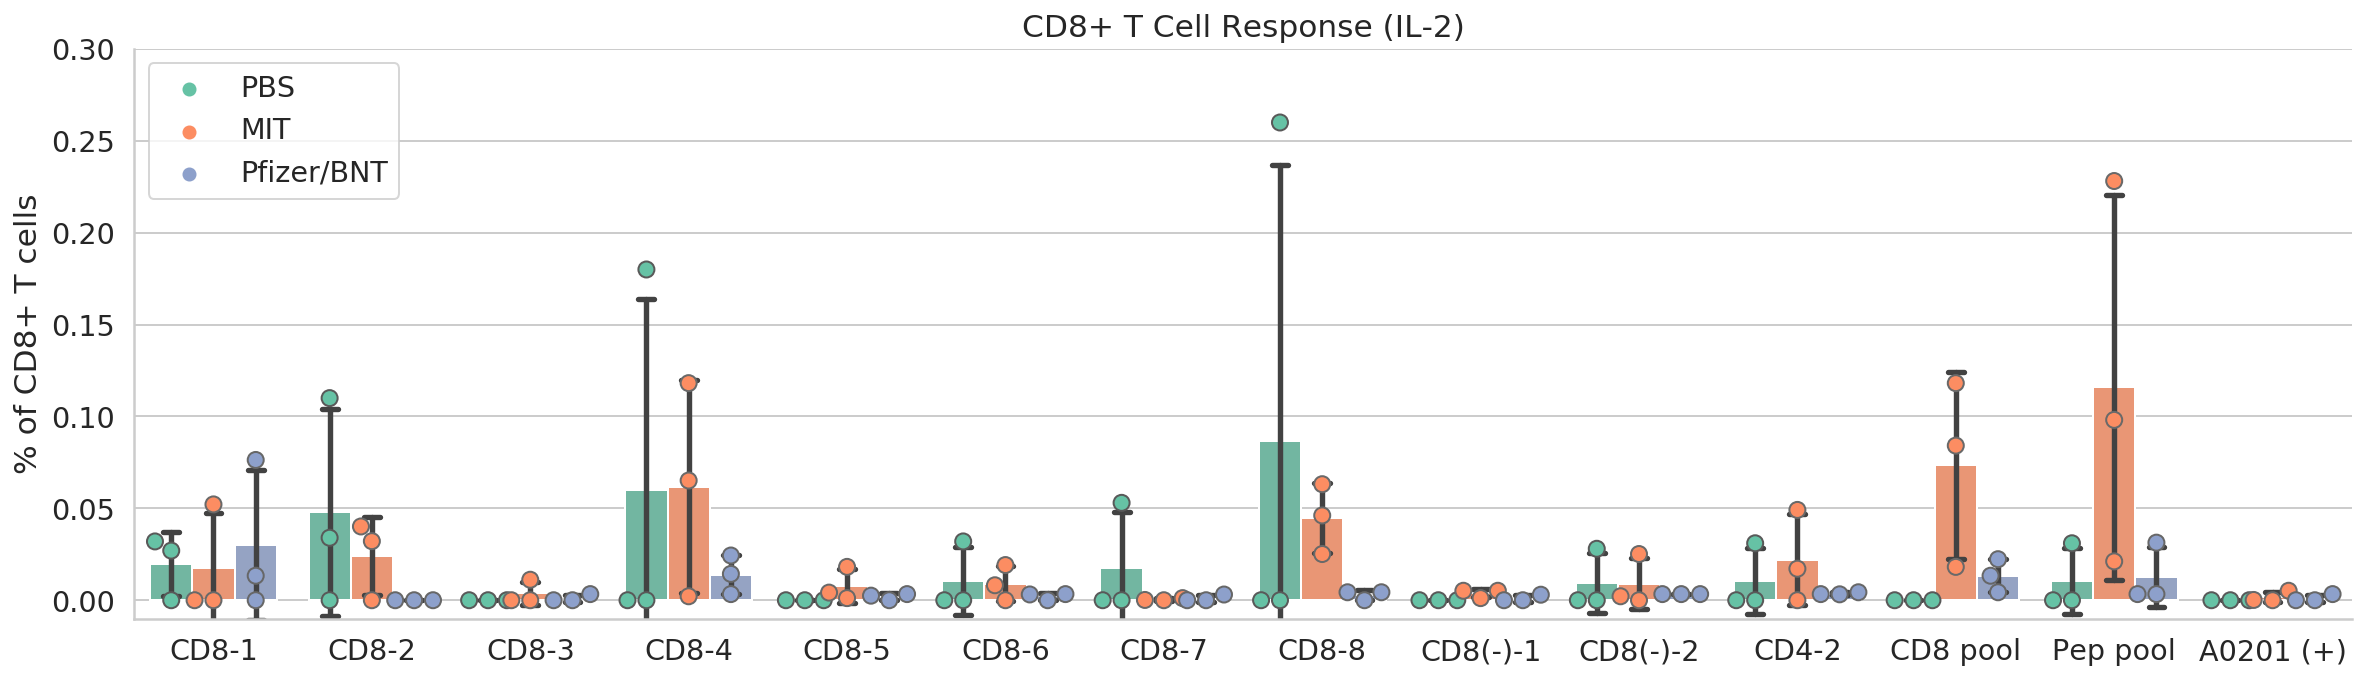

In [26]:
sns.set(font_scale=1.3, style='whitegrid')
ax1 = sns.catplot(
    data=immunogenicity_CD8_IL2_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    aspect=3,
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=immunogenicity_CD8_IL2_df,
    x='variable',
    y='value %',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([-0.01, 0.30])
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('% of CD8+ T cells')
ax2.set_title(r'CD8+ T Cell Response (IL-2)')
plt.tight_layout()
plt.savefig('figures/immunogenicity_CD8_IL2.pdf')
plt.show()

In [24]:
# Compute statistics CD8+ / IL2:

immunogenicity_data = immunogenicity_CD8_IL2_df

for query in immunogenicity_data['variable'].drop_duplicates().values.tolist():
    print('Statistics for query peptide: ', query)
    data_query = immunogenicity_data.loc[immunogenicity_data['variable'] == query]
    print('Total data points (all groups): ', len(data_query))

    # One-way ANOVA
    data_query_PBS = data_query.loc[data_query['Vaccine'] == 'PBS']['value %'].values.tolist()
    data_query_MIT = data_query.loc[data_query['Vaccine'] == 'MIT']['value %'].values.tolist()
    data_query_BNT = data_query.loc[data_query['Vaccine'] == 'Pfizer/BNT']['value %'].values.tolist()
    print('Data PBS: ', data_query_PBS)
    print('Data MIT: ', data_query_MIT)
    print('Data Pfizer/BNT: ', data_query_BNT)
    print(f_oneway(data_query_PBS, data_query_MIT, data_query_BNT))

    # Tukey HSD
    print(pairwise_tukeyhsd(
        endog=data_query['value %'],
        groups=data_query['Vaccine'],
        alpha=0.05,
    ))

    print()
    print()

Statistics for query peptide:  CD8-1
Total data points (all groups):  9
Data PBS:  [0.0, 0.032, 0.027]
Data MIT:  [0.0521467, 0.0, 0.0]
Data Pfizer/BNT:  [0.0763333, 0.0, 0.0133333]
F_onewayResult(statistic=0.13933311067820192, pvalue=0.8726730463178949)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS   0.0023    0.9  -0.075 0.0796  False
   MIT Pfizer/BNT   0.0125 0.8671 -0.0648 0.0898  False
   PBS Pfizer/BNT   0.0102    0.9 -0.0671 0.0876  False
-------------------------------------------------------


Statistics for query peptide:  CD8-2
Total data points (all groups):  9
Data PBS:  [0.0, 0.033999999999999996, 0.11]
Data MIT:  [0.040146699999999994, 0.0321467, 0.0]
Data Pfizer/BNT:  [0.0, 0.0, 0.0]
F_onewayResult(statistic=1.4306578374022352, pvalue=0.3104267419557004)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   mean

# Neutralizing Titer

In [24]:
neutralizing_titer_data = pd.read_csv('data/Neutralizing titer.csv')
neutralizing_titer_data['Name'] = neutralizing_titer_data.apply(
    lambda row: '%s\n(%s)' % (row['Vaccine'], row['Strain']), axis=1)
neutralizing_titer_data

,ID,Vaccine,Strain,NT100 titer,Name
0,PBS-1,PBS,WA-1,0,PBS\n(WA-1)
1,PBS-2,PBS,WA-1,0,PBS\n(WA-1)
2,PBS-3,PBS,WA-1,0,PBS\n(WA-1)
3,PBS-4,PBS,WA-1,40,PBS\n(WA-1)
4,PBS-1,PBS,Beta,0,PBS\n(Beta)
5,PBS-2,PBS,Beta,0,PBS\n(Beta)
6,PBS-3,PBS,Beta,0,PBS\n(Beta)
7,PBS-4,PBS,Beta,0,PBS\n(Beta)
8,MIT-1,MIT,WA-1,40,MIT\n(WA-1)
9,MIT-2,MIT,WA-1,0,MIT\n(WA-1)


In [25]:
# Compute mean/standard deviation of each group.
neutralizing_titer_data.groupby(['Strain', 'Vaccine']).agg(['count', 'mean', 'median', 'std'])[['NT100 titer']]

NT100 titer                          
                        count  mean median          std
Strain Vaccine                                         
Beta   MIT                  5     0      0     0.000000
       PBS                  4     0      0     0.000000
       Pfizer/BNT           5   896    640   350.542437
WA-1   MIT                  5     8      0    17.888544
       PBS                  4    10      0    20.000000
       Pfizer/BNT           5  2048   1280  1887.728794

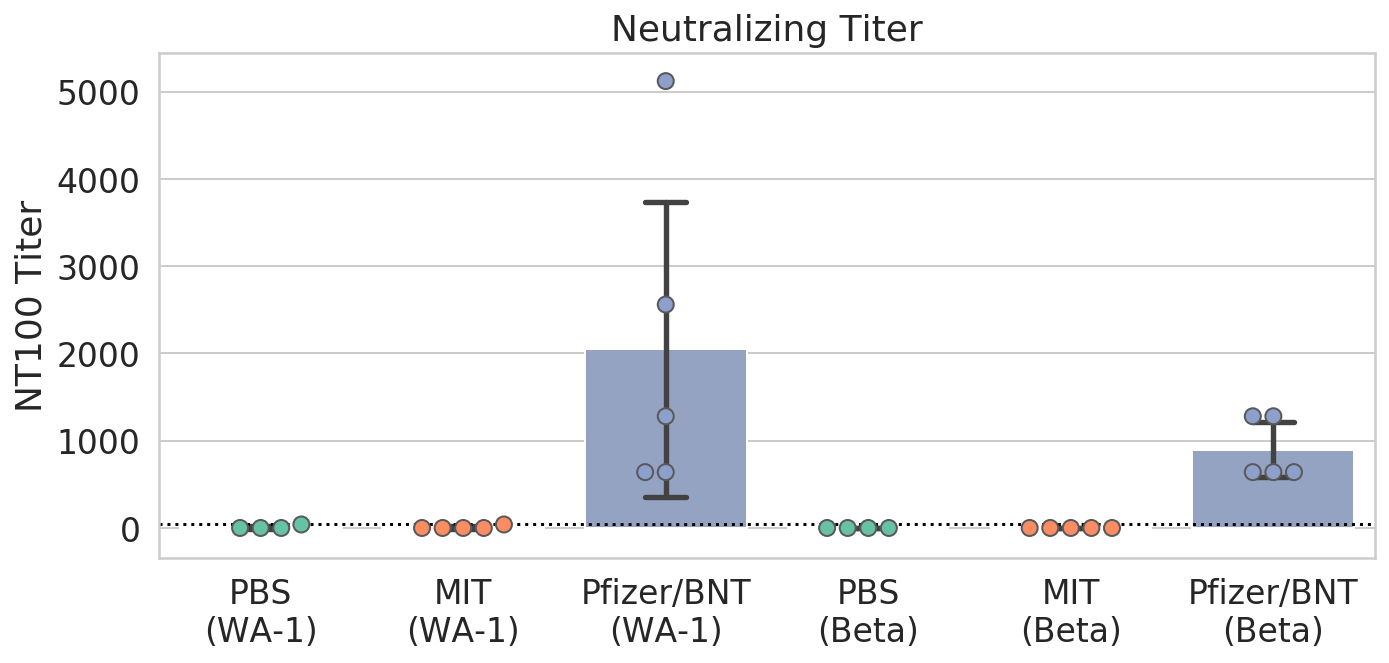

In [27]:
sns.set(font_scale=1.5, style='whitegrid')
plt.figure(figsize=(10,5))
ax1 = sns.barplot(
    data=neutralizing_titer_data,
    x='Name',
    y='NT100 titer',
    ci='sd',
    capsize=0.2,
    order=['PBS\n(WA-1)', 'MIT\n(WA-1)', 'Pfizer/BNT\n(WA-1)', 'PBS\n(Beta)', 'MIT\n(Beta)', 'Pfizer/BNT\n(Beta)'],
    palette=sns.color_palette('Set2')[:3] * 2,
)
ax2 = sns.swarmplot(
    data=neutralizing_titer_data,
    x='Name',
    y='NT100 titer',
    dodge=True,
    size=8,
    linewidth=1,
    order=['PBS\n(WA-1)', 'MIT\n(WA-1)', 'Pfizer/BNT\n(WA-1)', 'PBS\n(Beta)', 'MIT\n(Beta)', 'Pfizer/BNT\n(Beta)'],
    palette=sns.color_palette('Set2')[:3] * 2,
)
plt.axhline(y=40, linestyle='dotted', c='black', alpha=1.0, linewidth=1.5)  # Limit of detection
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('NT100 Titer')
ax2.set_title('Neutralizing Titer')
plt.tight_layout()
plt.savefig('figures/neutralizing_titer.pdf')
plt.show()

In [28]:
# Run one-way ANOVA of Neutralizing Titer (WA-1 strain)

neutralizing_titer_WA1_PBS = neutralizing_titer_data.loc[
    (neutralizing_titer_data['Vaccine'] == 'PBS') & (neutralizing_titer_data['Strain'] == 'WA-1')]['NT100 titer'].values.tolist()
neutralizing_titer_WA1_MIT = neutralizing_titer_data.loc[
    (neutralizing_titer_data['Vaccine'] == 'MIT') & (neutralizing_titer_data['Strain'] == 'WA-1')]['NT100 titer'].values.tolist()
neutralizing_titer_WA1_BNT = neutralizing_titer_data.loc[
    (neutralizing_titer_data['Vaccine'] == 'Pfizer/BNT') & (neutralizing_titer_data['Strain'] == 'WA-1')]['NT100 titer'].values.tolist()
print('Data, PBS: ', neutralizing_titer_WA1_PBS)
print('Data, MIT: ', neutralizing_titer_WA1_MIT)
print('Data, Pfizer/BNT: ', neutralizing_titer_WA1_BNT)
print()

print(f_oneway(neutralizing_titer_WA1_PBS, neutralizing_titer_WA1_MIT, neutralizing_titer_WA1_BNT))

Data, PBS:  [0, 0, 0, 40]
Data, MIT:  [40, 0, 0, 0, 0]
Data, Pfizer/BNT:  [2560, 640, 5120, 640, 1280]

F_onewayResult(statistic=5.156018803173518, pvalue=0.026316153583194363)


In [29]:
# Run Tukey's test of Neutralizing Titer (WA-1 strain)

neutralizing_titer_data_WA1 = neutralizing_titer_data.loc[neutralizing_titer_data['Strain'] == 'WA-1']
print(len(neutralizing_titer_data_WA1))

tukey_result = pairwise_tukeyhsd(
    endog=neutralizing_titer_data_WA1['NT100 titer'],
    groups=neutralizing_titer_data_WA1['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

14
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1   group2   meandiff p-adj    lower      upper   reject
-------------------------------------------------------------
   MIT        PBS      2.0    0.9 -2059.4633 2063.4633  False
   MIT Pfizer/BNT   2040.0 0.0398    96.4338 3983.5662   True
   PBS Pfizer/BNT   2038.0 0.0527   -23.4633 4099.4633  False
-------------------------------------------------------------


In [30]:
# Run one-way ANOVA of Neutralizing Titer (Beta strain)

neutralizing_titer_beta_PBS = neutralizing_titer_data.loc[
    (neutralizing_titer_data['Vaccine'] == 'PBS') & (neutralizing_titer_data['Strain'] == 'Beta')]['NT100 titer'].values.tolist()
neutralizing_titer_beta_MIT = neutralizing_titer_data.loc[
    (neutralizing_titer_data['Vaccine'] == 'MIT') & (neutralizing_titer_data['Strain'] == 'Beta')]['NT100 titer'].values.tolist()
neutralizing_titer_beta_BNT = neutralizing_titer_data.loc[
    (neutralizing_titer_data['Vaccine'] == 'Pfizer/BNT') & (neutralizing_titer_data['Strain'] == 'Beta')]['NT100 titer'].values.tolist()
print('Data, PBS: ', neutralizing_titer_beta_PBS)
print('Data, MIT: ', neutralizing_titer_beta_MIT)
print('Data, Pfizer/BNT: ', neutralizing_titer_beta_BNT)
print()

print(f_oneway(neutralizing_titer_beta_PBS, neutralizing_titer_beta_MIT, neutralizing_titer_beta_BNT))

Data, PBS:  [0, 0, 0, 0]
Data, MIT:  [0, 0, 0, 0, 0]
Data, Pfizer/BNT:  [640, 640, 1280, 640, 1280]

F_onewayResult(statistic=28.875000000000004, pvalue=4.1943040000000004e-05)


In [31]:
# Run Tukey's test of Neutralizing Titer (Beta strain)

neutralizing_titer_data_beta = neutralizing_titer_data.loc[neutralizing_titer_data['Strain'] == 'Beta']
print(len(neutralizing_titer_data_beta))

tukey_result = pairwise_tukeyhsd(
    endog=neutralizing_titer_data_beta['NT100 titer'],
    groups=neutralizing_titer_data_beta['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

14
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2   meandiff p-adj   lower     upper   reject
-----------------------------------------------------------
   MIT        PBS      0.0   0.9 -382.7708  382.7708  False
   MIT Pfizer/BNT    896.0 0.001  535.1202 1256.8798   True
   PBS Pfizer/BNT    896.0 0.001  513.2292 1278.7708   True
-----------------------------------------------------------


# IgG IgM Titer (ELISA)

In [32]:
igG_igM_titer_data = pd.read_csv('data/IgG IgM titer.csv')
igG_igM_titer_data

,ID,Vaccine,IgG Titer (log 10)
0,PBS-1,PBS,2.748
1,PBS-2,PBS,2.677
2,PBS-3,PBS,2.060
3,PBS-4,PBS,2.321
4,MIT-1,MIT,2.115
5,MIT-2,MIT,2.153
6,MIT-3,MIT,2.780
7,MIT-4,MIT,2.083
8,MIT-5,MIT,2.199
9,BNT-1,Pfizer/BNT,4.957


In [33]:
# Compute mean/standard deviation of each group.
igG_igM_titer_data.groupby(['Vaccine']).agg(['count', 'mean', 'median', 'std'])[['IgG Titer (log 10)']]

IgG Titer (log 10)                         
                        count    mean median       std
Vaccine                                               
MIT                         5  2.2660  2.153  0.290579
PBS                         4  2.4515  2.499  0.320970
Pfizer/BNT                  5  4.9152  4.945  0.213486

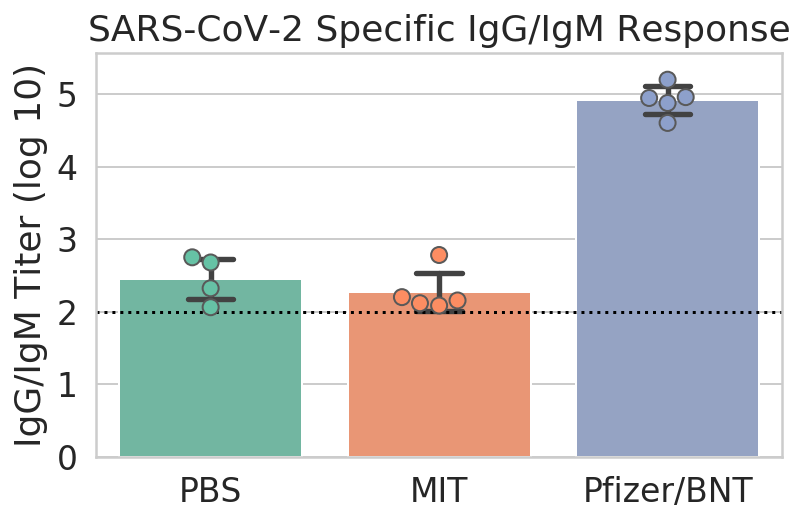

In [34]:
sns.set(font_scale=1.5, style='whitegrid')
ax1 = sns.barplot(
    data=igG_igM_titer_data,
    x='Vaccine',
    y='IgG Titer (log 10)',
    ci='sd',
    capsize=0.2,
    palette=sns.color_palette('Set2'),
)
ax2 = sns.swarmplot(
    data=igG_igM_titer_data,
    x='Vaccine',
    y='IgG Titer (log 10)',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2')[:3] * 2,
)
plt.axhline(y=2, linestyle='dotted', c='black', alpha=1.0, linewidth=1.5)  # Limit of detection (log10(100) = 2)
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('IgG/IgM Titer (log 10)')
ax2.set_title('SARS-CoV-2 Specific IgG/IgM Response')
plt.tight_layout()
plt.savefig('figures/IgGIgM_titer.pdf')
plt.show()

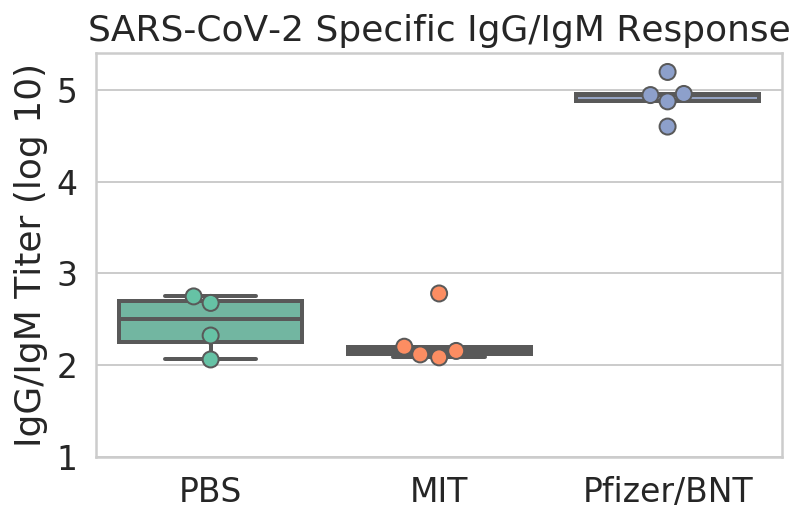

In [35]:
sns.set(font_scale=1.5, style='whitegrid')
ax1 = sns.boxplot(
    data=igG_igM_titer_data,
    x='Vaccine',
    y='IgG Titer (log 10)',
    linewidth=2,
    palette=sns.color_palette('Set2'),
)
ax2 = sns.swarmplot(
    data=igG_igM_titer_data,
    x='Vaccine',
    y='IgG Titer (log 10)',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
ax2.set_ylim([1, 5.4])
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylabel('IgG/IgM Titer (log 10)')
ax2.set_title('SARS-CoV-2 Specific IgG/IgM Response')
plt.tight_layout()
plt.show()

In [36]:
# Run one-way ANOVA of IgG/IgM Response

igG_titer_PBS = igG_igM_titer_data.loc[igG_igM_titer_data['Vaccine'] == 'PBS']['IgG Titer (log 10)'].values.tolist()
igG_titer_MIT = igG_igM_titer_data.loc[igG_igM_titer_data['Vaccine'] == 'MIT']['IgG Titer (log 10)'].values.tolist()
igG_titer_BNT = igG_igM_titer_data.loc[igG_igM_titer_data['Vaccine'] == 'Pfizer/BNT']['IgG Titer (log 10)'].values.tolist()
print('Data, PBS: ', igG_titer_PBS)
print('Data, MIT: ', igG_titer_MIT)
print('Data, Pfizer/BNT: ', igG_titer_BNT)
print()

print(f_oneway(igG_titer_PBS, igG_titer_MIT, igG_titer_BNT))

Data, PBS:  [2.748, 2.677, 2.06, 2.3209999999999997]
Data, MIT:  [2.115, 2.153, 2.78, 2.083, 2.199]
Data, Pfizer/BNT:  [4.957, 4.601, 5.197, 4.876, 4.945]

F_onewayResult(statistic=140.98322392966105, pvalue=1.445977045535319e-08)


In [37]:
# Run Tukey's test of Treg cell counts (as % of CD4 Cells).

tukey_result = pairwise_tukeyhsd(
    endog=igG_igM_titer_data['IgG Titer (log 10)'],
    groups=igG_igM_titer_data['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS   0.1855 0.5858 -0.3116 0.6826  False
   MIT Pfizer/BNT   2.6492  0.001  2.1805 3.1179   True
   PBS Pfizer/BNT   2.4637  0.001  1.9666 2.9608   True
-------------------------------------------------------


# qPCR (Total RNA)

In [47]:
raw_qpcr_total_rna_data = pd.read_csv('data/qPCR Total RNA.csv')
raw_qpcr_total_rna_data

,ID,Vaccine,Day,nCoV Avg Ct,18s rRNA Avg Ct,delta Ct,2^(-delta Ct)
0,D2 PBS-1,PBS,2,19.636438,25.724311,-6.087873,68.019320
1,D2 PBS-2,PBS,2,18.743258,22.965613,-4.222355,18.666183
2,D2 PBS-3,PBS,2,19.402820,23.831564,-4.428743,21.536969
3,D2 MIT-1,MIT,2,20.331365,24.690466,-4.359101,20.522023
4,D2 MIT-2,MIT,2,19.850133,24.996350,-5.146217,35.413246
5,D2 MIT-3,MIT,2,19.833767,24.540100,-4.706333,26.106421
6,D2 BNT-1,Pfizer/BNT,2,32.365703,26.115867,6.249837,0.013140
7,D2 BNT-2,Pfizer/BNT,2,34.708310,25.513537,9.194773,0.001706
8,D2 BNT-3,Pfizer/BNT,2,34.276991,25.898687,8.378304,0.003005
9,D7 PBS-1,PBS,7,24.702609,27.849554,-3.146945,8.857779


In [48]:
# Compute mean/standard deviation of each group.
raw_qpcr_total_rna_data.groupby(['Day', 'Vaccine']).agg(['count', 'mean', 'median', 'std'])

nCoV Avg Ct                                 18s rRNA Avg Ct  \
                     count       mean     median       std           count   
Day Vaccine                                                                  
2   MIT                  3  20.005088  19.850133  0.282682               3   
    PBS                  3  19.260839  19.402820  0.463208               3   
    Pfizer/BNT           3  33.783668  34.276991  1.246787               3   
7   MIT                  5  26.425855  26.451974  0.653225               5   
    PBS                  5  24.927527  24.862043  1.567514               5   
    Pfizer/BNT           5  34.744688  35.485926  2.183861               5   

                                               delta Ct                      \
                     mean     median       std    count      mean    median   
Day Vaccine                                                                   
2   MIT         24.742305  24.690466  0.232501        3 -4.737217 -4.706333   
    PBS         24.173829  23.831564  1.410838        3 -4.912990 -4.428743   
    Pfizer/BNT  25.842697  25.898687  0.305043        3  7.940971  8.378304   
7   MIT         28.411228  28.179605  1.153082        5 -1.985373 -2.059658   
    PBS         28.079536  27.932149  1.335229        5 -3.152009 -3.264448   
    Pfizer/BNT  30.449119  30.466591  1.710878        5  4.295568  3.593100   

                         2^(-delta Ct)                                   
                     std         count       mean     median        std  
Day Vaccine                                                              
2   MIT         0.394466             3  27.347230  26.106421   7.522755  
    PBS         1.022698             3  36.074157  21.536969  27.702535  
    Pfizer/BNT  1.520397             3   0.005951   0.003005   0.006260  
7   MIT         1.499686             5   5.769843   4.168874   4.839681  
    PBS         2.303846             5  17.033233   9.609410  16.523898  
    Pfizer/BNT  2.860023             5   0.139455   0.082865   0.157879

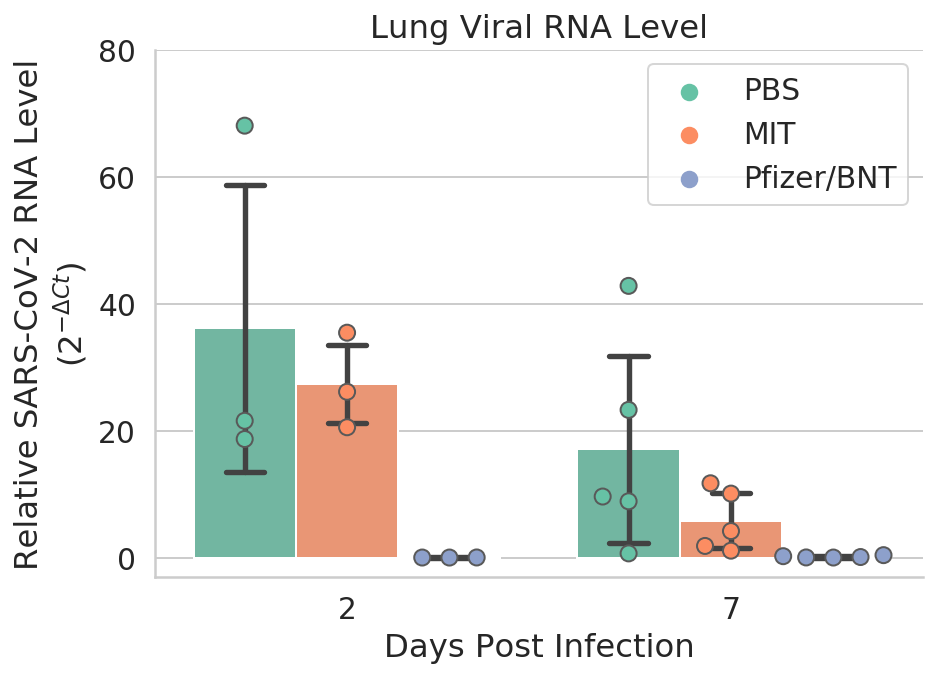

In [49]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.catplot(
    data=raw_qpcr_total_rna_data,
    x='Day',
    y='2^(-delta Ct)',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=raw_qpcr_total_rna_data,
    x='Day',
    y='2^(-delta Ct)',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([-3, 80])
ax2.set_xlabel('Days Post Infection')
ax2.set_ylabel('Relative SARS-CoV-2 RNA Level\n($2^{-\Delta Ct}$)')
ax2.set_title('Lung Viral RNA Level')
plt.tight_layout()
plt.savefig('figures/qpcr_total_rna.pdf')
plt.show()

In [50]:
# Run one-way ANOVA of qPCR total RNA (Day 2).

qpcr_total_rna_data_day2_PBS = raw_qpcr_total_rna_data.loc[
    (raw_qpcr_total_rna_data['Day'] == 2) & (raw_qpcr_total_rna_data['Vaccine'] == 'PBS')]['2^(-delta Ct)'].values.tolist()
qpcr_total_rna_data_day2_MIT = raw_qpcr_total_rna_data.loc[
    (raw_qpcr_total_rna_data['Day'] == 2) & (raw_qpcr_total_rna_data['Vaccine'] == 'MIT')]['2^(-delta Ct)'].values.tolist()
qpcr_total_rna_data_day2_BNT = raw_qpcr_total_rna_data.loc[
    (raw_qpcr_total_rna_data['Day'] == 2) & (raw_qpcr_total_rna_data['Vaccine'] == 'Pfizer/BNT')]['2^(-delta Ct)'].values.tolist()
print('Day 2, PBS: ', qpcr_total_rna_data_day2_PBS)
print('Day 2, MIT: ', qpcr_total_rna_data_day2_MIT)
print('Day 2, Pfizer/BNT: ', qpcr_total_rna_data_day2_BNT)
print()

print(f_oneway(qpcr_total_rna_data_day2_PBS, qpcr_total_rna_data_day2_MIT, qpcr_total_rna_data_day2_BNT))

Day 2, PBS:  [68.01932021, 18.66618342, 21.5369686]
Day 2, MIT:  [20.52202252, 35.41324591, 26.10642137]
Day 2, Pfizer/BNT:  [0.013140495, 0.001706466, 0.00300524]

F_onewayResult(statistic=3.867529460424169, pvalue=0.08336085699104206)


In [51]:
# Run Tukey's test to identify which groups had a significant difference (Day 2).

qpcr_total_rna_data_day2 = raw_qpcr_total_rna_data.loc[raw_qpcr_total_rna_data['Day'] == 2]
print(len(qpcr_total_rna_data_day2))
print()

tukey_result = pairwise_tukeyhsd(
    endog=qpcr_total_rna_data_day2['2^(-delta Ct)'],
    groups=qpcr_total_rna_data_day2['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

9

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   MIT        PBS   8.7269 0.7885 -32.7447 50.1985  False
   MIT Pfizer/BNT -27.3413 0.1876 -68.8129 14.1303  False
   PBS Pfizer/BNT -36.0682 0.0824 -77.5398  5.4034  False
---------------------------------------------------------


In [52]:
# Run one-way ANOVA of qPCR total RNA (Day 7).

qpcr_total_rna_data_day7_PBS = raw_qpcr_total_rna_data.loc[
    (raw_qpcr_total_rna_data['Day'] == 7) & (raw_qpcr_total_rna_data['Vaccine'] == 'PBS')]['2^(-delta Ct)'].values.tolist()
qpcr_total_rna_data_day7_MIT = raw_qpcr_total_rna_data.loc[
    (raw_qpcr_total_rna_data['Day'] == 7) & (raw_qpcr_total_rna_data['Vaccine'] == 'MIT')]['2^(-delta Ct)'].values.tolist()
qpcr_total_rna_data_day7_BNT = raw_qpcr_total_rna_data.loc[
    (raw_qpcr_total_rna_data['Day'] == 7) & (raw_qpcr_total_rna_data['Vaccine'] == 'Pfizer/BNT')]['2^(-delta Ct)'].values.tolist()
print('Day 7, PBS: ', qpcr_total_rna_data_day7_PBS)
print('Day 7, MIT: ', qpcr_total_rna_data_day7_MIT)
print('Day 7, Pfizer/BNT: ', qpcr_total_rna_data_day7_BNT)
print()

print(f_oneway(qpcr_total_rna_data_day7_PBS, qpcr_total_rna_data_day7_MIT, qpcr_total_rna_data_day7_BNT))

Day 7, PBS:  [8.857778988, 23.25742891, 42.78637175, 0.655174493, 9.609409793]
Day 7, MIT:  [1.827468927, 1.0845589740000001, 11.69666996, 10.07164277, 4.168873822]
Day 7, Pfizer/BNT:  [0.37876694, 0.215155703, 0.002879803, 0.017606333999999998, 0.082864599]

F_onewayResult(statistic=3.7435495567947674, pvalue=0.054526084478925256)


In [53]:
# Run Tukey's test to identify which groups had a significant difference (Day 7).

qpcr_total_rna_data_day7 = raw_qpcr_total_rna_data.loc[raw_qpcr_total_rna_data['Day'] == 7]
print(len(qpcr_total_rna_data_day7))
print()

tukey_result = pairwise_tukeyhsd(
    endog=qpcr_total_rna_data_day7['2^(-delta Ct)'],
    groups=qpcr_total_rna_data_day7['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

15

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   MIT        PBS  11.2634 0.2137  -5.5023 28.0291  False
   MIT Pfizer/BNT  -5.6304 0.6473 -22.3961 11.1353  False
   PBS Pfizer/BNT -16.8938 0.0482 -33.6595 -0.1281   True
---------------------------------------------------------


# qPCR (Subgenomic RNA)

In [40]:
raw_qpcr_subgenomic_rna_data = pd.read_csv('data/qPCR Subgenomic RNA.csv')
raw_qpcr_subgenomic_rna_data

,ID,Vaccine,Day,sgL CoV Avg Ct,18s rRNA Avg Ct,delta Ct,2^(-delta Ct)
0,D2 PBS-1,PBS,2,27.674863,25.724311,1.950552,0.258717
1,D2 PBS-2,PBS,2,27.214850,22.965613,4.249237,0.052584
2,D2 PBS-3,PBS,2,27.278597,23.831564,3.447033,0.091694
3,D2 MIT-1,MIT,2,28.566130,24.690466,3.875663,0.068125
4,D2 MIT-2,MIT,2,28.103673,24.996350,3.107322,0.116039
5,D2 MIT-3,MIT,2,27.935862,24.540100,3.395762,0.095011
6,D2 BNT-1,Pfizer/BNT,2,41.375291,26.115867,15.259424,0.000025
7,D2 BNT-2,Pfizer/BNT,2,39.326963,25.513537,13.813426,0.000069
8,D2 BNT-3,Pfizer/BNT,2,39.957209,25.898687,14.058522,0.000059
9,D7 PBS-1,PBS,7,35.613861,27.849554,7.764307,0.004599


In [41]:
# Compute mean/standard deviation of each group.
raw_qpcr_subgenomic_rna_data.groupby(['Day', 'Vaccine']).agg(['count', 'mean', 'median', 'std'])

sgL CoV Avg Ct                                 18s rRNA Avg Ct  \
                        count       mean     median       std           count   
Day Vaccine                                                                     
2   MIT                     3  28.201888  28.103673  0.326411               3   
    PBS                     3  27.389437  27.278597  0.249233               3   
    Pfizer/BNT              3  40.219821  39.957209  1.049112               3   
7   MIT                     5  36.812504  36.511680  0.846523               5   
    PBS                     5  35.691187  35.932190  1.680961               5   
    Pfizer/BNT              5  36.985093  37.490239  1.142818               5   

                                               delta Ct                        \
                     mean     median       std    count       mean     median   
Day Vaccine                                                                     
2   MIT         24.742305  24.690466  0.232501        3   3.459583   3.395762   
    PBS         24.173829  23.831564  1.410838        3   3.215608   3.447033   
    Pfizer/BNT  25.842697  25.898687  0.305043        3  14.377124  14.058522   
7   MIT         28.411228  28.179605  1.153082        5   8.401276   8.332076   
    PBS         28.079536  27.932149  1.335229        5   7.611651   7.571878   
    Pfizer/BNT  30.449119  30.466591  1.710878        5   6.535973   5.762491   

                         2^(-delta Ct)                                
                     std         count      mean    median       std  
Day Vaccine                                                           
2   MIT         0.388126             3  0.093058  0.095011  0.024016  
    PBS         1.166686             3  0.134332  0.091694  0.109482  
    Pfizer/BNT  0.773859             3  0.000051  0.000059  0.000023  
7   MIT         1.487803             5  0.004166  0.003103  0.003234  
    PBS         2.292406             5  0.010536  0.005256  0.012334  
    Pfizer/BNT  1.918470             5  0.016272  0.018421  0.010105

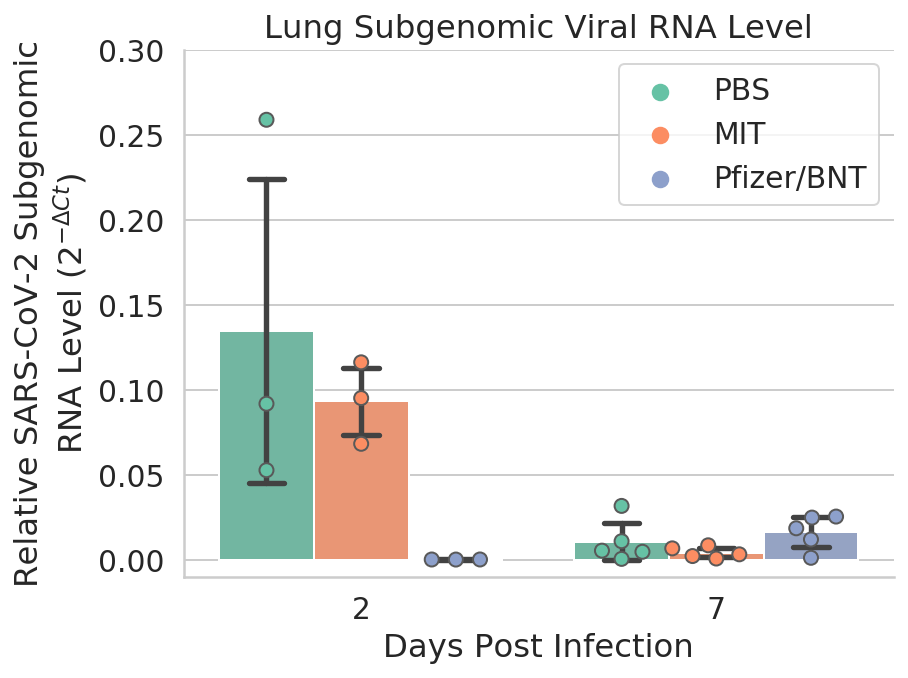

In [42]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.catplot(
    data=raw_qpcr_subgenomic_rna_data,
    x='Day',
    y='2^(-delta Ct)',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=raw_qpcr_subgenomic_rna_data,
    x='Day',
    y='2^(-delta Ct)',
    hue='Vaccine',
    dodge=True,
    size=7,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([-.01, 0.3])
ax2.set_xlabel('Days Post Infection')
ax2.set_ylabel('Relative SARS-CoV-2 Subgenomic\nRNA Level ($2^{-\Delta Ct}$)')
ax2.set_title('Lung Subgenomic Viral RNA Level')
plt.tight_layout()
plt.savefig('figures/qpcr_subgenomic_rna.pdf')
plt.show()

In [43]:
# Run one-way ANOVA of qPCR subgenomic RNA (Day 2).

qpcr_subgenomic_rna_data_day2_PBS = raw_qpcr_subgenomic_rna_data.loc[
    (raw_qpcr_subgenomic_rna_data['Day'] == 2) & (raw_qpcr_subgenomic_rna_data['Vaccine'] == 'PBS')]['2^(-delta Ct)'].values.tolist()
qpcr_subgenomic_rna_data_day2_MIT = raw_qpcr_subgenomic_rna_data.loc[
    (raw_qpcr_subgenomic_rna_data['Day'] == 2) & (raw_qpcr_subgenomic_rna_data['Vaccine'] == 'MIT')]['2^(-delta Ct)'].values.tolist()
qpcr_subgenomic_rna_data_day2_BNT = raw_qpcr_subgenomic_rna_data.loc[
    (raw_qpcr_subgenomic_rna_data['Day'] == 2) & (raw_qpcr_subgenomic_rna_data['Vaccine'] == 'Pfizer/BNT')]['2^(-delta Ct)'].values.tolist()
print('Day 2, PBS: ', qpcr_subgenomic_rna_data_day2_PBS)
print('Day 2, MIT: ', qpcr_subgenomic_rna_data_day2_MIT)
print('Day 2, Pfizer/BNT: ', qpcr_subgenomic_rna_data_day2_BNT)
print()

print(f_oneway(qpcr_subgenomic_rna_data_day2_PBS, qpcr_subgenomic_rna_data_day2_MIT, qpcr_subgenomic_rna_data_day2_BNT))

Day 2, PBS:  [0.258717166, 0.052583820999999996, 0.091693723]
Day 2, MIT:  [0.06812539599999999, 0.116038685, 0.09501095300000001]
Day 2, Pfizer/BNT:  [2.5495e-05, 6.94615e-05, 5.86089e-05]

F_onewayResult(statistic=3.3891200378603714, pvalue=0.10352389918311349)


In [44]:
# Run Tukey's test to identify which groups had a significant difference (Day 2).

qpcr_subgenomic_rna_data_day2 = raw_qpcr_subgenomic_rna_data.loc[raw_qpcr_subgenomic_rna_data['Day'] == 2]
print(len(qpcr_subgenomic_rna_data_day2))
print()

tukey_result = pairwise_tukeyhsd(
    endog=qpcr_subgenomic_rna_data_day2['2^(-delta Ct)'],
    groups=qpcr_subgenomic_rna_data_day2['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

9

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS   0.0413 0.7167 -0.1207 0.2032  False
   MIT Pfizer/BNT   -0.093 0.2598 -0.2549 0.0689  False
   PBS Pfizer/BNT  -0.1343 0.0965 -0.2962 0.0276  False
-------------------------------------------------------


In [45]:
# Run one-way ANOVA of qPCR subgenomic RNA (Day 7).

qpcr_subgenomic_rna_data_day7_PBS = raw_qpcr_subgenomic_rna_data.loc[
    (raw_qpcr_subgenomic_rna_data['Day'] == 7) & (raw_qpcr_subgenomic_rna_data['Vaccine'] == 'PBS')]['2^(-delta Ct)'].values.tolist()
qpcr_subgenomic_rna_data_day7_MIT = raw_qpcr_subgenomic_rna_data.loc[
    (raw_qpcr_subgenomic_rna_data['Day'] == 7) & (raw_qpcr_subgenomic_rna_data['Vaccine'] == 'MIT')]['2^(-delta Ct)'].values.tolist()
qpcr_subgenomic_rna_data_day7_BNT = raw_qpcr_subgenomic_rna_data.loc[
    (raw_qpcr_subgenomic_rna_data['Day'] == 7) & (raw_qpcr_subgenomic_rna_data['Vaccine'] == 'Pfizer/BNT')]['2^(-delta Ct)'].values.tolist()
print('Day 7, PBS: ', qpcr_subgenomic_rna_data_day7_PBS)
print('Day 7, MIT: ', qpcr_subgenomic_rna_data_day7_MIT)
print('Day 7, Pfizer/BNT: ', qpcr_subgenomic_rna_data_day7_BNT)
print()

print(f_oneway(qpcr_subgenomic_rna_data_day7_PBS, qpcr_subgenomic_rna_data_day7_MIT, qpcr_subgenomic_rna_data_day7_BNT))

Day 7, PBS:  [0.004599499, 0.010817216000000001, 0.031584064, 0.00042305, 0.005255784]
Day 7, MIT:  [0.002089655, 0.000629136, 0.008401097, 0.00660495, 0.0031030959999999996]
Day 7, Pfizer/BNT:  [0.024710674, 0.025313797000000002, 0.001064436, 0.011849535, 0.018421172]

F_onewayResult(statistic=2.078374758241871, pvalue=0.16786630235187402)


In [46]:
# Run Tukey's test to identify which groups had a significant difference (Day 7).

qpcr_subgenomic_rna_data_day7 = raw_qpcr_subgenomic_rna_data.loc[raw_qpcr_subgenomic_rna_data['Day'] == 7]
print(len(qpcr_subgenomic_rna_data_day7))
print()

tukey_result = pairwise_tukeyhsd(
    endog=qpcr_subgenomic_rna_data_day7['2^(-delta Ct)'],
    groups=qpcr_subgenomic_rna_data_day7['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

15

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS   0.0064  0.548 -0.0095 0.0222  False
   MIT Pfizer/BNT   0.0121 0.1452 -0.0037 0.0279  False
   PBS Pfizer/BNT   0.0057  0.608 -0.0101 0.0216  False
-------------------------------------------------------


# Lung IHC Cell Counting (CD8+)

Analyze output of running CellProfiler

In [96]:
# Load data from CellProfiler output (this is the Image.csv file).
lung_ihc_cellcount_data_all = pd.read_csv('data/lung_IHC_cellprofiler/Image_CD8_091222.csv')

lung_ihc_cellcount_data = lung_ihc_cellcount_data_all[['Count_CD4CD8Cells', 'Count_Nuclei']]
lung_ihc_cellcount_data = lung_ihc_cellcount_data.astype(int)

# Compute fraction of total cells that are CD4/CD8.
lung_ihc_cellcount_data['CD4CD8_Percentage'] = (
    lung_ihc_cellcount_data['Count_CD4CD8Cells'] / lung_ihc_cellcount_data['Count_Nuclei']) * 100.

lung_ihc_cellcount_data['FileName'] = lung_ihc_cellcount_data_all['FileName_Lung'].apply(lambda x: x.replace('.tif', ''))
lung_ihc_cellcount_data['Vaccine'] = lung_ihc_cellcount_data['FileName'].apply(lambda x: x[:3])
lung_ihc_cellcount_data['Vaccine'] = lung_ihc_cellcount_data['Vaccine'].replace('BNT', 'Pfizer/BNT')

lung_ihc_cellcount_data.set_index(['Vaccine', 'FileName']).round(decimals=3)

Count_CD4CD8Cells  Count_Nuclei  CD4CD8_Percentage
Vaccine    FileName                                                          
Pfizer/BNT BNT CD8 Image1                 51          1239              4.116
           BNT CD8 Image2                 42           972              4.321
           BNT CD8 Image3                 44          1008              4.365
           BNT CD8 Image4                 50          1050              4.762
           BNT CD8 Image5                 50           842              5.938
MIT        MIT CD8 Image1                222           985             22.538
           MIT CD8 Image2                343          1174             29.216
           MIT CD8 Image3                328          1188             27.609
           MIT CD8 Image4                356          1356             26.254
           MIT CD8 Image5                245          1030             23.786
PBS        PBS CD8 Image1                158          1226             12.887
           PBS CD8 Image2                 65          1052              6.179
           PBS CD8 Image3                 89          1056              8.428
           PBS CD8 Image4                 77          1081              7.123
           PBS CD8 Image5                 95           978              9.714

In [89]:
# Compute mean/standard deviation of each group.
lung_ihc_cellcount_data.groupby(['Vaccine']).agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(decimals=3)

Count_CD4CD8Cells                                 Count_Nuclei  \
                       count   mean median     std  min  max        count   
Vaccine                                                                     
MIT                        5  298.8    328  60.973  222  356            5   
PBS                        5   96.8     89  36.100   65  158            5   
Pfizer/BNT                 5   47.4     50   4.099   42   51            5   

                                              CD4CD8_Percentage          \
              mean median      std  min   max             count    mean   
Vaccine                                                                   
MIT         1146.6   1174  146.649  985  1356                 5  25.881   
PBS         1078.6   1056   90.927  978  1226                 5   8.866   
Pfizer/BNT  1022.2   1008  144.022  842  1239                 5   4.700   

                                           
            median    std     min     max  
Vaccine                                    
MIT         26.254  2.730  22.538  29.216  
PBS          8.428  2.614   6.179  12.887  
Pfizer/BNT   4.365  0.730   4.116   5.938

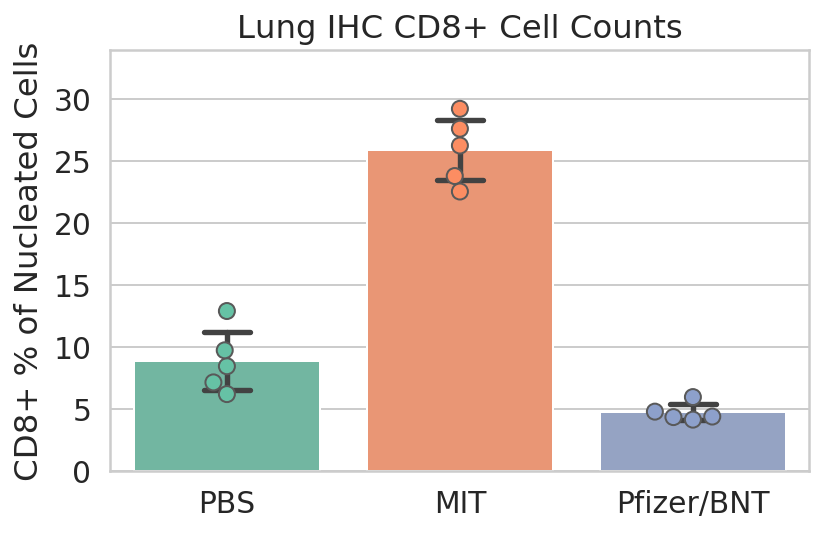

In [131]:
# CD8 cell counts as percentage of total cells
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.barplot(
    data=lung_ihc_cellcount_data,
    x='Vaccine',
    y='CD4CD8_Percentage',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    ci='sd',
    capsize=0.2,
    palette=sns.color_palette('Set2'),
)
ax2 = sns.swarmplot(
    data=lung_ihc_cellcount_data,
    x='Vaccine',
    y='CD4CD8_Percentage',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.set_xlabel(None)
ax2.set_ylim([0, 34])
ax2.set_ylabel('CD8+ % of Nucleated Cells')
ax2.set_title('Lung IHC CD8+ Cell Counts')
plt.tight_layout()
plt.savefig('figures/lung_IHC_cell_counts_percentage_CD8.pdf')
plt.show()

In [90]:
# Run one-way ANOVA of Lung IHC T cell counts (absolute cell counts).

lung_ihc_counts_PBS = lung_ihc_cellcount_data.loc[lung_ihc_cellcount_data['Vaccine'] == 'PBS']['Count_CD4CD8Cells'].values.tolist()
lung_ihc_counts_MIT = lung_ihc_cellcount_data.loc[lung_ihc_cellcount_data['Vaccine'] == 'MIT']['Count_CD4CD8Cells'].values.tolist()
lung_ihc_counts_BNT = lung_ihc_cellcount_data.loc[lung_ihc_cellcount_data['Vaccine'] == 'Pfizer/BNT']['Count_CD4CD8Cells'].values.tolist()
print('Data, PBS: ', lung_ihc_counts_PBS)
print('Data, MIT: ', lung_ihc_counts_MIT)
print('Data, Pfizer/BNT: ', lung_ihc_counts_BNT)
print()

print(f_oneway(lung_ihc_counts_PBS, lung_ihc_counts_MIT, lung_ihc_counts_BNT))

Data, PBS:  [158, 65, 89, 77, 95]
Data, MIT:  [222, 343, 328, 356, 245]
Data, Pfizer/BNT:  [51, 42, 44, 50, 50]

F_onewayResult(statistic=52.82486055144208, pvalue=1.1260095252669588e-06)


In [91]:
# Run Tukey's test of Lung IHC T cell counts (absolute cell counts).

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_cellcount_data['Count_CD4CD8Cells'],
    groups=lung_ihc_cellcount_data['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1   group2   meandiff p-adj    lower     upper   reject
------------------------------------------------------------
   MIT        PBS   -202.0  0.001 -271.1091 -132.8909   True
   MIT Pfizer/BNT   -251.4  0.001 -320.5091 -182.2909   True
   PBS Pfizer/BNT    -49.4 0.1791 -118.5091   19.7091  False
------------------------------------------------------------


In [92]:
# Run one-way ANOVA of Lung IHC T cell counts (as % of cells).

lung_ihc_counts_PBS = lung_ihc_cellcount_data.loc[lung_ihc_cellcount_data['Vaccine'] == 'PBS']['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_MIT = lung_ihc_cellcount_data.loc[lung_ihc_cellcount_data['Vaccine'] == 'MIT']['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_BNT = lung_ihc_cellcount_data.loc[lung_ihc_cellcount_data['Vaccine'] == 'Pfizer/BNT']['CD4CD8_Percentage'].values.tolist()
print('Data, PBS: ', lung_ihc_counts_PBS)
print('Data, MIT: ', lung_ihc_counts_MIT)
print('Data, Pfizer/BNT: ', lung_ihc_counts_BNT)
print()

print(f_oneway(lung_ihc_counts_PBS, lung_ihc_counts_MIT, lung_ihc_counts_BNT))

Data, PBS:  [12.887438825448614, 6.178707224334601, 8.428030303030303, 7.123034227567067, 9.713701431492842]
Data, MIT:  [22.538071065989847, 29.216354344122657, 27.609427609427613, 26.253687315634217, 23.78640776699029]
Data, Pfizer/BNT:  [4.116222760290557, 4.320987654320987, 4.365079365079365, 4.761904761904762, 5.938242280285035]

F_onewayResult(statistic=127.41912363600112, pvalue=8.27178047853236e-09)


In [93]:
# Run Tukey's test of Lung IHC T cell counts (as % of cells).

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_cellcount_data['CD4CD8_Percentage'],
    groups=lung_ihc_cellcount_data['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------
   MIT        PBS -17.0146  0.001 -20.7633 -13.2659   True
   MIT Pfizer/BNT -21.1803  0.001  -24.929 -17.4316   True
   PBS Pfizer/BNT  -4.1657 0.0295  -7.9144   -0.417   True
----------------------------------------------------------


# Lung IHC Cell Counting (CD4+)

Analyze output of running CellProfiler

In [98]:
# Load data from CellProfiler output.
lung_ihc_CD4_cellcount_data_all = pd.read_csv('data/lung_IHC_cellprofiler/Image_CD4_091322.csv')

lung_ihc_CD4_cellcount_data = lung_ihc_CD4_cellcount_data_all[['Count_CD4CD8Cells', 'Count_Nuclei']]
lung_ihc_CD4_cellcount_data = lung_ihc_CD4_cellcount_data.astype(int)

# Compute fraction of total cells that are CD4/CD8.
lung_ihc_CD4_cellcount_data['CD4CD8_Percentage'] = (
    lung_ihc_CD4_cellcount_data['Count_CD4CD8Cells'] / lung_ihc_CD4_cellcount_data['Count_Nuclei']) * 100.

lung_ihc_CD4_cellcount_data['FileName'] = lung_ihc_CD4_cellcount_data_all['FileName_Lung'].apply(lambda x: x.replace('.tif', ''))
lung_ihc_CD4_cellcount_data['Vaccine'] = lung_ihc_CD4_cellcount_data['FileName'].apply(lambda x: x[:3])
lung_ihc_CD4_cellcount_data['Vaccine'] = lung_ihc_CD4_cellcount_data['Vaccine'].replace('BNT', 'Pfizer/BNT')

lung_ihc_CD4_cellcount_data.set_index(['Vaccine', 'FileName']).round(decimals=3)

Count_CD4CD8Cells  Count_Nuclei  CD4CD8_Percentage
Vaccine    FileName                                                          
Pfizer/BNT BNT CD4 Image2                 28           937              2.988
           BNT CD4 Image3                 51          1075              4.744
           BNT CD4 Image4                 59          1163              5.073
           BNT CD4 Image5                127          1058             12.004
MIT        MIT CD4 Image1                 21           957              2.194
           MIT CD4 Image2                 17          1045              1.627
           MIT CD4 Image3                 19           989              1.921
           MIT CD4 Image4                 30          1063              2.822
           MIT CD4 Image5                 13           940              1.383
PBS        PBS CD4 Image1                 57          1035              5.507
           PBS CD4 Image2                 49           917              5.344
           PBS CD4 Image3                  5           839              0.596
           PBS CD4 Image4                 17           894              1.902
           PBS CD4 Image5                 33          1062              3.107

In [99]:
# Compute mean/standard deviation of each group.
lung_ihc_CD4_cellcount_data.groupby(['Vaccine']).agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(decimals=3)

Count_CD4CD8Cells                                Count_Nuclei  \
                       count   mean median     std min  max        count   
Vaccine                                                                    
MIT                        5  20.00     19   6.325  13   30            5   
PBS                        5  32.20     33  21.615   5   57            5   
Pfizer/BNT                 4  66.25     55  42.578  28  127            4   

                                               CD4CD8_Percentage         \
               mean  median     std  min   max             count   mean   
Vaccine                                                                   
MIT          998.80   989.0  53.751  940  1063                 5  1.989   
PBS          949.40   917.0  95.280  839  1062                 5  3.291   
Pfizer/BNT  1058.25  1066.5  93.014  937  1163                 4  6.202   

                                         
           median    std    min     max  
Vaccine                                  
MIT         1.921  0.557  1.383   2.822  
PBS         3.107  2.142  0.596   5.507  
Pfizer/BNT  4.909  3.974  2.988  12.004

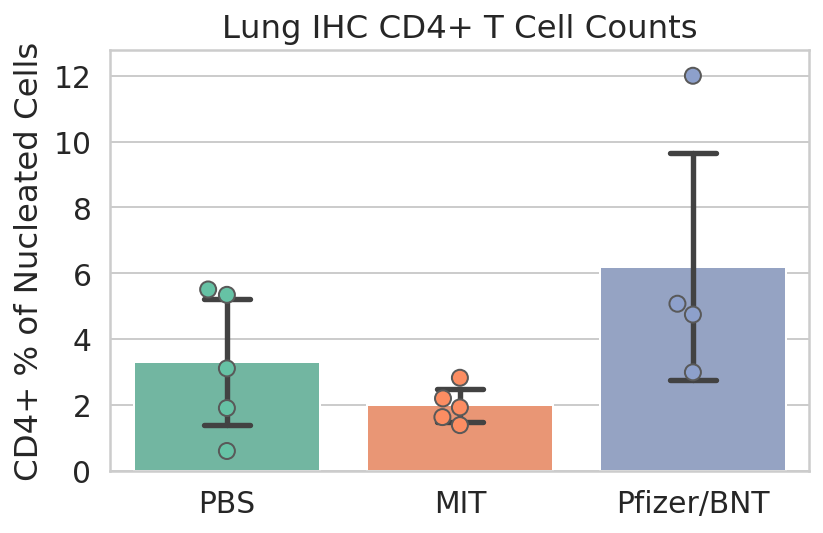

In [133]:
# CD8 cell counts as percentage of total cells
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.barplot(
    data=lung_ihc_CD4_cellcount_data,
    x='Vaccine',
    y='CD4CD8_Percentage',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    ci='sd',
    capsize=0.2,
    palette=sns.color_palette('Set2'),
)
ax2 = sns.swarmplot(
    data=lung_ihc_CD4_cellcount_data,
    x='Vaccine',
    y='CD4CD8_Percentage',
    order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.set_xlabel(None)
ax2.set_ylabel('CD4+ % of Nucleated Cells')
ax2.set_title('Lung IHC CD4+ T Cell Counts')
plt.tight_layout()
plt.savefig('figures/lung_IHC_cell_counts_percentage_CD4.pdf')
plt.show()

In [134]:
# Run one-way ANOVA of Lung IHC T cell counts (absolute cell counts).

lung_ihc_counts_PBS = lung_ihc_CD4_cellcount_data.loc[lung_ihc_CD4_cellcount_data['Vaccine'] == 'PBS']['Count_CD4CD8Cells'].values.tolist()
lung_ihc_counts_MIT = lung_ihc_CD4_cellcount_data.loc[lung_ihc_CD4_cellcount_data['Vaccine'] == 'MIT']['Count_CD4CD8Cells'].values.tolist()
lung_ihc_counts_BNT = lung_ihc_CD4_cellcount_data.loc[lung_ihc_CD4_cellcount_data['Vaccine'] == 'Pfizer/BNT']['Count_CD4CD8Cells'].values.tolist()
print('Data, PBS: ', lung_ihc_counts_PBS)
print('Data, MIT: ', lung_ihc_counts_MIT)
print('Data, Pfizer/BNT: ', lung_ihc_counts_BNT)
print()

print(f_oneway(lung_ihc_counts_PBS, lung_ihc_counts_MIT, lung_ihc_counts_BNT))

Data, PBS:  [57, 49, 5, 17, 33]
Data, MIT:  [21, 17, 19, 30, 13]
Data, Pfizer/BNT:  [28, 51, 59, 127]

F_onewayResult(statistic=3.6663071747570672, pvalue=0.06024563054369424)


In [103]:
# Run Tukey's test of Lung IHC T cell counts (absolute cell counts).

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_CD4_cellcount_data['Count_CD4CD8Cells'],
    groups=lung_ihc_CD4_cellcount_data['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   MIT        PBS     12.2 0.7351 -32.2817 56.6817  False
   MIT Pfizer/BNT    46.25 0.0547  -0.9299 93.4299  False
   PBS Pfizer/BNT    34.05 0.1713 -13.1299 81.2299  False
---------------------------------------------------------


In [104]:
# Run one-way ANOVA of Lung IHC T cell counts (as % of cells).

lung_ihc_counts_PBS = lung_ihc_CD4_cellcount_data.loc[lung_ihc_CD4_cellcount_data['Vaccine'] == 'PBS']['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_MIT = lung_ihc_CD4_cellcount_data.loc[lung_ihc_CD4_cellcount_data['Vaccine'] == 'MIT']['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_BNT = lung_ihc_CD4_cellcount_data.loc[lung_ihc_CD4_cellcount_data['Vaccine'] == 'Pfizer/BNT']['CD4CD8_Percentage'].values.tolist()
print('Data, PBS: ', lung_ihc_counts_PBS)
print('Data, MIT: ', lung_ihc_counts_MIT)
print('Data, Pfizer/BNT: ', lung_ihc_counts_BNT)
print()

print(f_oneway(lung_ihc_counts_PBS, lung_ihc_counts_MIT, lung_ihc_counts_BNT))

Data, PBS:  [5.507246376811594, 5.343511450381679, 0.5959475566150179, 1.901565995525727, 3.1073446327683616]
Data, MIT:  [2.19435736677116, 1.6267942583732056, 1.9211324570273005, 2.8222013170272815, 1.3829787234042552]
Data, Pfizer/BNT:  [2.9882604055496262, 4.744186046511628, 5.073086844368014, 12.003780718336483]

F_onewayResult(statistic=3.3245515248306474, pvalue=0.07424808460820867)


In [105]:
# Run Tukey's test of Lung IHC T cell counts (as % of cells).

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_CD4_cellcount_data['CD4CD8_Percentage'],
    groups=lung_ihc_CD4_cellcount_data['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS   1.3016 0.6827 -2.9111 5.5144  False
   MIT Pfizer/BNT   4.2128  0.065 -0.2554 8.6811  False
   PBS Pfizer/BNT   2.9112  0.228 -1.5571 7.3795  False
-------------------------------------------------------


# Lung IHC Cell Counting (CD8+/CD4+ Side by Side Images) - 7 DPI only

Analyze output of running CellProfiler

In [186]:
# Load data from CellProfiler output (this is the Image.csv file).
lung_ihc_cellcount_data_cd4cd8side_all = pd.read_csv('data/lung_IHC_cellprofiler/Image_CD4CD8_091922.csv')
#print(lung_ihc_cellcount_data_all.columns)

lung_ihc_cellcount_data_cd4cd8side = lung_ihc_cellcount_data_cd4cd8side_all[['Count_CD4CD8Cells', 'Count_Nuclei']]
lung_ihc_cellcount_data_cd4cd8side = lung_ihc_cellcount_data_cd4cd8side.astype(int)

# Compute fraction of total cells that are CD4/CD8.
lung_ihc_cellcount_data_cd4cd8side['CD4CD8_Percentage'] = (
    lung_ihc_cellcount_data_cd4cd8side['Count_CD4CD8Cells'] / lung_ihc_cellcount_data_cd4cd8side['Count_Nuclei']) * 100.

lung_ihc_cellcount_data_cd4cd8side['DPI'] = 7

lung_ihc_cellcount_data_cd4cd8side['FileName'] = lung_ihc_cellcount_data_cd4cd8side_all['FileName_Lung'].apply(lambda x: x.replace('.tif', ''))
lung_ihc_cellcount_data_cd4cd8side['Vaccine'] = lung_ihc_cellcount_data_cd4cd8side['FileName'].apply(lambda x: x[:3])
lung_ihc_cellcount_data_cd4cd8side['Vaccine'] = lung_ihc_cellcount_data_cd4cd8side['Vaccine'].replace('BNT', 'Pfizer/BNT')
lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] = lung_ihc_cellcount_data_cd4cd8side['FileName'].apply(lambda x: 'CD4+' if 'CD4' in x else 'CD8+')

lung_ihc_cellcount_data_cd4cd8side.set_index(['Vaccine', 'CD4/CD8', 'FileName']).round(decimals=3)

Count_CD4CD8Cells  Count_Nuclei  \
Vaccine    CD4/CD8 FileName                                            
Pfizer/BNT CD4+    BNT CD4 lung 1-2                110          1089   
                   BNT CD4 lung 1-3                 63          1153   
                   BNT CD4 lung 1                   21          1119   
                   BNT CD4 lung 2                    3          1036   
                   BNT CD4 lung 3                   81          1043   
           CD8+    BNT CD8 lung 1-2                 63          1026   
                   BNT CD8 lung 1-3                 32          1236   
                   BNT CD8 lung 1                   23          1093   
                   BNT CD8 lung 2                   42          1108   
                   BNT CD8 lung 3                   69           969   
MIT        CD4+    MIT CD4 lung 1-2                 78          1209   
                   MIT CD4 lung 1                  139          1424   
                   MIT CD4 lung 2-2                 17          1052   
                   MIT CD4 lung 2                  152          1446   
           CD8+    MIT CD8 lung 1-2                293          1226   
                   MIT CD8 lung 1                  383          1379   
                   MIT CD8 lung 2-2                191          1149   
                   MIT CD8 lung 2                  424          1539   
PBS        CD4+    PBS CD4 lung 1                    9           892   
                   PBS CD4 lung 2-2                  5           937   
                   PBS CD4 lung 2                    2           813   
                   PBS CD4 lung 4                    0           981   
                   PBS CD4 lung 5                    2           814   
           CD8+    PBS CD8 lung 1                  108           912   
                   PBS CD8 lung 2-2                 34           869   
                   PBS CD8 lung 2                   27           958   
                   PBS CD8 lung 4                  148          1111   
                   PBS CD8 lung 5                   40           847   

                                     CD4CD8_Percentage  DPI  
Vaccine    CD4/CD8 FileName                                  
Pfizer/BNT CD4+    BNT CD4 lung 1-2             10.101    7  
                   BNT CD4 lung 1-3              5.464    7  
                   BNT CD4 lung 1                1.877    7  
                   BNT CD4 lung 2                0.290    7  
                   BNT CD4 lung 3                7.766    7  
           CD8+    BNT CD8 lung 1-2              6.140    7  
                   BNT CD8 lung 1-3              2.589    7  
                   BNT CD8 lung 1                2.104    7  
                   BNT CD8 lung 2                3.791    7  
                   BNT CD8 lung 3                7.121    7  
MIT        CD4+    MIT CD4 lung 1-2              6.452    7  
                   MIT CD4 lung 1                9.761    7  
                   MIT CD4 lung 2-2              1.616    7  
                   MIT CD4 lung 2               10.512    7  
           CD8+    MIT CD8 lung 1-2             23.899    7  
                   MIT CD8 lung 1               27.774    7  
                   MIT CD8 lung 2-2             16.623    7  
                   MIT CD8 lung 2               27.550    7  
PBS        CD4+    PBS CD4 lung 1                1.009    7  
                   PBS CD4 lung 2-2              0.534    7  
                   PBS CD4 lung 2                0.246    7  
                   PBS CD4 lung 4                0.000    7  
                   PBS CD4 lung 5                0.246    7  
           CD8+    PBS CD8 lung 1               11.842    7  
                   PBS CD8 lung 2-2              3.913    7  
                   PBS CD8 lung 2                2.818    7  
                   PBS CD8 lung 4               13.321    7  
                   PBS CD8 lung 5                4.723    7

In [185]:
# Compute mean/standard deviation of each group.
lung_ihc_cellcount_data_cd4cd8side.groupby(['CD4/CD8', 'DPI', 'Vaccine']).agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']).round(decimals=3)

Count_CD4CD8Cells                                    \
                                   count    mean median      std  min  max   
CD4/CD8 DPI Vaccine                                                          
CD4+    7   MIT                        4   96.50  108.5   62.046   17  152   
            PBS                        5    3.60    2.0    3.507    0    9   
            Pfizer/BNT                 5   55.60   63.0   43.655    3  110   
CD8+    7   MIT                        4  322.75  338.0  103.481  191  424   
            PBS                        5   71.40   40.0   53.766   27  148   
            Pfizer/BNT                 5   45.80   42.0   19.741   23   69   

                       Count_Nuclei                                        \
                              count     mean  median      std   min   max   
CD4/CD8 DPI Vaccine                                                         
CD4+    7   MIT                   4  1282.75  1316.5  187.338  1052  1446   
            PBS                   5   887.40   892.0   74.440   813   981   
            Pfizer/BNT            5  1088.00  1089.0   49.790  1036  1153   
CD8+    7   MIT                   4  1323.25  1302.5  172.701  1149  1539   
            PBS                   5   939.40   912.0  104.925   847  1111   
            Pfizer/BNT            5  1086.40  1093.0  100.401   969  1236   

                       CD4CD8_Percentage                                 \
                                   count    mean  median    std     min   
CD4/CD8 DPI Vaccine                                                       
CD4+    7   MIT                        4   7.085   8.106  4.050   1.616   
            PBS                        5   0.407   0.246  0.386   0.000   
            Pfizer/BNT                 5   5.099   5.464  4.055   0.290   
CD8+    7   MIT                        4  23.962  25.725  5.205  16.623   
            PBS                        5   7.323   4.723  4.876   2.818   
            Pfizer/BNT                 5   4.349   3.791  2.199   2.104   

                                
                           max  
CD4/CD8 DPI Vaccine             
CD4+    7   MIT         10.512  
            PBS          1.009  
            Pfizer/BNT  10.101  
CD8+    7   MIT         27.774  
            PBS         13.321  
            Pfizer/BNT   7.121

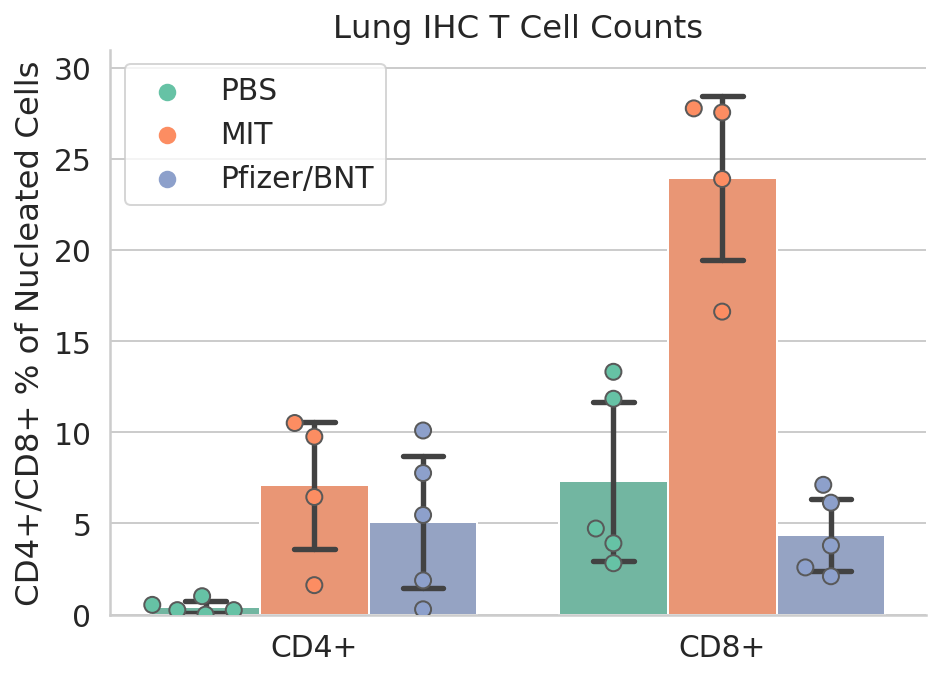

In [170]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.catplot(
    data=lung_ihc_cellcount_data_cd4cd8side,
    x='CD4/CD8',
    y='CD4CD8_Percentage',
    hue='Vaccine',
    hue_order=['PBS', 'MIT', 'Pfizer/BNT'],
    kind='bar',
    ci='sd',
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=lung_ihc_cellcount_data_cd4cd8side,
    x='CD4/CD8',
    y='CD4CD8_Percentage',
    hue='Vaccine',
    hue_order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([0, 31])
ax2.set_xlabel(None)
ax2.set_ylabel('CD4+/CD8+ % of Nucleated Cells')
ax2.set_title('Lung IHC T Cell Counts')
plt.tight_layout()
plt.savefig('figures/lung_IHC_cell_counts_percentage_sidebyside.pdf')
plt.show()

In [162]:
# Run one-way ANOVA of Lung IHC T cell counts (as % of cells) - CD8+

lung_ihc_counts_PBS = lung_ihc_cellcount_data_cd4cd8side.loc[
    (lung_ihc_cellcount_data_cd4cd8side['Vaccine'] == 'PBS') &
    (lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] == 'CD8+')]['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_MIT = lung_ihc_cellcount_data_cd4cd8side.loc[
    (lung_ihc_cellcount_data_cd4cd8side['Vaccine'] == 'MIT') &
    (lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] == 'CD8+')]['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_BNT = lung_ihc_cellcount_data_cd4cd8side.loc[
    (lung_ihc_cellcount_data_cd4cd8side['Vaccine'] == 'Pfizer/BNT') &
    (lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] == 'CD8+')]['CD4CD8_Percentage'].values.tolist()
print('Data, PBS: ', lung_ihc_counts_PBS)
print('Data, MIT: ', lung_ihc_counts_MIT)
print('Data, Pfizer/BNT: ', lung_ihc_counts_BNT)
print()

print(f_oneway(lung_ihc_counts_PBS, lung_ihc_counts_MIT, lung_ihc_counts_BNT))

Data, PBS:  [11.842105263157894, 3.9125431530494823, 2.8183716075156577, 13.321332133213321, 4.7225501770956315]
Data, MIT:  [23.89885807504078, 27.773749093546048, 16.623150565709313, 27.550357374918775]
Data, Pfizer/BNT:  [6.140350877192982, 2.5889967637540456, 2.104300091491308, 3.790613718411552, 7.120743034055728]

F_onewayResult(statistic=27.002281393408275, pvalue=5.707798584841017e-05)


In [163]:
# Run Tukey's test of Lung IHC T cell counts (as % of cells) - CD8+

lung_ihc_cellcount_data_cd4cd8side_cd8only = lung_ihc_cellcount_data_cd4cd8side.loc[
    lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] == 'CD8+']
print(len(lung_ihc_cellcount_data_cd4cd8side_cd8only))

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_cellcount_data_cd4cd8side_cd8only['CD4CD8_Percentage'],
    groups=lung_ihc_cellcount_data_cd4cd8side_cd8only['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

14
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------
   MIT        PBS -16.6381  0.001 -24.2758  -9.0005   True
   MIT Pfizer/BNT -19.6125  0.001 -27.2502 -11.9749   True
   PBS Pfizer/BNT  -2.9744 0.5256 -10.1752   4.2264  False
----------------------------------------------------------


In [164]:
# Run one-way ANOVA of Lung IHC T cell counts (as % of cells) - CD4+

lung_ihc_counts_PBS = lung_ihc_cellcount_data_cd4cd8side.loc[
    (lung_ihc_cellcount_data_cd4cd8side['Vaccine'] == 'PBS') &
    (lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] == 'CD4+')]['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_MIT = lung_ihc_cellcount_data_cd4cd8side.loc[
    (lung_ihc_cellcount_data_cd4cd8side['Vaccine'] == 'MIT') &
    (lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] == 'CD4+')]['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_BNT = lung_ihc_cellcount_data_cd4cd8side.loc[
    (lung_ihc_cellcount_data_cd4cd8side['Vaccine'] == 'Pfizer/BNT') &
    (lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] == 'CD4+')]['CD4CD8_Percentage'].values.tolist()
print('Data, PBS: ', lung_ihc_counts_PBS)
print('Data, MIT: ', lung_ihc_counts_MIT)
print('Data, Pfizer/BNT: ', lung_ihc_counts_BNT)
print()

print(f_oneway(lung_ihc_counts_PBS, lung_ihc_counts_MIT, lung_ihc_counts_BNT))

Data, PBS:  [1.0089686098654709, 0.5336179295624333, 0.24600246002460024, 0.0, 0.2457002457002457]
Data, MIT:  [6.451612903225806, 9.76123595505618, 1.6159695817490494, 10.511756569847856]
Data, Pfizer/BNT:  [10.1010101010101, 5.464006938421509, 1.876675603217158, 0.28957528957528955, 7.766059443911794]

F_onewayResult(statistic=5.170546589728826, pvalue=0.026119696555103832)


In [165]:
# Run Tukey's test of Lung IHC T cell counts (as % of cells) - CD4+

lung_ihc_cellcount_data_cd4cd8side_cd4only = lung_ihc_cellcount_data_cd4cd8side.loc[
    lung_ihc_cellcount_data_cd4cd8side['CD4/CD8'] == 'CD4+']
print(len(lung_ihc_cellcount_data_cd4cd8side_cd4only))

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_cellcount_data_cd4cd8side_cd4only['CD4CD8_Percentage'],
    groups=lung_ihc_cellcount_data_cd4cd8side_cd4only['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

14
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   MIT        PBS  -6.6783 0.0264 -12.5482 -0.8083   True
   MIT Pfizer/BNT  -1.9857 0.6384  -7.8556  3.8843  False
   PBS Pfizer/BNT   4.6926 0.0994  -0.8416 10.2268  False
---------------------------------------------------------


# Lung IHC Cell Counting (CD8+/CD4+ Side by Side Images) - with 2 DPI

Above results are from 7 DPI.  Combine with 2 DPI results and create a plot with all data.

In [197]:
# Load data from CellProfiler output (this is the Image.csv file).
# This is data from 2 DPI
lung_ihc_cellcount_data_cd4cd8side_2dpi_all = pd.read_csv('data/lung_IHC_cellprofiler/Image_CD4CD8_2dpi_092722.csv')

lung_ihc_cellcount_data_cd4cd8side_2dpi = lung_ihc_cellcount_data_cd4cd8side_2dpi_all[['Count_CD4CD8Cells', 'Count_Nuclei']]
lung_ihc_cellcount_data_cd4cd8side_2dpi = lung_ihc_cellcount_data_cd4cd8side_2dpi.astype(int)

# Compute fraction of total cells that are CD4/CD8.
lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4CD8_Percentage'] = (
    lung_ihc_cellcount_data_cd4cd8side_2dpi['Count_CD4CD8Cells'] / lung_ihc_cellcount_data_cd4cd8side_2dpi['Count_Nuclei']) * 100.

lung_ihc_cellcount_data_cd4cd8side_2dpi['DPI'] = 2

lung_ihc_cellcount_data_cd4cd8side_2dpi['FileName'] = lung_ihc_cellcount_data_cd4cd8side_2dpi_all['FileName_Lung'].apply(lambda x: x.replace('.tif', ''))
lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'] = lung_ihc_cellcount_data_cd4cd8side_2dpi_all['PathName_Lung'].apply(lambda x: x.split('\\')[-1][:3])
lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'] = lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'].replace('BNT', 'Pfizer/BNT')
lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] = lung_ihc_cellcount_data_cd4cd8side_2dpi['FileName'].apply(lambda x: 'CD4+' if 'CD4' in x else 'CD8+')

lung_ihc_cellcount_data_cd4cd8side_2dpi.set_index(['Vaccine', 'CD4/CD8', 'FileName']).round(decimals=3)

Count_CD4CD8Cells  Count_Nuclei  \
Vaccine    CD4/CD8 FileName                                       
Pfizer/BNT CD4+    CD4 lung1                   72          1386   
                   CD4 lung2-1                 90          1009   
                   CD4 lung2-2                 82          1178   
                   CD4 lung3-1                 71          1043   
                   CD4 lung3-2                 85          1165   
           CD8+    CD8 lung1                  152          1032   
                   CD8 lung2-1                138           989   
                   CD8 lung2-2                123          1072   
                   CD8 lung3-1                 84           955   
                   CD8 lung3-2                139          1064   
MIT        CD4+    CD4 lung1-1                 26          1194   
                   CD4 lung1-2                 56          1248   
                   CD4 lung1-3                 51          1121   
                   CD4 lung2                   61          1309   
                   CD4 lung3                   56          1455   
           CD8+    CD8 lung1-1                 75          1170   
                   CD8 lung1-2                 89          1220   
                   CD8 lung1-3                188          1156   
                   CD8 lung2                  158          1268   
                   CD8 lung3                  267          1313   
PBS        CD4+    CD4 lung1                   63           952   
                   CD4 lung2-1                 69          1229   
                   CD4 lung2-2                 37          1034   
                   CD4 lung3-1                 23          1241   
                   CD4 lung3-2                 48          1205   
           CD8+    CD8 lung1                   25          1165   
                   CD8 lung2-1                 85          1166   
                   CD8 lung2-2                 62          1126   
                   CD8 lung3-1                 42          1259   
                   CD8 lung3-2                 50          1208   

                                CD4CD8_Percentage  DPI  
Vaccine    CD4/CD8 FileName                             
Pfizer/BNT CD4+    CD4 lung1                5.195    2  
                   CD4 lung2-1              8.920    2  
                   CD4 lung2-2              6.961    2  
                   CD4 lung3-1              6.807    2  
                   CD4 lung3-2              7.296    2  
           CD8+    CD8 lung1               14.729    2  
                   CD8 lung2-1             13.953    2  
                   CD8 lung2-2             11.474    2  
                   CD8 lung3-1              8.796    2  
                   CD8 lung3-2             13.064    2  
MIT        CD4+    CD4 lung1-1              2.178    2  
                   CD4 lung1-2              4.487    2  
                   CD4 lung1-3              4.550    2  
                   CD4 lung2                4.660    2  
                   CD4 lung3                3.849    2  
           CD8+    CD8 lung1-1              6.410    2  
                   CD8 lung1-2              7.295    2  
                   CD8 lung1-3             16.263    2  
                   CD8 lung2               12.461    2  
                   CD8 lung3               20.335    2  
PBS        CD4+    CD4 lung1                6.618    2  
                   CD4 lung2-1              5.614    2  
                   CD4 lung2-2              3.578    2  
                   CD4 lung3-1              1.853    2  
                   CD4 lung3-2              3.983    2  
           CD8+    CD8 lung1                2.146    2  
                   CD8 lung2-1              7.290    2  
                   CD8 lung2-2              5.506    2  
                   CD8 lung3-1              3.336    2  
                   CD8 lung3-2              4.139    2

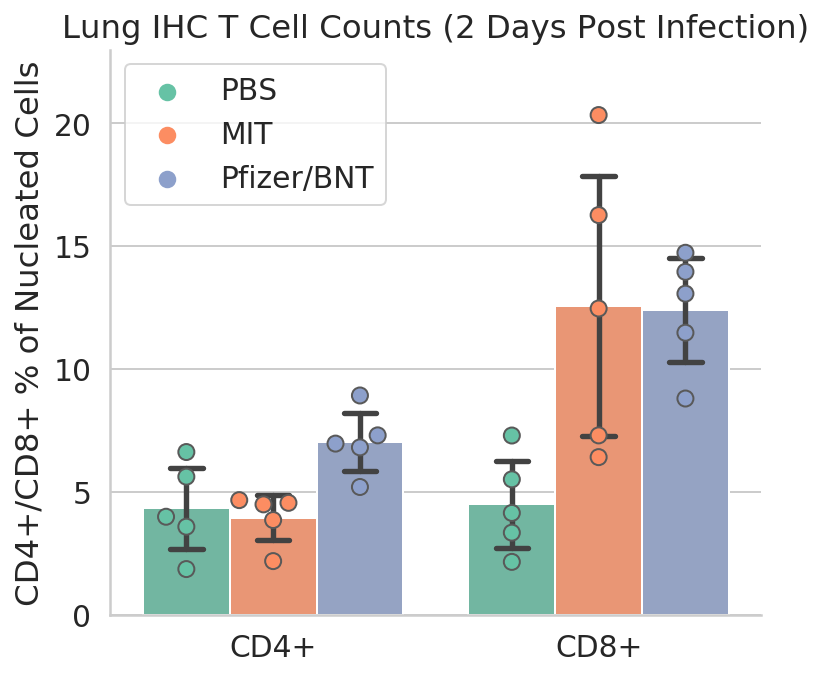

In [215]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.catplot(
    data=lung_ihc_cellcount_data_cd4cd8side_2dpi,
    x='CD4/CD8',
    y='CD4CD8_Percentage',
    hue='Vaccine',
    hue_order=['PBS', 'MIT', 'Pfizer/BNT'],
    kind='bar',
    ci='sd',
    capsize=0.1,
    #errwidth=1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=lung_ihc_cellcount_data_cd4cd8side_2dpi,
    x='CD4/CD8',
    y='CD4CD8_Percentage',
    hue='Vaccine',
    hue_order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([0, 23])
ax2.set_xlabel(None)
ax2.set_ylabel('CD4+/CD8+ % of Nucleated Cells')
ax2.set_title('Lung IHC T Cell Counts (2 Days Post Infection)')
plt.tight_layout()
#plt.savefig('figures/lung_IHC_cell_counts_percentage_sidebyside_2dpi.pdf')
plt.show()

In [221]:
# Run one-way ANOVA of Lung IHC T cell counts (as % of cells) - CD8+ 2 DPI

lung_ihc_counts_PBS = lung_ihc_cellcount_data_cd4cd8side_2dpi.loc[
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'] == 'PBS') &
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] == 'CD8+')]['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_MIT = lung_ihc_cellcount_data_cd4cd8side_2dpi.loc[
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'] == 'MIT') &
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] == 'CD8+')]['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_BNT = lung_ihc_cellcount_data_cd4cd8side_2dpi.loc[
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'] == 'Pfizer/BNT') &
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] == 'CD8+')]['CD4CD8_Percentage'].values.tolist()
print('Data, PBS: ', lung_ihc_counts_PBS)
print('Data, MIT: ', lung_ihc_counts_MIT)
print('Data, Pfizer/BNT: ', lung_ihc_counts_BNT)
print()

print(f_oneway(lung_ihc_counts_PBS, lung_ihc_counts_MIT, lung_ihc_counts_BNT))

Data, PBS:  [2.1459227467811157, 7.289879931389365, 5.506216696269982, 3.3359809372517866, 4.13907284768212]
Data, MIT:  [6.41025641025641, 7.295081967213115, 16.26297577854671, 12.46056782334385, 20.335110434120335]
Data, Pfizer/BNT:  [14.728682170542637, 13.953488372093023, 11.473880597014926, 8.795811518324607, 13.063909774436091]

F_onewayResult(statistic=7.196920329654738, pvalue=0.008832261790917489)


In [222]:
# Run Tukey's test of Lung IHC T cell counts (as % of cells) - CD8+ 2 DPI

lung_ihc_cellcount_data_cd4cd8side_cd8only = lung_ihc_cellcount_data_cd4cd8side_2dpi.loc[
    lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] == 'CD8+']
print(len(lung_ihc_cellcount_data_cd4cd8side_cd8only))

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_cellcount_data_cd4cd8side_cd8only['CD4CD8_Percentage'],
    groups=lung_ihc_cellcount_data_cd4cd8side_cd8only['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

15
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   MIT        PBS  -8.0694 0.0157 -14.5585 -1.5803   True
   MIT Pfizer/BNT  -0.1496    0.9  -6.6387  6.3394  False
   PBS Pfizer/BNT   7.9197 0.0175   1.4307 14.4088   True
---------------------------------------------------------


In [223]:
# Run one-way ANOVA of Lung IHC T cell counts (as % of cells) - CD4+ 2 DPI

lung_ihc_counts_PBS = lung_ihc_cellcount_data_cd4cd8side_2dpi.loc[
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'] == 'PBS') &
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] == 'CD4+')]['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_MIT = lung_ihc_cellcount_data_cd4cd8side_2dpi.loc[
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'] == 'MIT') &
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] == 'CD4+')]['CD4CD8_Percentage'].values.tolist()
lung_ihc_counts_BNT = lung_ihc_cellcount_data_cd4cd8side_2dpi.loc[
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['Vaccine'] == 'Pfizer/BNT') &
    (lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] == 'CD4+')]['CD4CD8_Percentage'].values.tolist()
print('Data, PBS: ', lung_ihc_counts_PBS)
print('Data, MIT: ', lung_ihc_counts_MIT)
print('Data, Pfizer/BNT: ', lung_ihc_counts_BNT)
print()

print(f_oneway(lung_ihc_counts_PBS, lung_ihc_counts_MIT, lung_ihc_counts_BNT))

Data, PBS:  [6.61764705882353, 5.614320585842148, 3.5783365570599615, 1.8533440773569703, 3.9834024896265556]
Data, MIT:  [2.1775544388609713, 4.487179487179487, 4.549509366636931, 4.660045836516425, 3.8487972508591066]
Data, Pfizer/BNT:  [5.194805194805195, 8.919722497522299, 6.960950764006792, 6.807286673058485, 7.296137339055794]

F_onewayResult(statistic=6.792214338666801, pvalue=0.010647144220835845)


In [224]:
# Run Tukey's test of Lung IHC T cell counts (as % of cells) - CD4+ 2 DPI

lung_ihc_cellcount_data_cd4cd8side_cd4only = lung_ihc_cellcount_data_cd4cd8side_2dpi.loc[
    lung_ihc_cellcount_data_cd4cd8side_2dpi['CD4/CD8'] == 'CD4+']
print(len(lung_ihc_cellcount_data_cd4cd8side_cd4only))

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_cellcount_data_cd4cd8side_cd4only['CD4CD8_Percentage'],
    groups=lung_ihc_cellcount_data_cd4cd8side_cd4only['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

15
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   MIT        PBS   0.3848    0.9 -2.0528 2.8224  False
   MIT Pfizer/BNT   3.0912 0.0139  0.6536 5.5288   True
   PBS Pfizer/BNT   2.7064 0.0296  0.2688  5.144   True
-------------------------------------------------------


In [270]:
# Combine with 7 DPI data into a single DataFrame.
lung_ihc_cellcount_data_cd4cd8side_2and7dpi = pd.concat(
    [lung_ihc_cellcount_data_cd4cd8side, lung_ihc_cellcount_data_cd4cd8side_2dpi]).reset_index(drop=True)
lung_ihc_cellcount_data_cd4cd8side_2and7dpi = lung_ihc_cellcount_data_cd4cd8side_2and7dpi.sort_values(by=['CD4/CD8', 'Vaccine', 'DPI'])

# Add column that identifies vaccine + DPI (for statistical tests)
lung_ihc_cellcount_data_cd4cd8side_2and7dpi['Vaccine+DPI'] = lung_ihc_cellcount_data_cd4cd8side_2and7dpi.apply(lambda row: '%s %s DPI' % (row['Vaccine'], row['DPI']), axis=1)

lung_ihc_cellcount_data_cd4cd8side_2and7dpi.set_index(['CD4/CD8', 'Vaccine', 'DPI', 'FileName']).round(decimals=3)

Count_CD4CD8Cells  Count_Nuclei  \
CD4/CD8 Vaccine    DPI FileName                                            
CD4+    MIT        2   CD4 lung1-1                      26          1194   
                       CD4 lung1-2                      56          1248   
                       CD4 lung1-3                      51          1121   
                       CD4 lung2                        61          1309   
                       CD4 lung3                        56          1455   
                   7   MIT CD4 lung 1-2                 78          1209   
                       MIT CD4 lung 1                  139          1424   
                       MIT CD4 lung 2-2                 17          1052   
                       MIT CD4 lung 2                  152          1446   
        PBS        2   CD4 lung1                        63           952   
                       CD4 lung2-1                      69          1229   
                       CD4 lung2-2                      37          1034   
                       CD4 lung3-1                      23          1241   
                       CD4 lung3-2                      48          1205   
                   7   PBS CD4 lung 1                    9           892   
                       PBS CD4 lung 2-2                  5           937   
                       PBS CD4 lung 2                    2           813   
                       PBS CD4 lung 4                    0           981   
                       PBS CD4 lung 5                    2           814   
        Pfizer/BNT 2   CD4 lung1                        72          1386   
                       CD4 lung2-1                      90          1009   
                       CD4 lung2-2                      82          1178   
                       CD4 lung3-1                      71          1043   
                       CD4 lung3-2                      85          1165   
                   7   BNT CD4 lung 1-2                110          1089   
                       BNT CD4 lung 1-3                 63          1153   
                       BNT CD4 lung 1                   21          1119   
                       BNT CD4 lung 2                    3          1036   
                       BNT CD4 lung 3                   81          1043   
CD8+    MIT        2   CD8 lung1-1                      75          1170   
                       CD8 lung1-2                      89          1220   
                       CD8 lung1-3                     188          1156   
                       CD8 lung2                       158          1268   
                       CD8 lung3                       267          1313   
                   7   MIT CD8 lung 1-2                293          1226   
                       MIT CD8 lung 1                  383          1379   
                       MIT CD8 lung 2-2                191          1149   
                       MIT CD8 lung 2                  424          1539   
        PBS        2   CD8 lung1                        25          1165   
                       CD8 lung2-1                      85          1166   
                       CD8 lung2-2                      62          1126   
                       CD8 lung3-1                      42          1259   
                       CD8 lung3-2                      50          1208   
                   7   PBS CD8 lung 1                  108           912   
                       PBS CD8 lung 2-2                 34           869   
                       PBS CD8 lung 2                   27           958   
                       PBS CD8 lung 4                  148          1111   
                       PBS CD8 lung 5                   40           847   
        Pfizer/BNT 2   CD8 lung1                       152          1032   
                       CD8 lung2-1                     138           989   
                       CD8 lung2-2                     123          1072   
             

In [272]:
# Compute mean/standard deviation of each group.
lung_ihc_cellcount_data_cd4cd8side_2and7dpi.groupby(['CD4/CD8', 'DPI', 'Vaccine']).agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']).round(decimals=3)

Count_CD4CD8Cells                                    \
                                   count    mean median      std  min  max   
CD4/CD8 DPI Vaccine                                                          
CD4+    2   MIT                        5   50.00   56.0   13.874   26   61   
            PBS                        5   48.00   48.0   18.788   23   69   
            Pfizer/BNT                 5   80.00   82.0    8.276   71   90   
        7   MIT                        4   96.50  108.5   62.046   17  152   
            PBS                        5    3.60    2.0    3.507    0    9   
            Pfizer/BNT                 5   55.60   63.0   43.655    3  110   
CD8+    2   MIT                        5  155.40  158.0   78.098   75  267   
            PBS                        5   52.80   50.0   22.466   25   85   
            Pfizer/BNT                 5  127.20  138.0   26.243   84  152   
        7   MIT                        4  322.75  338.0  103.481  191  424   
            PBS                        5   71.40   40.0   53.766   27  148   
            Pfizer/BNT                 5   45.80   42.0   19.741   23   69   

                       Count_Nuclei                                        \
                              count     mean  median      std   min   max   
CD4/CD8 DPI Vaccine                                                         
CD4+    2   MIT                   5  1265.40  1248.0  126.591  1121  1455   
            PBS                   5  1132.20  1205.0  130.980   952  1241   
            Pfizer/BNT            5  1156.20  1165.0  148.191  1009  1386   
        7   MIT                   4  1282.75  1316.5  187.338  1052  1446   
            PBS                   5   887.40   892.0   74.440   813   981   
            Pfizer/BNT            5  1088.00  1089.0   49.790  1036  1153   
CD8+    2   MIT                   5  1225.40  1220.0   65.961  1156  1313   
            PBS                   5  1184.80  1166.0   50.613  1126  1259   
            Pfizer/BNT            5  1022.40  1032.0   49.853   955  1072   
        7   MIT                   4  1323.25  1302.5  172.701  1149  1539   
            PBS                   5   939.40   912.0  104.925   847  1111   
            Pfizer/BNT            5  1086.40  1093.0  100.401   969  1236   

                       CD4CD8_Percentage                                 \
                                   count    mean  median    std     min   
CD4/CD8 DPI Vaccine                                                       
CD4+    2   MIT                        5   3.945   4.487  1.037   2.178   
            PBS                        5   4.329   3.983  1.851   1.853   
            Pfizer/BNT                 5   7.036   6.961  1.329   5.195   
        7   MIT                        4   7.085   8.106  4.050   1.616   
            PBS                        5   0.407   0.246  0.386   0.000   
            Pfizer/BNT                 5   5.099   5.464  4.055   0.290   
CD8+    2   MIT                        5  12.553  12.461  5.910   6.410   
            PBS                        5   4.483   4.139  1.989   2.146   
            Pfizer/BNT                 5  12.403  13.064  2.352   8.796   
        7   MIT                        4  23.962  25.725  5.205  16.623   
            PBS                        5   7.323   4.723  4.876   2.818   
            Pfizer/BNT                 5   4.349   3.791  2.199   2.104   

                                
                           max  
CD4/CD8 DPI Vaccine             
CD4+    2   MIT          4.660  
            PBS          6.618  
            Pfizer/BNT   8.920  
        7   MIT         10.512  
            PBS          1.009  
            Pfizer/BNT  10.101  
CD8+    2   MIT         20.335  
            PBS          7.290  
            Pfizer/BNT  14.729  
        7   MIT         27.774  
            PBS         13.321  
            Pfizer/BNT   7.121

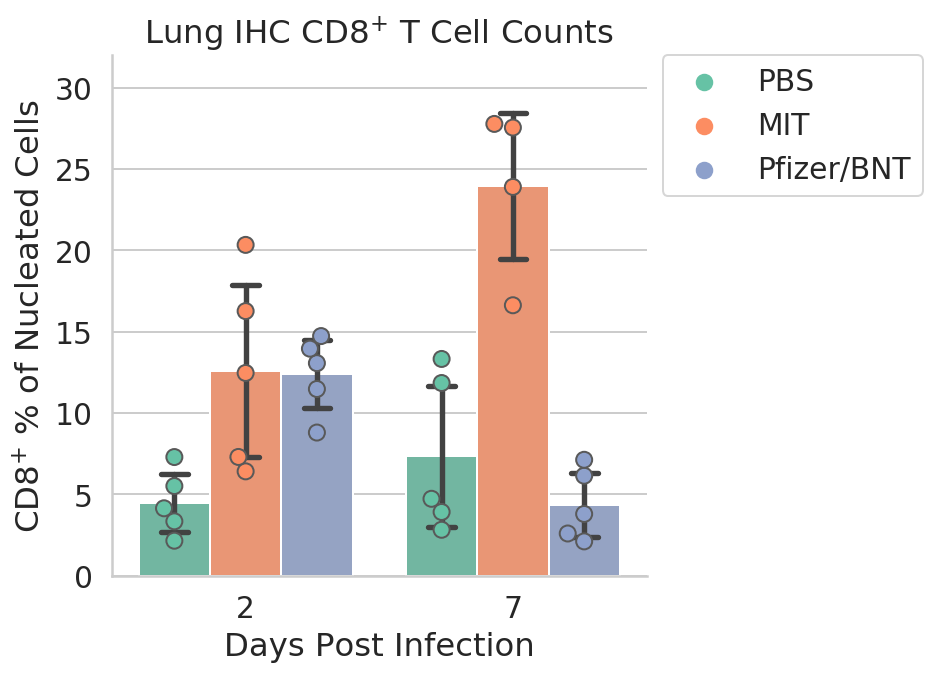

In [343]:
# Plot CD8+ percentage of nucleated cells 2 vs. 7 DPI for all test articles (CD8+ only).
lung_ihc_cellcount_data_2and7dpi_cd8only = lung_ihc_cellcount_data_cd4cd8side_2and7dpi.loc[lung_ihc_cellcount_data_cd4cd8side_2and7dpi['CD4/CD8'] == 'CD8+']

sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.catplot(
    data=lung_ihc_cellcount_data_2and7dpi_cd8only,
    x='DPI',
    y='CD4CD8_Percentage',
    hue='Vaccine',
    hue_order=['PBS', 'MIT', 'Pfizer/BNT'],
    kind='bar',
    ci='sd',
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=lung_ihc_cellcount_data_2and7dpi_cd8only,
    x='DPI',
    y='CD4CD8_Percentage',
    hue='Vaccine',
    hue_order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3], bbox_to_anchor=(1.03, 1.0), borderaxespad=0)  # Move to right so statistics can be added over bars.
ax2.set_ylim([0, 32])
ax2.set_xlabel('Days Post Infection')
ax2.set_ylabel('CD8$^{+}$ % of Nucleated Cells')
ax2.set_title('Lung IHC CD8$^{+}$ T Cell Counts')
plt.tight_layout()
plt.savefig('figures/lung_IHC_cell_counts_percentage_sidebyside_2vs7dpi_CD8.pdf')
plt.show()

In [304]:
# Perform two-way ANOVA (based on https://www.statology.org/two-way-anova-python/)
model = ols('CD4CD8_Percentage ~ C(DPI) + C(Vaccine) + C(DPI):C(Vaccine)', data=lung_ihc_cellcount_data_2and7dpi_cd8only).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(DPI),21.006693,1.0,1.294089,0.267008
C(Vaccine),723.295003,2.0,22.278815,0.000004
C(DPI):C(Vaccine),450.572801,2.0,13.878470,0.000111
Residual,373.354358,23.0,NaN,NaN


In [298]:
# Run one-way ANOVA of Lung IHC T cell counts (as % of cells) - 2 vs. 7 DPI (CD8+ only)

inp_lists = []
for dpi in [2, 7]:
    for vaccine in ['PBS', 'MIT', 'Pfizer/BNT']:
        data = lung_ihc_cellcount_data_2and7dpi_cd8only.loc[
            (lung_ihc_cellcount_data_2and7dpi_cd8only['DPI'] == dpi) &
            (lung_ihc_cellcount_data_2and7dpi_cd8only['Vaccine'] == vaccine)]['CD4CD8_Percentage'].values.tolist()
        print('Data, %s %d DPI: %s' % (vaccine, dpi, data))
        inp_lists.append(data)
print()

print(f_oneway(*inp_lists))

Data, PBS 2 DPI: [2.1459227467811157, 7.289879931389365, 5.506216696269982, 3.3359809372517866, 4.13907284768212]
Data, MIT 2 DPI: [6.41025641025641, 7.295081967213115, 16.26297577854671, 12.46056782334385, 20.335110434120335]
Data, Pfizer/BNT 2 DPI: [14.728682170542637, 13.953488372093023, 11.473880597014926, 8.795811518324607, 13.063909774436091]
Data, PBS 7 DPI: [11.842105263157894, 3.9125431530494823, 2.8183716075156577, 13.321332133213321, 4.7225501770956315]
Data, MIT 7 DPI: [23.89885807504078, 27.773749093546048, 16.623150565709313, 27.550357374918775]
Data, Pfizer/BNT 7 DPI: [6.140350877192982, 2.5889967637540456, 2.104300091491308, 3.790613718411552, 7.120743034055728]

F_onewayResult(statistic=14.59176134434126, pvalue=1.730266683064849e-06)


In [299]:
# Run Tukey's test of Lung IHC T cell counts (as % of cells) - 2 vs. 7 DPI (CD8+ only)

print(len(lung_ihc_cellcount_data_2and7dpi_cd8only))

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_cellcount_data_2and7dpi_cd8only['CD4CD8_Percentage'],
    groups=lung_ihc_cellcount_data_2and7dpi_cd8only['Vaccine+DPI'],
    alpha=0.05,
)
print(tukey_result)

29
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1           group2      meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------
       MIT 2 DPI        MIT 7 DPI  11.4087 0.0039   3.0218  19.7957   True
       MIT 2 DPI        PBS 2 DPI  -8.0694 0.0436 -15.9767  -0.1621   True
       MIT 2 DPI        PBS 7 DPI  -5.2294 0.3458 -13.1367   2.6779  False
       MIT 2 DPI Pfizer/BNT 2 DPI  -0.1496    0.9  -8.0569   7.7577  False
       MIT 2 DPI Pfizer/BNT 7 DPI  -8.2038 0.0389 -16.1111  -0.2965   True
       MIT 7 DPI        PBS 2 DPI -19.4781  0.001 -27.8651 -11.0912   True
       MIT 7 DPI        PBS 7 DPI -16.6381  0.001 -25.0251  -8.2512   True
       MIT 7 DPI Pfizer/BNT 2 DPI -11.5584 0.0034 -19.9453  -3.1714   True
       MIT 7 DPI Pfizer/BNT 7 DPI -19.6125  0.001 -27.9995 -11.2256   True
       PBS 2 DPI        PBS 7 DPI     2.84 0.8577  -5.0673  10.7473  False
       PBS 2 DPI Pfize

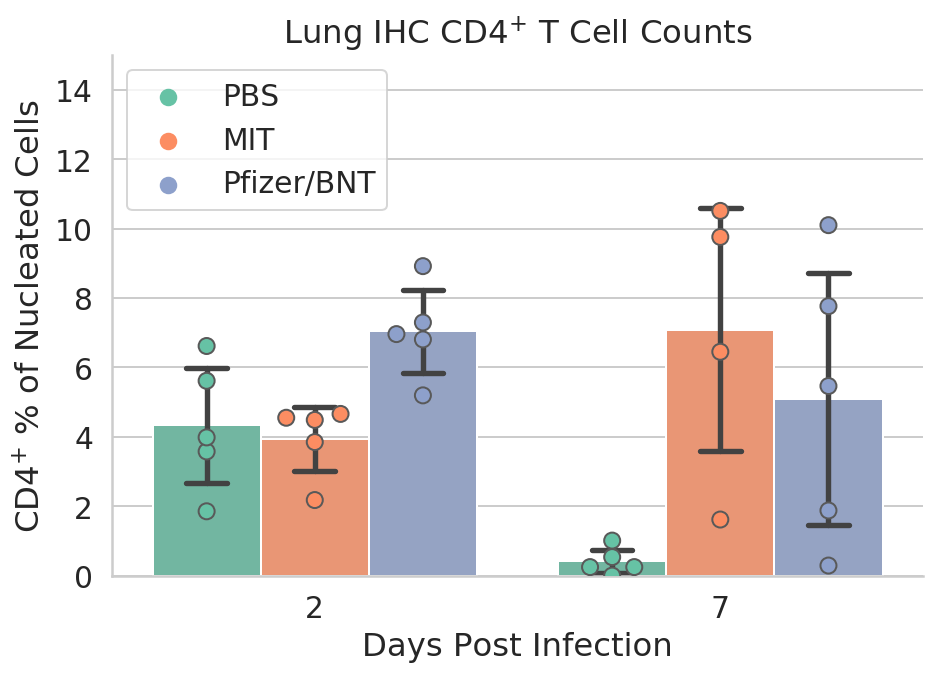

In [300]:
# Plot CD8+ percentage of nucleated cells 2 vs. 7 DPI for all test articles (CD4+ only).
lung_ihc_cellcount_data_2and7dpi_cd4only = lung_ihc_cellcount_data_cd4cd8side_2and7dpi.loc[lung_ihc_cellcount_data_cd4cd8side_2and7dpi['CD4/CD8'] == 'CD4+']

sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.catplot(
    data=lung_ihc_cellcount_data_2and7dpi_cd4only,
    x='DPI',
    y='CD4CD8_Percentage',
    hue='Vaccine',
    hue_order=['PBS', 'MIT', 'Pfizer/BNT'],
    kind='bar',
    ci='sd',
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=lung_ihc_cellcount_data_2and7dpi_cd4only,
    x='DPI',
    y='CD4CD8_Percentage',
    hue='Vaccine',
    hue_order=['PBS', 'MIT', 'Pfizer/BNT'],
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([0, 15])
ax2.set_xlabel('Days Post Infection')
ax2.set_ylabel('CD4$^{+}$ % of Nucleated Cells')
ax2.set_title('Lung IHC CD4$^{+}$ T Cell Counts')
plt.tight_layout()
plt.savefig('figures/lung_IHC_cell_counts_percentage_sidebyside_2vs7dpi_CD4.pdf')
plt.show()

In [303]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA (based on https://www.statology.org/two-way-anova-python/)
model = ols('CD4CD8_Percentage ~ C(DPI) + C(Vaccine) + C(DPI):C(Vaccine)', data=lung_ihc_cellcount_data_2and7dpi_cd4only).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(DPI),8.141761,1.0,1.331276,0.260428
C(Vaccine),75.433275,2.0,6.167125,0.007172
C(DPI):C(Vaccine),61.615140,2.0,5.037409,0.015334
Residual,140.662418,23.0,NaN,NaN


In [301]:
# Run one-way ANOVA of Lung IHC T cell counts (as % of cells) - 2 vs. 7 DPI (CD4+ only)

inp_lists = []
for dpi in [2, 7]:
    for vaccine in ['PBS', 'MIT', 'Pfizer/BNT']:
        data = lung_ihc_cellcount_data_2and7dpi_cd4only.loc[
            (lung_ihc_cellcount_data_2and7dpi_cd4only['DPI'] == dpi) &
            (lung_ihc_cellcount_data_2and7dpi_cd4only['Vaccine'] == vaccine)]['CD4CD8_Percentage'].values.tolist()
        print('Data, %s %d DPI: %s' % (vaccine, dpi, data))
        inp_lists.append(data)
print()

print(f_oneway(*inp_lists))

Data, PBS 2 DPI: [6.61764705882353, 5.614320585842148, 3.5783365570599615, 1.8533440773569703, 3.9834024896265556]
Data, MIT 2 DPI: [2.1775544388609713, 4.487179487179487, 4.549509366636931, 4.660045836516425, 3.8487972508591066]
Data, Pfizer/BNT 2 DPI: [5.194805194805195, 8.919722497522299, 6.960950764006792, 6.807286673058485, 7.296137339055794]
Data, PBS 7 DPI: [1.0089686098654709, 0.5336179295624333, 0.24600246002460024, 0.0, 0.2457002457002457]
Data, MIT 7 DPI: [6.451612903225806, 9.76123595505618, 1.6159695817490494, 10.511756569847856]
Data, Pfizer/BNT 7 DPI: [10.1010101010101, 5.464006938421509, 1.876675603217158, 0.28957528957528955, 7.766059443911794]

F_onewayResult(statistic=4.774849977486976, pvalue=0.0038734998005667655)


In [302]:
# Run Tukey's test of Lung IHC T cell counts (as % of cells) - 2 vs. 7 DPI (CD4+ only)

print(len(lung_ihc_cellcount_data_2and7dpi_cd4only))

tukey_result = pairwise_tukeyhsd(
    endog=lung_ihc_cellcount_data_2and7dpi_cd4only['CD4CD8_Percentage'],
    groups=lung_ihc_cellcount_data_2and7dpi_cd4only['Vaccine+DPI'],
    alpha=0.05,
)
print(tukey_result)

29
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
       MIT 2 DPI        MIT 7 DPI   3.1405 0.4328  -2.0074  8.2885  False
       MIT 2 DPI        PBS 2 DPI   0.3848    0.9  -4.4687  5.2383  False
       MIT 2 DPI        PBS 7 DPI  -3.5378 0.2494  -8.3913  1.3158  False
       MIT 2 DPI Pfizer/BNT 2 DPI   3.0912 0.3863  -1.7624  7.9447  False
       MIT 2 DPI Pfizer/BNT 7 DPI   1.1548    0.9  -3.6987  6.0084  False
       MIT 7 DPI        PBS 2 DPI  -2.7557 0.5612  -7.9037  2.3922  False
       MIT 7 DPI        PBS 7 DPI  -6.6783 0.0062 -11.8262 -1.5304   True
       MIT 7 DPI Pfizer/BNT 2 DPI  -0.0494    0.9  -5.1973  5.0986  False
       MIT 7 DPI Pfizer/BNT 7 DPI  -1.9857  0.813  -7.1336  3.1623  False
       PBS 2 DPI        PBS 7 DPI  -3.9226 0.1631  -8.7761   0.931  False
       PBS 2 DPI Pfizer/BNT 2 DPI  

# Immunogenicity CD3+ --> CD4+/CD8+ Cell Populations

In [112]:
raw_cd3_cell_populations_data = pd.read_csv('data/CD3_CD4_CD8_Cell_Populations.csv')
raw_cd3_cell_populations_data.rename(columns={
    '% of CD3+ CD8+': 'CD8+',
    '% of CD3+ CD4+': 'CD4+',
}, inplace=True)
raw_cd3_cell_populations_data['Sum'] = raw_cd3_cell_populations_data['CD4+'] + raw_cd3_cell_populations_data['CD8+']
raw_cd3_cell_populations_data

,ID,Vaccine,CD4+,CD8+,Sum
0,PBS-1,PBS,56.6,39.9,96.5
1,PBS-2,PBS,57.5,38.8,96.3
2,PBS-3,PBS,55.5,41.7,97.2
3,MIT-1,MIT,50.9,43.9,94.8
4,MIT-2,MIT,41.1,54.9,96.0
5,MIT-3,MIT,53.6,44.2,97.8
6,BNT-1,Pfizer/BNT,52.0,41.1,93.1
7,BNT-2,Pfizer/BNT,48.9,44.1,93.0
8,BNT-3,Pfizer/BNT,48.1,44.1,92.2


In [113]:
# Compute mean/standard deviation of each group.
raw_cd3_cell_populations_data.groupby(['Vaccine']).agg(['count', 'mean', 'median', 'std']).round(decimals=3)

CD4+                        CD8+                         Sum  \
           count    mean median    std count    mean median    std count   
Vaccine                                                                    
MIT            3  48.533   50.9  6.577     3  47.667   44.2  6.266     3   
PBS            3  56.533   56.6  1.002     3  40.133   39.9  1.464     3   
Pfizer/BNT     3  49.667   48.9  2.060     3  43.100   44.1  1.732     3   

                                  
              mean median    std  
Vaccine                           
MIT         96.200   96.0  1.510  
PBS         96.667   96.5  0.473  
Pfizer/BNT  92.767   93.0  0.493

In [121]:
# Unpivot CD4+ and CD8+ columns as rows to plot as grouped bars.
raw_cd3_cell_populations_data_unpivot = pd.melt(
    raw_cd3_cell_populations_data,
    id_vars=['ID', 'Vaccine'],
    value_vars=['CD4+', 'CD8+'],
).rename(columns={'variable': 'Population', 'value': '% of CD3+ Lymphocytes'})
raw_cd3_cell_populations_data_unpivot

,ID,Vaccine,Population,% of CD3+ Lymphocytes
0,PBS-1,PBS,CD4+,56.6
1,PBS-2,PBS,CD4+,57.5
2,PBS-3,PBS,CD4+,55.5
3,MIT-1,MIT,CD4+,50.9
4,MIT-2,MIT,CD4+,41.1
5,MIT-3,MIT,CD4+,53.6
6,BNT-1,Pfizer/BNT,CD4+,52.0
7,BNT-2,Pfizer/BNT,CD4+,48.9
8,BNT-3,Pfizer/BNT,CD4+,48.1
9,PBS-1,PBS,CD8+,39.9


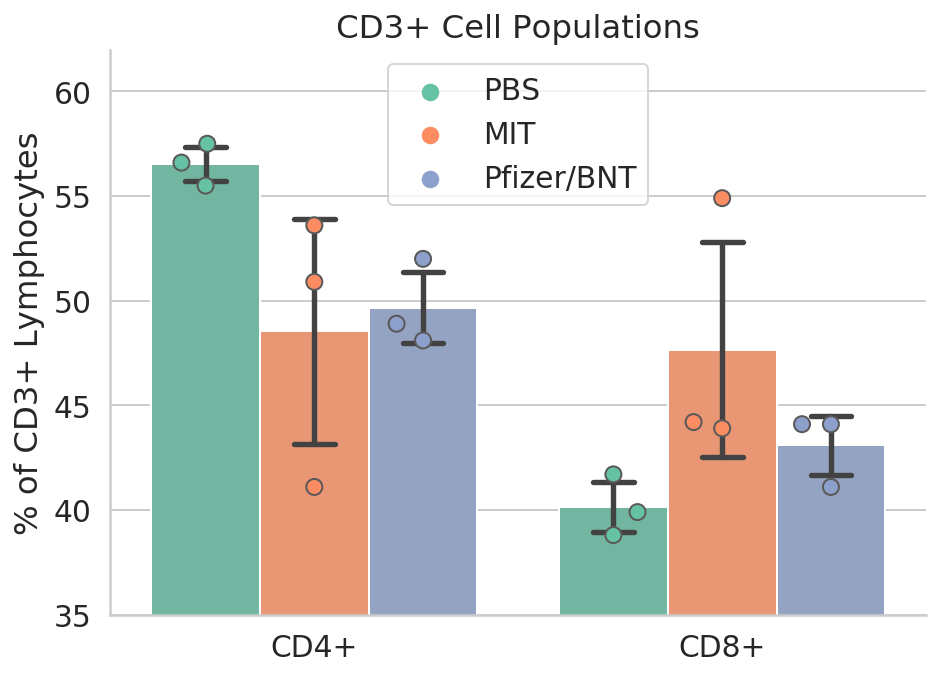

In [150]:
sns.set(font_scale=1.35, style='whitegrid')
ax1 = sns.catplot(
    data=raw_cd3_cell_populations_data_unpivot,
    x='Population',
    y='% of CD3+ Lymphocytes',
    hue='Vaccine',
    kind='bar',
    ci='sd',
    capsize=0.1,
    palette=sns.color_palette('Set2'),
)
ax1._legend.remove()
ax2 = sns.swarmplot(
    data=raw_cd3_cell_populations_data_unpivot,
    x='Population',
    y='% of CD3+ Lymphocytes',
    hue='Vaccine',
    dodge=True,
    size=8,
    linewidth=1,
    palette=sns.color_palette('Set2'),
)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:3], labels[:3])
ax2.set_ylim([35, 62])
ax2.set_xlabel(None)
ax2.set_ylabel('% of CD3+ Lymphocytes')
ax2.set_title('CD3+ Cell Populations')
plt.tight_layout()
#plt.savefig('figures/CD3_CD4_CD8_cell_populations.pdf')
plt.show()

In [123]:
# Run one-way ANOVA of CD4+ cell population percentages.

cd3_cell_populations_cd4_PBS = raw_cd3_cell_populations_data.loc[
    (raw_cd3_cell_populations_data['Vaccine'] == 'PBS')]['CD4+'].values.tolist()
cd3_cell_populations_cd4_MIT = raw_cd3_cell_populations_data.loc[
    (raw_cd3_cell_populations_data['Vaccine'] == 'MIT')]['CD4+'].values.tolist()
cd3_cell_populations_cd4_BNT = raw_cd3_cell_populations_data.loc[
    (raw_cd3_cell_populations_data['Vaccine'] == 'Pfizer/BNT')]['CD4+'].values.tolist()

print('Day 2, PBS: ', cd3_cell_populations_cd4_PBS)
print('Day 2, MIT: ', cd3_cell_populations_cd4_MIT)
print('Day 2, Pfizer/BNT: ', cd3_cell_populations_cd4_BNT)
print()

print(f_oneway(cd3_cell_populations_cd4_PBS, cd3_cell_populations_cd4_MIT, cd3_cell_populations_cd4_BNT))

Day 2, PBS:  [56.6, 57.5, 55.5]
Day 2, MIT:  [50.9, 41.1, 53.6]
Day 2, Pfizer/BNT:  [52.0, 48.9, 48.1]

F_onewayResult(statistic=3.4766714766714766, pvalue=0.09938209760093729)


In [124]:
# Run Tukey's test to identify which groups had a significant difference (CD4+).

print(len(raw_cd3_cell_populations_data))
print()

tukey_result = pairwise_tukeyhsd(
    endog=raw_cd3_cell_populations_data['CD4+'],
    groups=raw_cd3_cell_populations_data['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

9

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   MIT        PBS      8.0 0.1103 -2.0623 18.0623  False
   MIT Pfizer/BNT   1.1333    0.9  -8.929 11.1956  False
   PBS Pfizer/BNT  -6.8667 0.1715 -16.929  3.1956  False
--------------------------------------------------------


In [125]:
# Run one-way ANOVA of CD8+ cell population percentages.

cd3_cell_populations_cd8_PBS = raw_cd3_cell_populations_data.loc[
    (raw_cd3_cell_populations_data['Vaccine'] == 'PBS')]['CD8+'].values.tolist()
cd3_cell_populations_cd8_MIT = raw_cd3_cell_populations_data.loc[
    (raw_cd3_cell_populations_data['Vaccine'] == 'MIT')]['CD8+'].values.tolist()
cd3_cell_populations_cd8_BNT = raw_cd3_cell_populations_data.loc[
    (raw_cd3_cell_populations_data['Vaccine'] == 'Pfizer/BNT')]['CD8+'].values.tolist()

print('Day 2, PBS: ', cd3_cell_populations_cd8_PBS)
print('Day 2, MIT: ', cd3_cell_populations_cd8_MIT)
print('Day 2, Pfizer/BNT: ', cd3_cell_populations_cd8_BNT)
print()

print(f_oneway(cd3_cell_populations_cd8_PBS, cd3_cell_populations_cd8_MIT, cd3_cell_populations_cd8_BNT))

Day 2, PBS:  [39.9, 38.8, 41.7]
Day 2, MIT:  [43.9, 54.9, 44.2]
Day 2, Pfizer/BNT:  [41.1, 44.1, 44.1]

F_onewayResult(statistic=2.9187059000150137, pvalue=0.1302217366371382)


In [128]:
# Run Tukey's test to identify which groups had a significant difference (CD4+).

print(len(raw_cd3_cell_populations_data))
print()

tukey_result = pairwise_tukeyhsd(
    endog=raw_cd3_cell_populations_data['CD8+'],
    groups=raw_cd3_cell_populations_data['Vaccine'],
    alpha=0.05,
)
print(tukey_result)

9

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   MIT        PBS  -7.5333 0.1159 -17.1606  2.094  False
   MIT Pfizer/BNT  -4.5667 0.3754  -14.194 5.0606  False
   PBS Pfizer/BNT   2.9667 0.6306  -6.6606 12.594  False
--------------------------------------------------------
